<div style="text-align: center;"><br><font size=10>Machine Learning - Final Project</font><br>
<font size=6>Malicious or Benign</font>
<br><br>
            <b>Machine Learning – Digital Sciences for High-Tech</b>
                <br><br><i>Group 51</i>
<br><br>    Authors: </b><br>Yuval Bakirov - yuvalbakirov@mail.tau.ac.il <br>
            Eitan Bakirov - eitanbakirov@mail.tau.ac.il
<br></div>


In this project we are given a data set of files that are labeled as benign or malicious and our goal is to train a model which decides, given a new file, whether it is malicious or benign.

### Import libraries

In [2]:
import pandas as pd
import numpy as np

from numpy import interp

import scipy.stats as stats

import sklearn as skl
import seaborn as sns

from matplotlib import pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.ensemble import IsolationForest

from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from IPython.display import display

import time

import warnings
warnings.filterwarnings('ignore')


# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor 

<span style="color:red;">TODO remove comment after fixing the import</span>

### Loading the data

In [3]:
# Data Loading
full_data = pd.read_csv('train.csv')

train_with_labels = full_data.copy()
train_data = full_data.drop('label', axis=1).copy()
train_labels = full_data['label'].copy()

## Part 1 - Exploring The Data


First, let's look at our data size:

In [4]:
train_data.shape

(60000, 23)

By removing duplicate rows, we want to ensure that each row in the DataFrame represents a unique observation.

In [5]:
train_data = train_data.drop_duplicates()

In [6]:
train_data.shape

(60000, 23)

We see that all the data is indeed unique.


Here is the first lines to get a perspective on data visibility:

In [7]:
train_data.head()

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,urls,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C
0,a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd...,6744064,6799360.0,524.0,3.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,28.0,899075.0,13.857079,Win32 EXE PECompact compressed (generic),64.2,-3.978981,5.732354,er
1,ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf01...,22016,45056.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,856.0,9.617978,Win32 Dynamic Link Library (generic),38.4,7.064133,5.738201,er
2,b0b126adc73b980a114e38027b082d149fcf491547452f...,686136,704512.0,133.0,4.0,1.0,1.0,1.0,1.0,0.0,...,32.0,0.0,2.0,32767.0,12.140422,Win64 Executable (generic),82.0,1.052727,5.722733,gow
3,ff6176c53ca9b58040c93870c264843b93b5e290c28e57...,8192,36864.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,678.0,9.549296,Win64 Executable (generic),28.0,2.217531,5.896053,vh
4,59b8bc6ac157a553440978406c8aa8eb8a25c166af1175...,396288,421888.0,133.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,5.0,35881.0,7.587439,Win64 Executable (generic),32.2,9.401164,NaN,vh


Looking at how many malicious and non-malicious files we have in the data:

In [8]:
print(train_data[train_labels == 0].shape[0])
print(train_data[train_labels == 1].shape[0])

30000
30000


Next, let's take a look at the types of features that exist:

In [9]:
train_data.dtypes

sha256                  object
size                     int64
vsize                  float64
imports                float64
exports                float64
has_debug              float64
has_relocations        float64
has_resources          float64
has_signature          float64
has_tls                float64
symbols                float64
numstrings             float64
paths                  float64
urls                   float64
registry               float64
MZ                     float64
printables             float64
avlength               float64
file_type_trid          object
file_type_prob_trid    float64
A                      float64
B                      float64
C                       object
dtype: object

We can see that the data is either a numeric data type or an object type

Based on our knowledge of the features and the data displayed above we can conclude that: <br>
<span style="color: #6699CC;">size</span>, <span style="color: #6699CC;">vsize</span>, <span style="color: #6699CC;">imports</span>, <span style="color: #6699CC;">exports</span>, <span style="color: #6699CC;">symbols</span>, <span style="color: #6699CC;">numstrings</span>, <span style="color: #6699CC;">avlength</span>, <span style="color: #6699CC;">printables</span>, <span style="color: #6699CC;">paths</span>, <span style="color: #6699CC;">urls</span>, <span style="color: #6699CC;">registry</span>, <span style="color: #6699CC;">MZ</span>, <span style="color: #6699CC;">A</span>, and <span style="color: #6699CC;">B</span> - are <b>Numeric</b> data types. <br>
<span style="color: green;">has_debug</span>, <span style="color: green;">has_tls</span>, <span style="color: green;">has_resources</span>, <span style="color: green;">has_relocations</span>, and <span style="color: green;">has_signature</span> - are <b>Boolean (dummy)</b> data types.<br>
<span style="color: orange;">sha256</span>, <span style="color: orange;">file_type_trid</span> and <span style="color: orange;">C</span> - are <b>Categorical</b> data types.

Hence we will update the data types of each feature:


In [10]:
def change_data_types(df):
    numeric_features = [col for col in ['size', 'vsize', 'imports', 'exports', 'symbols', 'numstrings', 'avlength', 'printables', 'paths', 'urls', 'registry', 'MZ', 'A', 'B'] if col in df.columns]
    boolean_features = [col for col in ['has_debug', 'has_tls', 'has_resources', 'has_relocations', 'has_signature'] if col in df.columns]
    categorical_features = [col for col in ['sha256', 'file_type_trid', 'C'] if col in df.columns]

    # Change numeric features to numeric data type
    df[numeric_features] = df[numeric_features].astype(float)

    # Change boolean features to boolean data type
    for col in boolean_features:
        df[col] = df[col].where(df[col].notnull(), np.nan).astype('boolean')

    # Change categorical features to categorical data type
    df[categorical_features] = df[categorical_features].astype('category')

    return df


In [11]:
train_data = change_data_types(train_data)

And after the changes:

In [12]:
train_data.dtypes

sha256                 category
size                    float64
vsize                   float64
imports                 float64
exports                 float64
has_debug               boolean
has_relocations         boolean
has_resources           boolean
has_signature           boolean
has_tls                 boolean
symbols                 float64
numstrings              float64
paths                   float64
urls                    float64
registry                float64
MZ                      float64
printables              float64
avlength                float64
file_type_trid         category
file_type_prob_trid     float64
A                       float64
B                       float64
C                      category
dtype: object

Next, we want to observe some statistics to understand what data we have: <br>
(Note that we are only looking at the numerical features and boolean features - which are represented as numbers).

In [13]:
# Get the summary statistics of the features
print("\nSummary statistics of the features:")
train_data.describe()


Summary statistics of the features:


,size,vsize,imports,exports,symbols,numstrings,paths,urls,registry,MZ,printables,avlength,file_type_prob_trid,A,B
count,6.000000e+04,5.806500e+04,58261.000000,57907.000000,57344.000000,5.728200e+04,56340.000000,57651.000000,57475.000000,56911.000000,5.726100e+04,57243.000000,60000.000000,56296.000000,56249.000000
mean,1.501019e+06,1.965704e+06,106.195671,30.803271,40.172468,7.404344e+03,1.644799,12.501292,0.429282,16.263429,1.207710e+05,32.658511,53.678748,4.015404,5.810361
std,4.727391e+06,2.017881e+07,213.452315,508.079533,1239.701661,2.463088e+04,37.003752,71.631716,11.496862,82.193088,6.052203e+05,1094.710747,20.632479,6.368440,0.641208
min,2.980000e+02,5.440000e+02,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000,5.000000e+00,5.000000,17.500000,-17.783199,0.004929
25%,1.070080e+05,1.228800e+05,1.000000,0.000000,0.000000,4.750000e+02,0.000000,0.000000,0.000000,1.000000,6.013000e+03,7.447368,38.400000,-0.293525,5.469978
50%,4.833280e+05,4.218880e+05,28.000000,0.000000,0.000000,1.990500e+03,0.000000,0.000000,0.000000,4.000000,2.283500e+04,12.009456,43.300000,3.658333,5.856659
75%,1.239326e+06,1.601536e+06,152.000000,0.000000,0.000000,5.172000e+03,1.000000,10.000000,0.000000,11.000000,7.615600e+04,17.310647,69.100000,7.863973,6.344090
max,3.253537e+08,4.278288e+09,15047.000000,48840.000000,181660.000000,1.572261e+06,5324.000000,9387.000000,2492.000000,7010.000000,5.034687e+07,207990.925600,100.000000,43.926598,6.584937


By looking at count, mean, standard deviations, minimum, maximum and data percentiles values we can learn about distributions, missing values and marginal values. <br>

<b>Count:</b> The count for each feature indicates the number of non-null values. We can see that some features have missing values since the count is less than the total number of rows (60000).<br><br>
<b>Mean:</b> The mean provides the average value for each feature. It can give us an idea of the central tendency of the data.<br><br>
<b>Standard Deviation (std): </b>The standard deviation measures the dispersion or spread of the data. A higher standard deviation indicates greater variability in the values of the feature.<br><br>
<b>Min and Max:</b> The minimum and maximum values represent the range of values observed in each feature. We can see the minimum and maximum values for each feature, which can help us understand the scale and magnitude of the data.<br><br>
<b>Percentiles (25%, 50%, 75%):</b> The percentiles provide information about the distribution of the data. The 25th, 50th (median), and 75th percentiles divide the data into quartiles. These values can give us insights into the distribution's skewness and the concentration of values around the median.

Based on this information, we can make the following observations:

The <b>"size"</b> and <b>"vsize"</b> features have a high mean and standard deviation, indicating a wide range of values and potential outliers.<br>
The <b>"numstrings"</b> feature has a relatively high mean and standard deviation, suggesting that the number of printable strings varies significantly across the samples.<br>
The <b>"imports"</b> and <b>"exports"</b> features have a mean close to zero and a small standard deviation, indicating that most samples have few imports and exports.<br>
The <b>"has_debug"</b>, <b>"has_relocations"</b>, <b>"has_resources"</b>, <b>"has_signature"</b>, and <b>"has_tls"</b> features are binary (0 or 1) based on their mean values and low standard deviation.<br>
The <b>"symbols"</b>, <b>"paths"</b>, <b>"urls"</b>, <b>"registry"</b>, <b>"MZ"</b>, <b>"printables"</b>, <b>"avlength"</b>, <b>"file_type_prob_trid"</b>, <b>"A"</b>, and <b>"B"</b> features have varying means and standard deviations, indicating different distributions and ranges of values.<br>
These observations provide initial insights into the distribution and characteristics of our features. However, we will conduct a further exploration and visualization to gain a deeper understanding of the data and its relationships.

Now we would like to understand how the features are structured. <br>
Are the values in each feature repeated ...? What a common values in every feature ...? Is an attribute a representative attribute with different values ...?

In [14]:
for column in train_data.columns:
    categories = train_data[column].value_counts()
    print(f"Categories in column '{column}':")
    display(categories)
    # Noting when the categories are unique.
    if len(categories) == train_data.shape[0]:
        print("Each category is different.")
        print("")

Categories in column 'sha256':


00018048cd0d5bc7b993b3ac11a230c0dbb776f337bec950b488609283bdb22f    1
a5d2dba4b43daf0dcdd95a1947acdf74c1176a78193a1f878511ef88172c3746    1
a5c1430345a7512c1bfc44f9eaa5e5fa3a8a542505c102a1edbb8f58db42aa78    1
a5c40778624efd2caaa15b29dabbf2400691df6f6a7e12c943d3b446baf5778f    1
a5c66dc18b29bfc977e85ad4dee47917fca4820070a30155c2a1c2ad4d3928db    1
                                                                   ..
4c8a0a6a41488a36bc1455797e9e4812dc70715d744501af998c01ad8147d724    1
4c8b01856288a420e0080786f5bc56446826b90f664fcbe5e40261eb1709e3f9    1
4c8d56398326acfce803876007e7969910f5fe5553713da5084a2be26994eb83    1
4c8e4a5411740effa6563fb43373a816cd1a3cde3a7fcfdb129223ce04137ae8    1
fffffd8b61e598e97f521c62e351601ce43abb9d498a840d1d41641a11c10491    1
Name: sha256, Length: 60000, dtype: int64

Each category is different.

Categories in column 'size':


9778.0       1524
1790976.0     588
3584.0        554
139264.0      400
1117184.0     305
             ... 
148504.0        1
1027584.0       1
2774856.0       1
634081.0        1
110256.0        1
Name: size, Length: 27339, dtype: int64

Categories in column 'vsize':


2072576.0     2648
40960.0       2358
32768.0       1877
1134592.0     1647
1912832.0     1238
              ... 
19542016.0       1
9814016.0        1
10534912.0       1
10215424.0       1
31840.0          1
Name: vsize, Length: 3302, dtype: int64

Categories in column 'imports':


1.0       9334
0.0       6338
2.0       3189
247.0     1977
17.0      1543
          ... 
845.0        1
1933.0       1
904.0        1
771.0        1
598.0        1
Name: imports, Length: 1090, dtype: int64

Categories in column 'exports':


0.0      49034
1.0       1698
3.0       1510
2.0        912
4.0        692
         ...  
505.0        1
451.0        1
943.0        1
577.0        1
431.0        1
Name: exports, Length: 817, dtype: int64

Categories in column 'has_debug':


False    34029
True     23044
Name: has_debug, dtype: Int64

Categories in column 'has_relocations':


True     30779
False    25897
Name: has_relocations, dtype: Int64

Categories in column 'has_resources':


True     49940
False     8099
Name: has_resources, dtype: Int64

Categories in column 'has_signature':


False    43304
True     14759
Name: has_signature, dtype: Int64

Categories in column 'has_tls':


False    43729
True     13373
Name: has_tls, dtype: Int64

Categories in column 'symbols':


0.0         56767
3.0            63
4.0             9
3644.0          6
1080.0          4
            ...  
109.0           1
13118.0         1
191.0           1
26.0            1
181660.0        1
Name: symbols, Length: 415, dtype: int64

Categories in column 'numstrings':


3312.0     1606
76.0       1493
8.0         763
5347.0      408
42.0        382
           ... 
17281.0       1
11748.0       1
3227.0        1
32321.0       1
4131.0        1
Name: numstrings, Length: 13919, dtype: int64

Categories in column 'paths':


0.0       40792
1.0        7653
2.0        4130
3.0        1089
4.0         705
          ...  
266.0         1
185.0         1
164.0         1
815.0         1
4146.0        1
Name: paths, Length: 168, dtype: int64

Categories in column 'urls':


0.0       32732
1.0        4590
20.0       1865
39.0       1720
9.0        1644
          ...  
241.0         1
169.0         1
2689.0        1
267.0         1
745.0         1
Name: urls, Length: 412, dtype: int64

Categories in column 'registry':


0.0       54948
14.0        483
7.0         445
1.0         326
4.0         255
5.0         254
2.0         207
3.0         108
6.0          63
8.0          52
9.0          52
12.0         47
10.0         46
16.0         19
13.0         18
11.0         17
15.0         14
21.0         13
20.0         12
27.0         10
25.0          6
18.0          6
63.0          5
59.0          5
17.0          5
32.0          5
35.0          4
28.0          4
38.0          4
19.0          4
23.0          3
22.0          3
79.0          2
49.0          2
43.0          2
34.0          2
33.0          2
36.0          2
30.0          2
122.0         1
2492.0        1
51.0          1
40.0          1
29.0          1
132.0         1
73.0          1
126.0         1
850.0         1
309.0         1
460.0         1
42.0          1
117.0         1
31.0          1
81.0          1
41.0          1
60.0          1
46.0          1
Name: registry, dtype: int64

Categories in column 'MZ':


1.0      15008
2.0       5952
3.0       5006
4.0       4322
14.0      3049
         ...  
438.0        1
488.0        1
641.0        1
865.0        1
804.0        1
Name: MZ, Length: 556, dtype: int64

Categories in column 'printables':


566.0        1456
492.0         359
1399909.0     335
6758.0        294
1404769.0     162
             ... 
57065.0         1
80013.0         1
6962.0          1
221889.0        1
31784.0         1
Name: printables, Length: 33907, dtype: int64

Categories in column 'avlength':


7.447368      1447
11.714286      340
240.616879     338
14.227368      283
206.887923     159
              ... 
14.708924        1
21.977233        1
5.715961         1
12.929775        1
14.714286        1
Name: avlength, Length: 44462, dtype: int64

Categories in column 'file_type_trid':


Win64 Executable (generic)                      10085
Win32 Executable MS Visual C++ (generic)         8967
Win32 Executable (generic)                       8781
Win32 Dynamic Link Library (generic)             4010
Generic CIL Executable (.NET, Mono, etc.)        3804
                                                ...  
Total Commander Content plugin                      1
WinArchiver Mountable compressed Archive            1
VirtualDub Filter Plug-in                           1
Win32 Executable kkrunchy compressed                1
tElock compressed/encrypted Win32 executable        1
Name: file_type_trid, Length: 89, dtype: int64

Categories in column 'file_type_prob_trid':


42.7     6465
41.0     3092
38.4     2291
61.7     2038
100.0    1722
         ... 
93.4        1
90.5        1
23.8        1
31.6        1
81.9        1
Name: file_type_prob_trid, Length: 728, dtype: int64

Categories in column 'A':


-3.978981     1
 12.078994    1
-5.077446     1
 0.020176     1
-4.924374     1
             ..
-1.425876     1
 14.095440    1
 4.771704     1
 12.884265    1
 3.568937     1
Name: A, Length: 56296, dtype: int64

Categories in column 'B':


5.959035    1427
5.011869     329
5.263887     283
5.896053     155
5.681257      99
            ... 
5.458448       1
6.555819       1
5.029078       1
5.732269       1
5.147127       1
Name: B, Length: 49130, dtype: int64

Categories in column 'C':


vh     23226
er     11575
cs      5948
bf      5788
gow     5654
mc      5156
vr       602
Name: C, dtype: int64

In [15]:
category_features = train_data.select_dtypes(include='category').columns

for feature in category_features:
    categories = train_data[feature].nunique()
    print(f"Number of categories in feature '{feature}': {categories}")

Number of categories in feature 'sha256': 60000
Number of categories in feature 'file_type_trid': 89
Number of categories in feature 'C': 7


We can learn that the first feature <b>'sha256'</b> is a representative feature. Every cell in it is different. <br>
Feature <b>'sha256'</b> is a unique identifier for the file.

Some info:

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   sha256               60000 non-null  category
 1   size                 60000 non-null  float64 
 2   vsize                58065 non-null  float64 
 3   imports              58261 non-null  float64 
 4   exports              57907 non-null  float64 
 5   has_debug            57073 non-null  boolean 
 6   has_relocations      56676 non-null  boolean 
 7   has_resources        58039 non-null  boolean 
 8   has_signature        58063 non-null  boolean 
 9   has_tls              57102 non-null  boolean 
 10  symbols              57344 non-null  float64 
 11  numstrings           57282 non-null  float64 
 12  paths                56340 non-null  float64 
 13  urls                 57651 non-null  float64 
 14  registry             57475 non-null  float64 
 15  MZ                 

Let's take a look on the distribution of the numerical features to draw some conclusions:

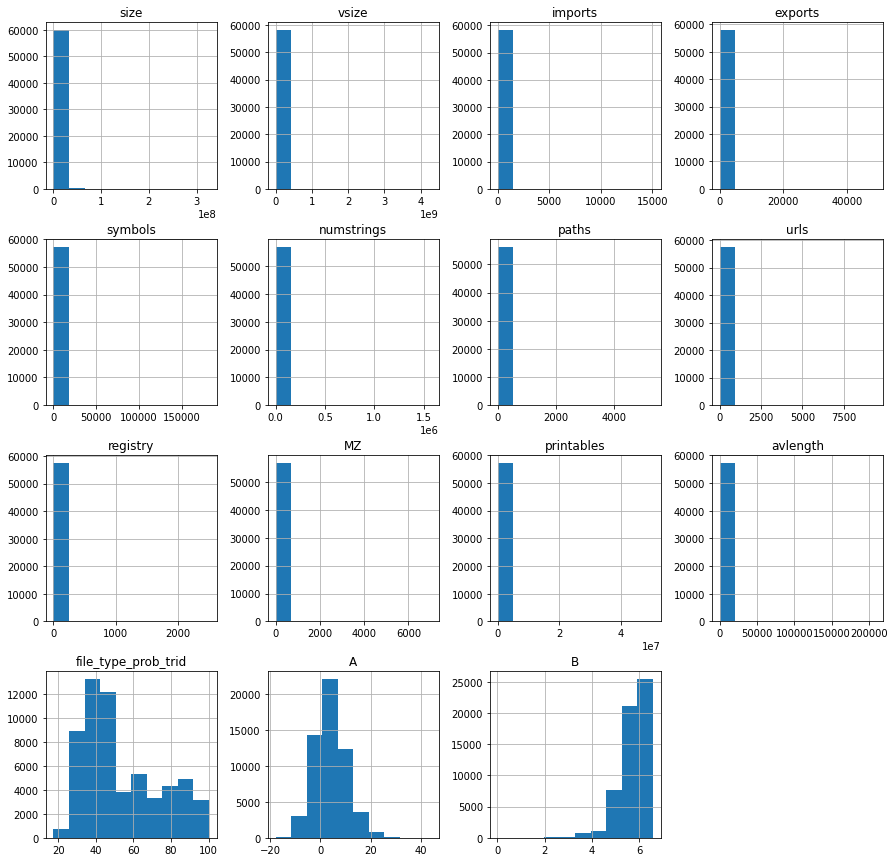

In [17]:
pd.concat([train_data],axis=1).hist(figsize=(15,15))
plt.show()

We can see that there are outliers that widen some of the histograms.

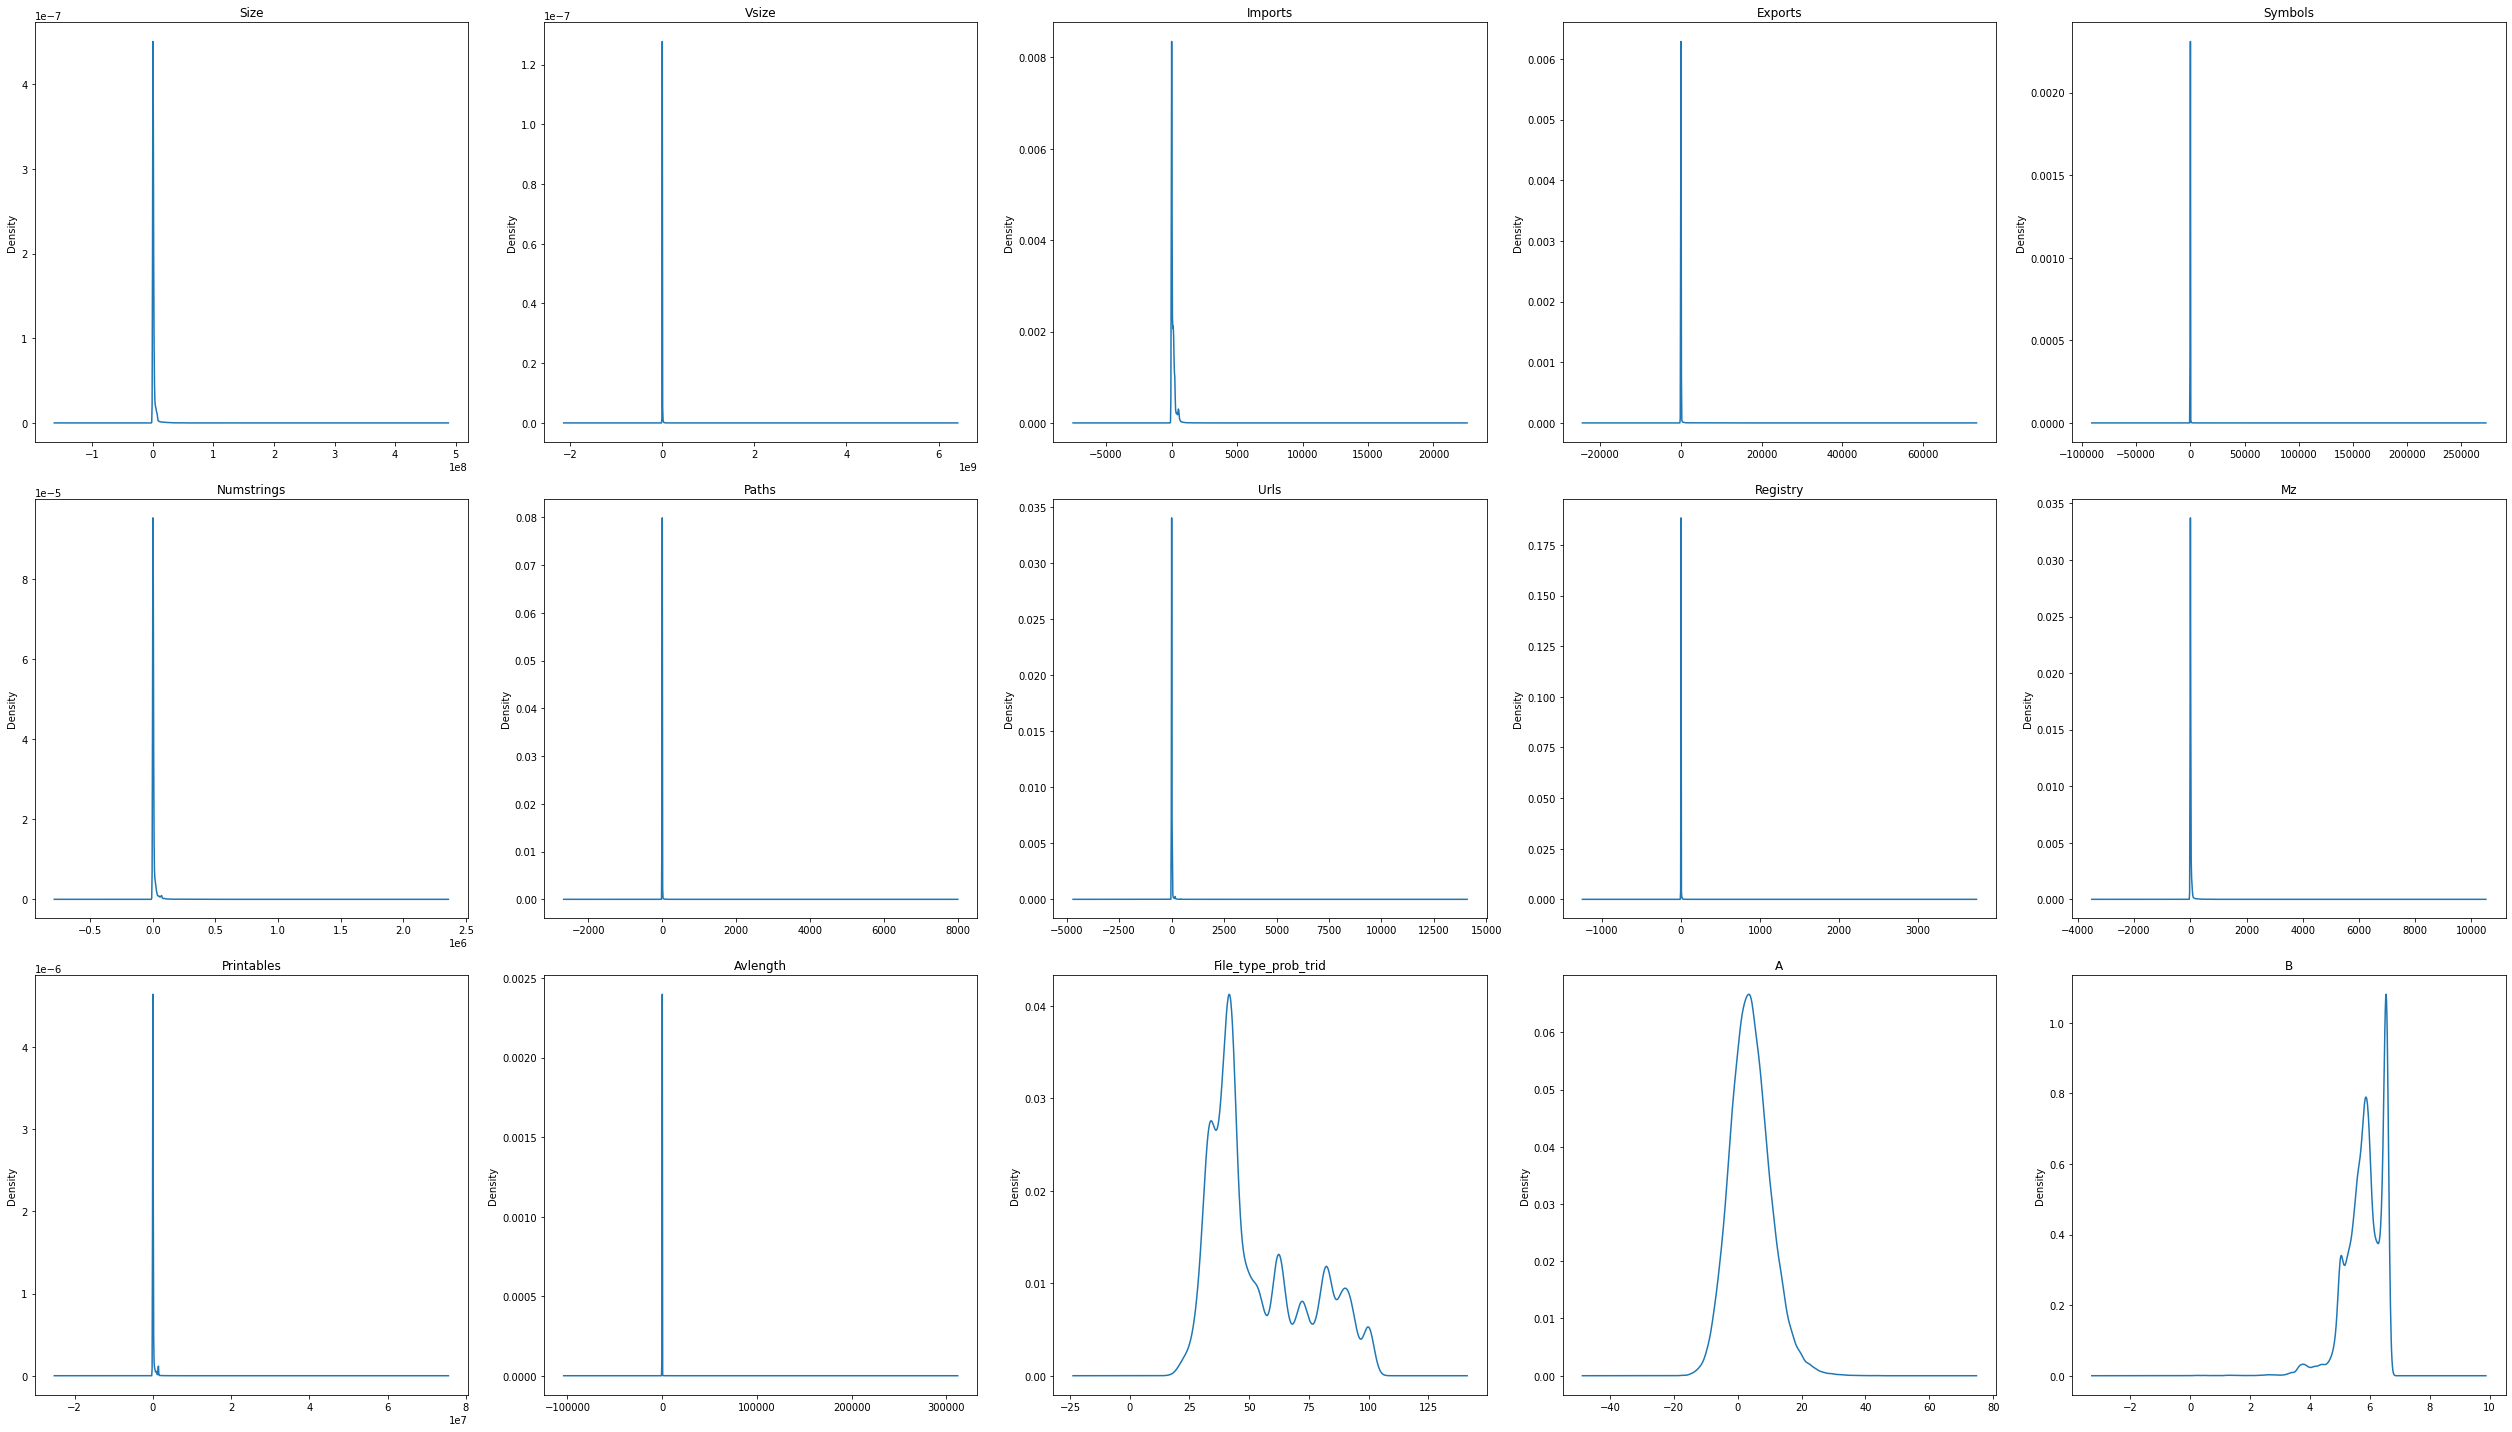

In [18]:
def create_distribution_graph(df):
    numeric_cols = df.select_dtypes(include=[float, int]).columns
    num_cols = len(numeric_cols)
    rows = int(math.sqrt(num_cols))
    cols = int(math.ceil(num_cols / rows))
    
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(35, 20))
    
    plot_index = 0
    for i in range(rows):
        for j in range(cols):
            if plot_index < num_cols:
                col = numeric_cols[plot_index]
                df[col].plot.density(ax=axes[i, j])
                axes[i, j].set_title(col.capitalize())
                plot_index += 1
    
    plt.tight_layout()
    plt.show()
    
create_distribution_graph(train_data)

We can see that the features: 'size', 'vsize', 'exports', 'Symbols', 'numstrings', 'Paths', 'Urls', 'Registry', 'Mz', 'printables', 'Avlength', 'A' look like they are distributing normally.<br> Also, we see that some of the normally distributed peaks are spread on the x-axis with very high values. <br> Perhaps removing outliers will bring us closer to the true distribution of the features, and show us more accurately whether there is a normal distribution or it's due to the high spread. <br>

We will deal with outliers later.<br>
Hence, let's apply log transformation on these features:

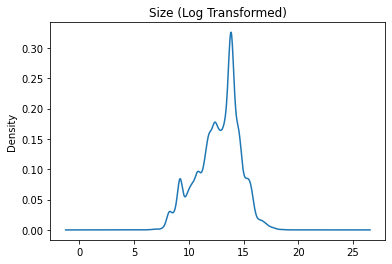

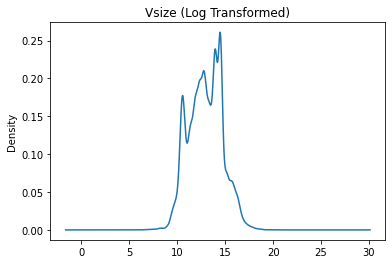

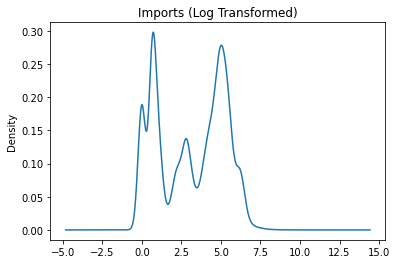

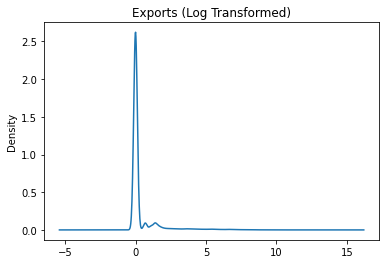

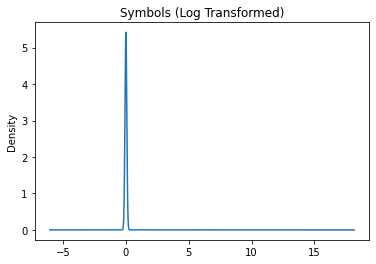

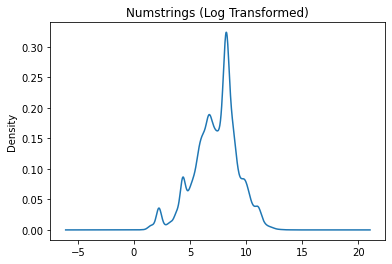

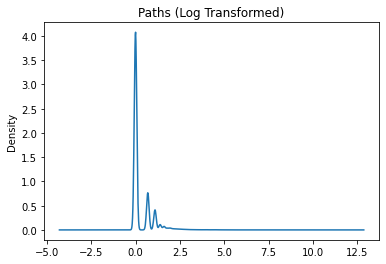

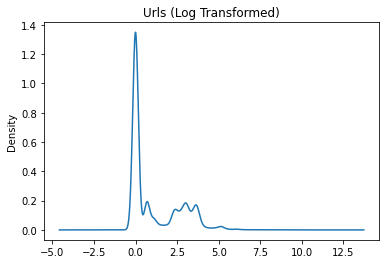

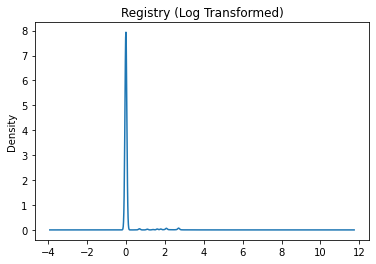

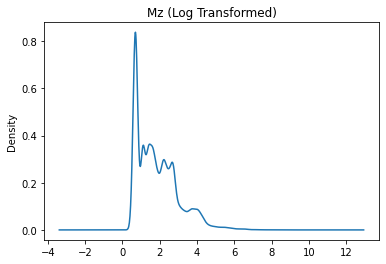

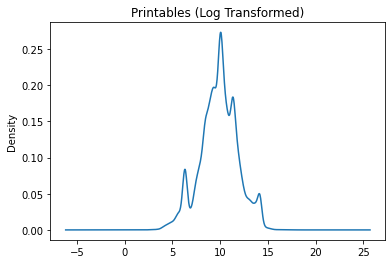

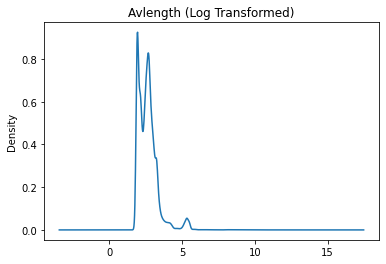

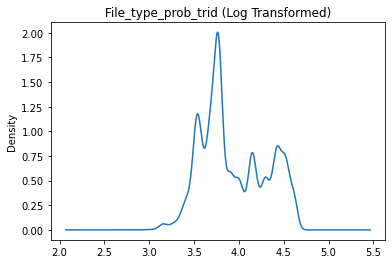

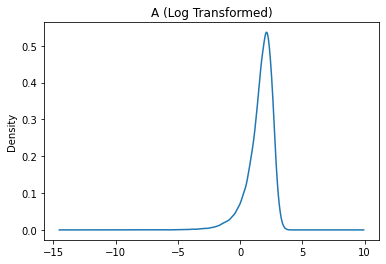

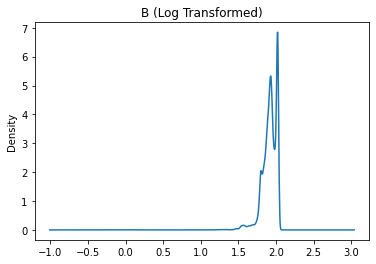

In [19]:
# Function that creates a distribution graph for all the numeric features
def create_distribution_graph(df):
    for i, col in enumerate(df.select_dtypes(include=[float, int])):
        transformed_data = np.log1p(df[col])  # Apply logarithm transformation
        transformed_data.plot.density()
        plt.title(col.capitalize() + " (Log Transformed)")
        plt.show()

create_distribution_graph(train_data)

Now we can see clearly that only the 'A' feature is distributed normally but later we will take another look at the distributions and outliers.

#### Correlation
We want to check the correaltion between features.

Let's take a look in general. <br> 
In this part we will use a new method which was not learnt in class- the VIF method.
We want primarily observe whether a feature has a high correlation with other features based on its Variance Inflation Factor (VIF) value.<br>
A high VIF value indicates multicollinearity, which suggests a strong correlation between the feature and other features in the dataset.

<span style="color:red;">TODO remove comment after fixing the import</span>

In [20]:
# # Select numerical features (excluding the categorical features)
# numerical_features = train_data.select_dtypes(include=['float64', 'bool'])

# # Convert boolean features to numeric (0 and 1)
# boolean_features = numerical_features.select_dtypes(include='bool')
# boolean_features = numerical_features.dropna()
# numerical_features[boolean_features.columns] = boolean_features.astype(int)

# # Remove any rows with null values in the selected features
# numerical_features = numerical_features.dropna()

# # Calculate VIF for each feature
# vif = pd.DataFrame()
# vif["Variable"] = numerical_features.columns
# vif["VIF"] = [variance_inflation_factor(numerical_features.values.astype(float), i) for i in range(numerical_features.shape[1])]

# print("VIF for all features except category features:")
# print(vif)

To calculate the VIF, we regress each predictor variable against all the other predictor variables in the model. The VIF for each variable is then computed as the ratio of the variance of the estimated regression coefficient to the variance of the coefficient if that variable was uncorrelated with the other predictors.

Features with VIF values close to 1 (around or below 1) indicate low multicollinearity. These features are relatively independent of each other when predicting the target variable.<br>
Examples: vsize, imports, exports, has_signature, has_tls, symbols, paths, urls, registry, MZ, A.<br>

Features with VIF values between 1 and 5 are generally considered to have moderate multicollinearity. Although there might be some correlation, it is not severe.<br>
Examples: has_debug, has_relocations, printables and avlength.<br>

Features with VIF values above 5 suggest the presence of multicollinearity. These features have a strong correlation with other features in the dataset and may negatively impact the model's performance.<br>
Examples: size, has_resources, numstrings, file_type_prob_trid, B.
<br><br>
Based on this information, we can consider the VIF values to identify potential issues related to multicollinearity.<br>
 High VIF values indicate that certain features are highly correlated with others, which can affect the model's interpretability and stability.<br>
In such cases, we may consider removing or transforming the highly correlated features to mitigate multicollinearity and improve the model's performance.




However, the VIF values alone do not provide information about the specific pairwise correlations between features. <br>
To determine the exact correlations between features, we need to calculate the correlation matrix or pairwise correlation coefficients.

Therefore, we will make a correlation matrix:

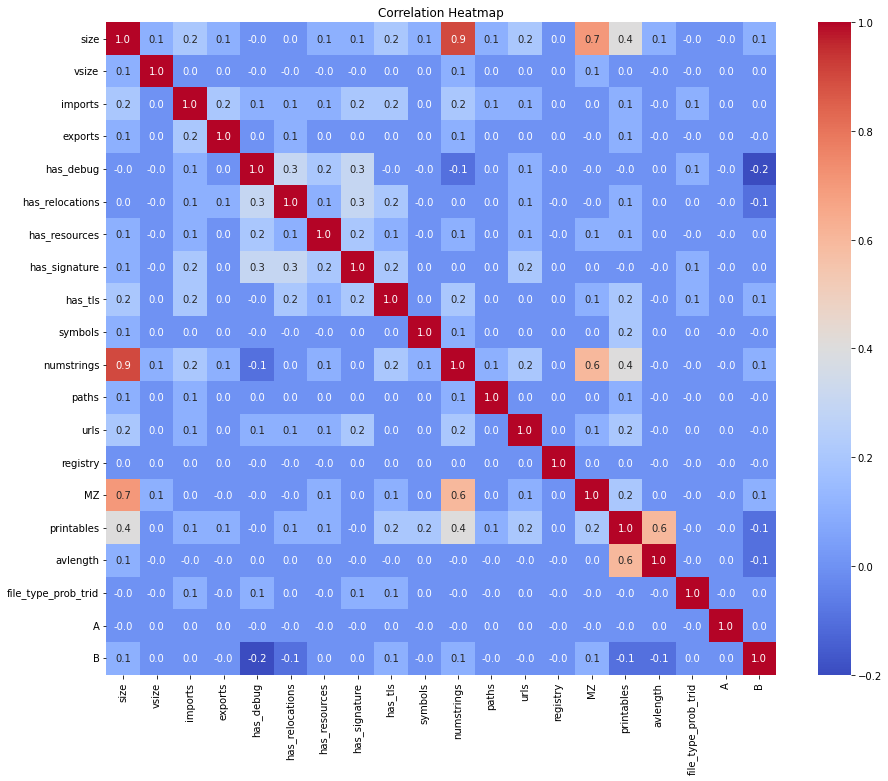

In [21]:
corr_matrix = train_data.corr().round(1)  # Round the correlation values to 1 decimal place
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')  # Set fmt='.1f' to display 1 decimal place
plt.title('Correlation Heatmap')
plt.show()

This function creates a visual representation of the correlation matrix using a color-coded heatmap.<br>
It displays a grid of squares, where each square represents the correlation between two features. 

Here are some general observations we can make from the heatmap:

<b> Strong positive correlation:</b> If two features have a high positive correlation ("numstrings" and "size" features), it suggests that as one feature increases, the other feature tends to increase as well. Conversely, if two features have a strong negative correlation (close to -1), it means that as one feature increases, the other feature tends to decrease.

<b>Weak or no correlation:</b> If the correlation coefficient is close to 0, it indicates a weak or no linear relationship between the features ("urls" and "vsize", "has_debug" and "avlength"). This means that changes in one feature do not necessarily correspond to changes in the other feature.

<b>Redundant or highly correlated features:</b> High correlation values between pairs of features might indicate that these features provide similar information, in our case: "numstrings" and "size" (0.9), "MZ" and "size"(0.7). In such cases, we could consider removing one of the redundant features to reduce dimensionality and potential multicollinearity.<br>
We will use these conclusions later in our analysis.

Let's take another look on the high correlated features:

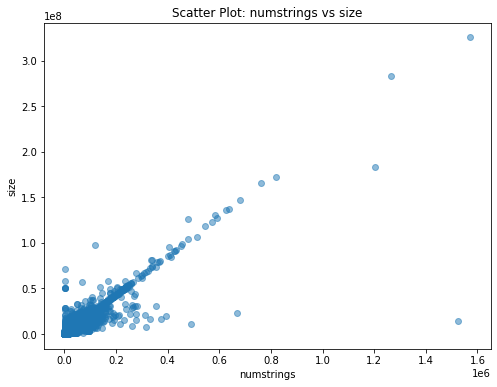

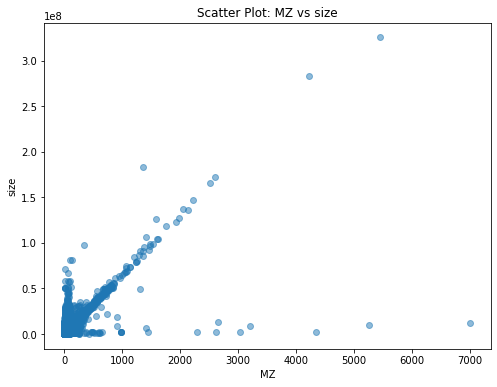

In [22]:
# Extract the "numstrings" and "size" features from the train_data DataFrame
numstrings = train_data['numstrings']
mz = train_data['MZ']
size = train_data['size']

# Plot a scatter plot of the two features
plt.figure(figsize=(8, 6))
plt.scatter(numstrings, size, alpha=0.5)
plt.xlabel('numstrings')
plt.ylabel('size')
plt.title('Scatter Plot: numstrings vs size')
plt.show()

# Plot a scatter plot of the two features
plt.figure(figsize=(8, 6))
plt.scatter(mz, size, alpha=0.5)
plt.xlabel('MZ')
plt.ylabel('size')
plt.title('Scatter Plot: MZ vs size')
plt.show()


We can notice that there is a high linear correlation.

<b>A more in-depth analysis:</b> <br>
- <b>numstrings and size</b>

    The "numstrings" feature represents the number of printable strings that are at least five printable characters long. <br>
    This can be an indicator of the amount of text or human-readable content present in the file. <br>
    Larger files are likely to have more text or content, which could explain the higher correlation between the file size and the number of strings.

    It is possible that larger files tend to have more printable strings, or vice versa.

    <b> The VIF values of both these features is high! <br>
    Moreover, looking on the plot, Most of the values are on the linear line.</b>

- <b>MZ and size</b>

    The "MZ" string is a signature commonly found in Windows executable files (PE files) that indicates the file is a Portable Executable format. <br>
    This format is typically used for Windows applications and executables. Therefore, it is expected to observe a higher frequency of the "MZ" string in larger files, as larger files often contain more complex and feature-rich applications.

    To gain a better understanding of the relationship between the "MZ" feature and the file size, <br> we can further investigate the distribution of file sizes for files with and without the "MZ" string.  <br>
    This will help determine if the correlation is significant and consistent across the dataset.

    <b>The VIF values of size is high but the VIF of MZ is low!<br>
    Moreover, looking on the plot, there are a lot of values that are not on the linear line.</b>

In conclusion, the VIF index helped us to understand in general whether there is a correlation for features.<br>
The correlation matrix looked linearly at whether there was a correlation between each 2 features.<br>
In both of these indices we saw that the "size" feature has a very high correlation.<br>
All in all, later, we will maybe consider dropping some of them to improve the model.

Correlation from another look:

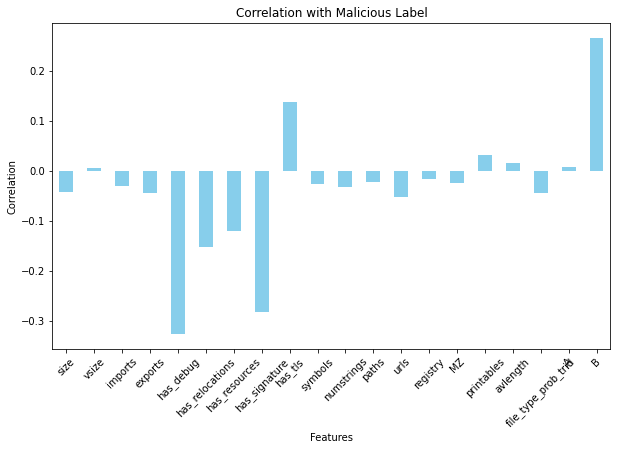

In [23]:
plt.figure(figsize=(10, 6))
correlation_matrix = train_with_labels.corr()
correlation_with_label = correlation_matrix['label']

# Remove the label feature from the correlation
correlation_with_label = correlation_with_label.drop('label')

correlation_with_label.plot(kind='bar', color='skyblue')
plt.title('Correlation with Malicious Label')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()


The resulting plot shows the correlation values between each feature and the 'label' column, providing insights into the relationship between the features and the malicious label. We can see that there is no feature that is very correlated with the labels.<br>
Can not draw any conclusion.


### Visualizations of Null Values
In addition, we will look at the rows with missing values to try to learn what characterizes such rows:

In [24]:
nan_rows = train_data[train_data.isna().any(axis=1)]
print(nan_rows.shape[0])
nan_rows.head()

34810


,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,urls,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C
3,ff6176c53ca9b58040c93870c264843b93b5e290c28e57...,8192.0,36864.0,6.0,0.0,False,False,False,False,False,...,0.0,0.0,1.0,678.0,9.549296,Win64 Executable (generic),28.0,2.217531,5.896053,vh
4,59b8bc6ac157a553440978406c8aa8eb8a25c166af1175...,396288.0,421888.0,133.0,0.0,True,True,True,False,False,...,0.0,0.0,5.0,35881.0,7.587439,Win64 Executable (generic),32.2,9.401164,NaN,vh
5,04c28622a87150c4760ccd9801d378c6e96373099bbe02...,434200.0,450560.0,1.0,NaN,True,<NA>,True,True,False,...,15.0,0.0,3.0,9025.0,14.486356,"Generic CIL Executable (.NET, Mono, etc.)",72.5,5.760773,5.412149,gow
6,0021b1834cdef23a063058ecb9337e5ecafc1485944b46...,2360832.0,2383872.0,1.0,0.0,False,True,True,False,False,...,NaN,0.0,4.0,258056.0,15.580269,"Generic CIL Executable (.NET, Mono, etc.)",62.0,NaN,5.249977,cs
10,0891f16066861dd46c2f0af60c13df7d6bddcdefd9a662...,8192.0,32768.0,1.0,0.0,<NA>,True,True,False,False,...,0.0,0.0,1.0,2249.0,17.708661,Win32 Dynamic Link Library (generic),38.4,7.001781,4.903352,er



Let's see what percentage of missing values exist in each feature.

In [25]:
def calculate_null_percentage(df):
    null_values = df.isnull().sum()
    null_columns = null_values[null_values > 0]

    null_columns_df = pd.DataFrame({
        "Feature": null_columns.index,
        "Null%": (null_columns / df.shape[0]) * 100
    })

    # Add features with 0 null values
    features_with_no_nulls = df.columns[df.isnull().sum() == 0]
    null_columns_df = pd.concat([null_columns_df, pd.DataFrame({"Feature": features_with_no_nulls, "Null%": 0})])
    null_columns_df.reset_index(drop=True, inplace=True)

    return null_columns_df
nulls = calculate_null_percentage(train_data)
nulls

,Feature,Null%
0,vsize,3.225000
1,imports,2.898333
2,exports,3.488333
3,has_debug,4.878333
4,has_relocations,5.540000
5,has_resources,3.268333
6,has_signature,3.228333
7,has_tls,4.830000
8,symbols,4.426667
9,numstrings,4.530000


Based on these observations, it appears that some samples in our dataset have missing information for certain features.<br> Not all features have missing values (only 18). <br> In addition, even if there are missing values they are not more than 7 percent of the data in that column.<br>

Number of missing values for each feature:

In [26]:
missing_values = train_data.isnull().sum()
print(missing_values)

sha256                    0
size                      0
vsize                  1935
imports                1739
exports                2093
has_debug              2927
has_relocations        3324
has_resources          1961
has_signature          1937
has_tls                2898
symbols                2656
numstrings             2718
paths                  3660
urls                   2349
registry               2525
MZ                     3089
printables             2739
avlength               2757
file_type_trid            0
file_type_prob_trid       0
A                      3704
B                      3751
C                      2051
dtype: int64


Missing values can potentially affect the analysis and modeling process, as they may introduce biases or result in incomplete insights.<br>
We would fill all that null values later.



### Visualisation Of Categorial Data

Except the 'sha256' feature, there are 2 another features of categorical features "C" and "file_type_trid" that are much clearer and easier to see as a graph:

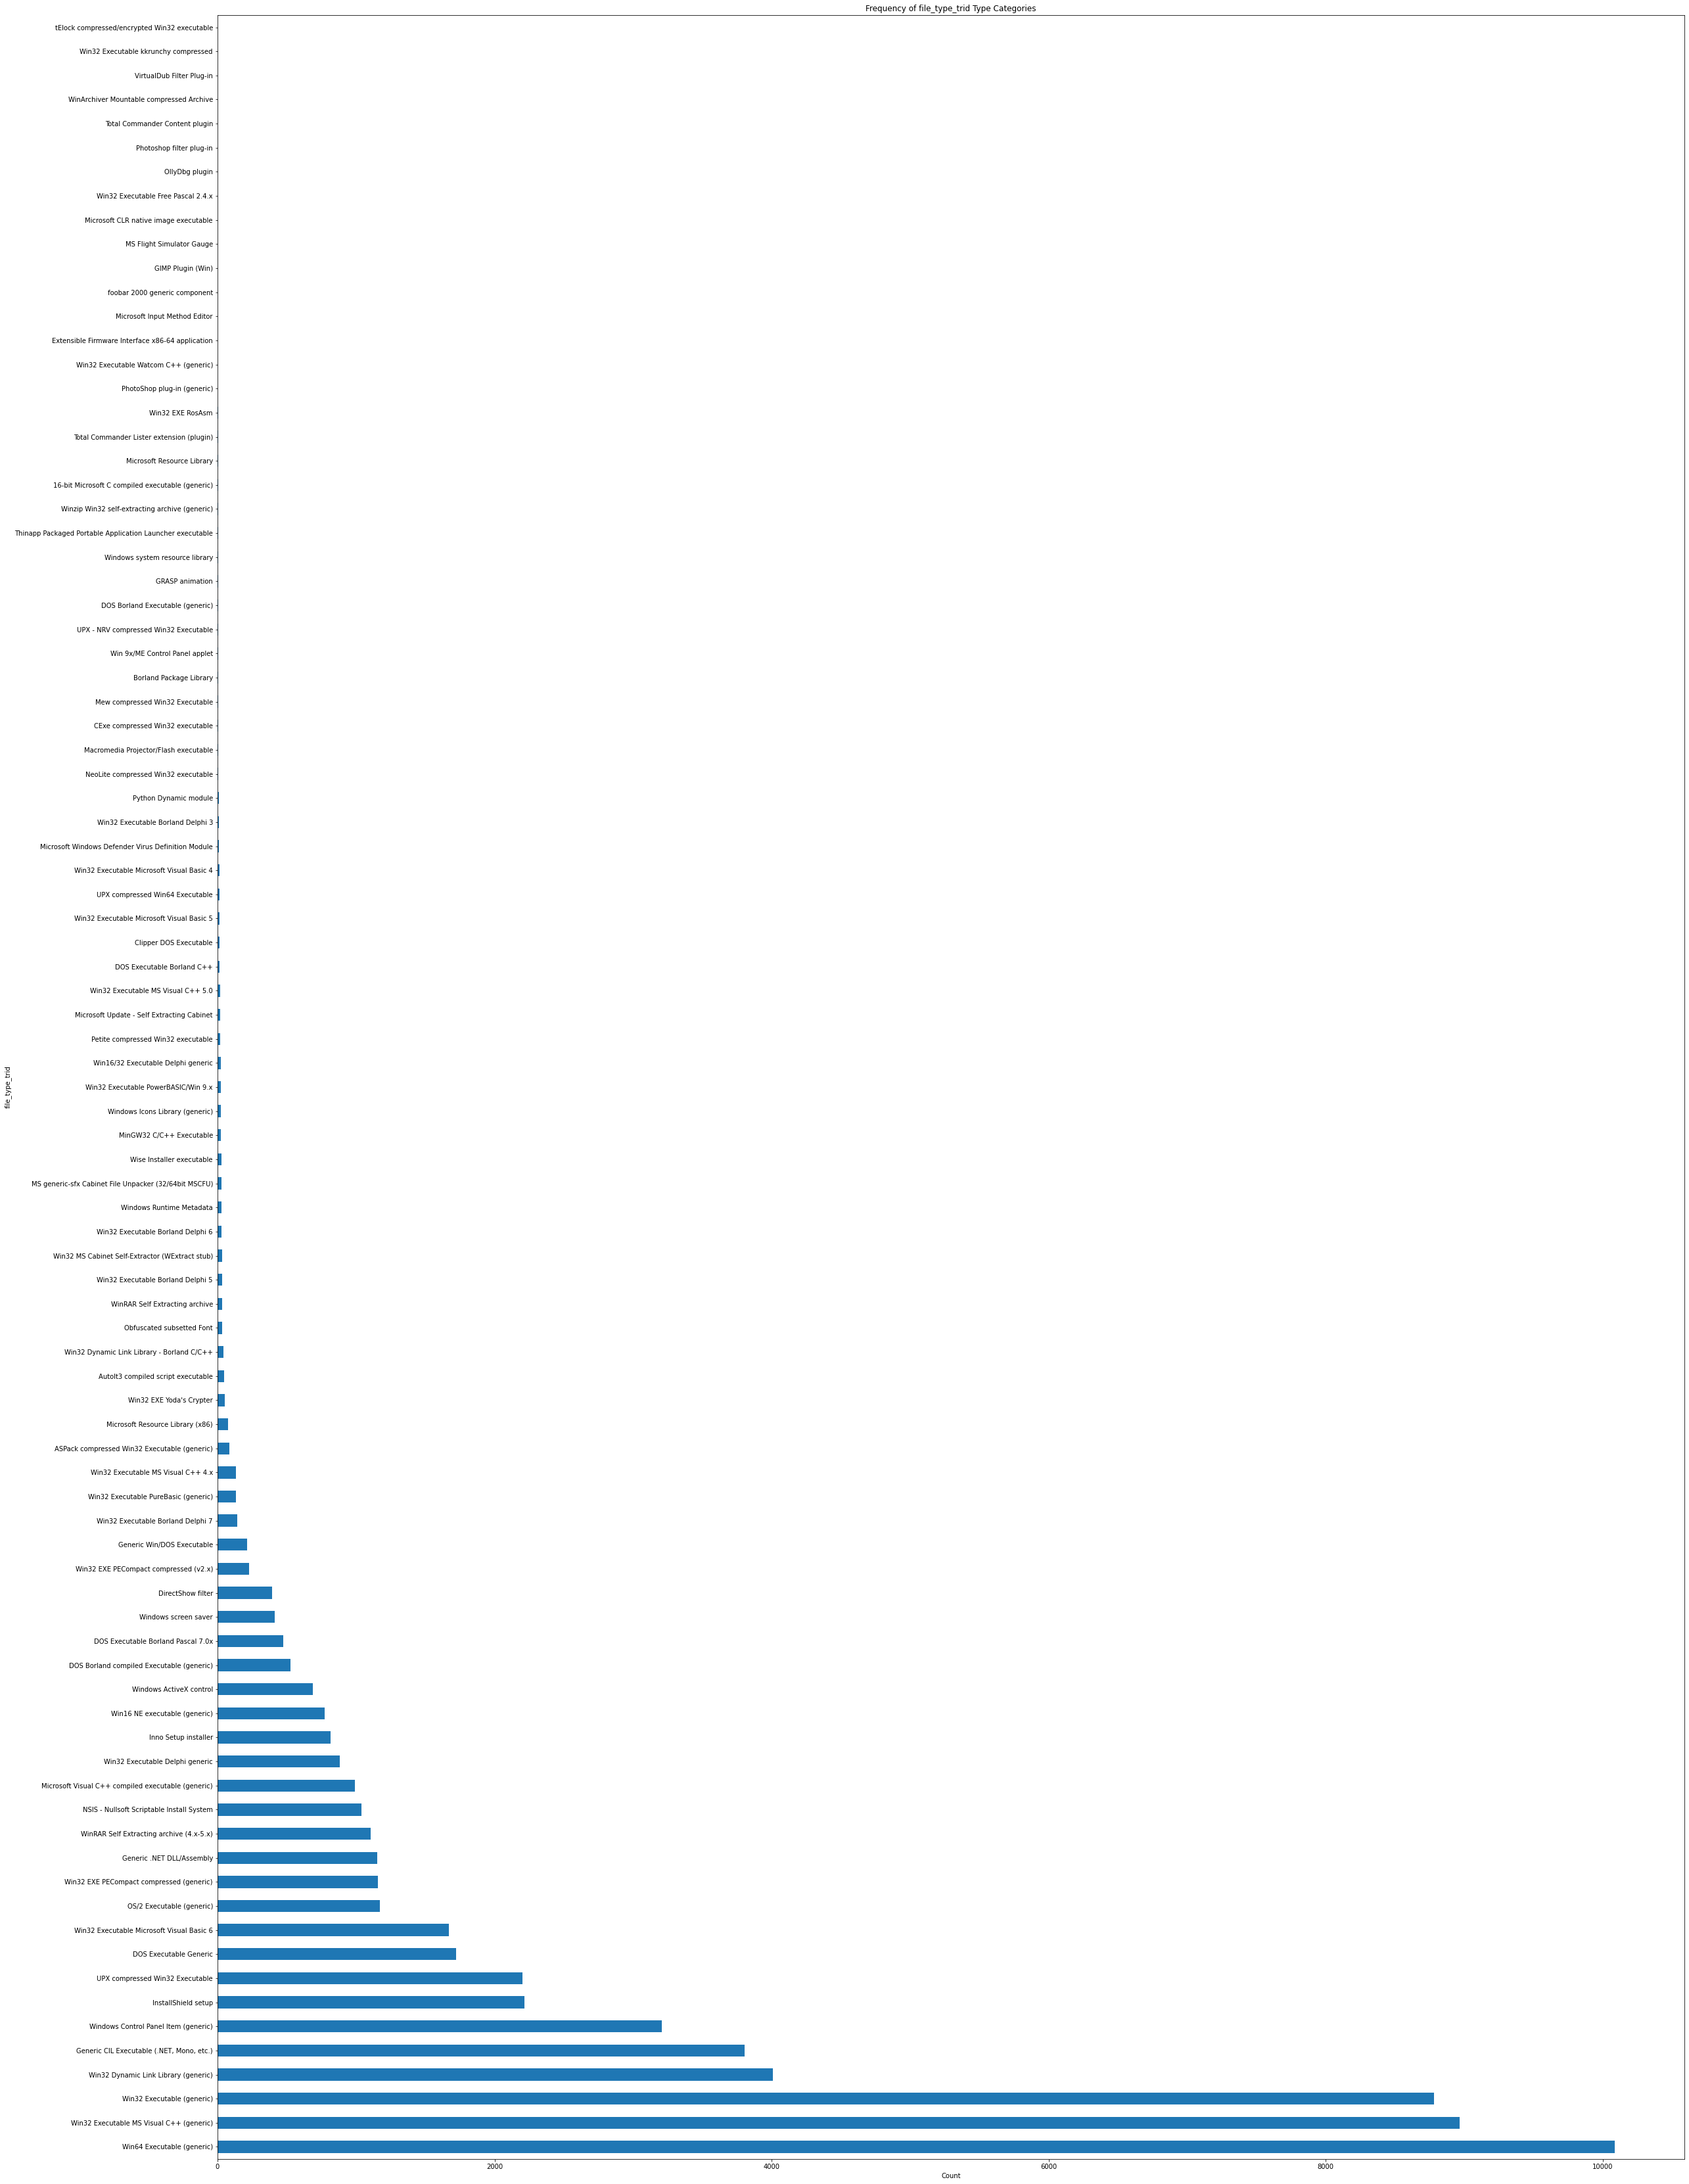

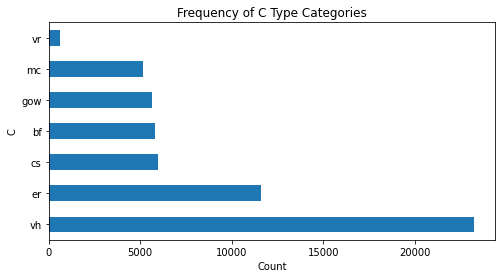

In [27]:
category_features = ['file_type_trid', 'C']

for feature in category_features:
    # Create a horizontal bar plot
    if feature == 'C':
        plt.figure(figsize=(8, 4))
    if feature == 'file_type_trid':
        plt.figure(figsize=(40, 60))
    category_counts = train_data[feature].value_counts()
    category_counts.plot(kind='barh')
    plt.title(f'Frequency of {feature} Type Categories')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()


We can see that the 'file_type_trid" feature has a lot of different categories.<br>
Let's take another look.

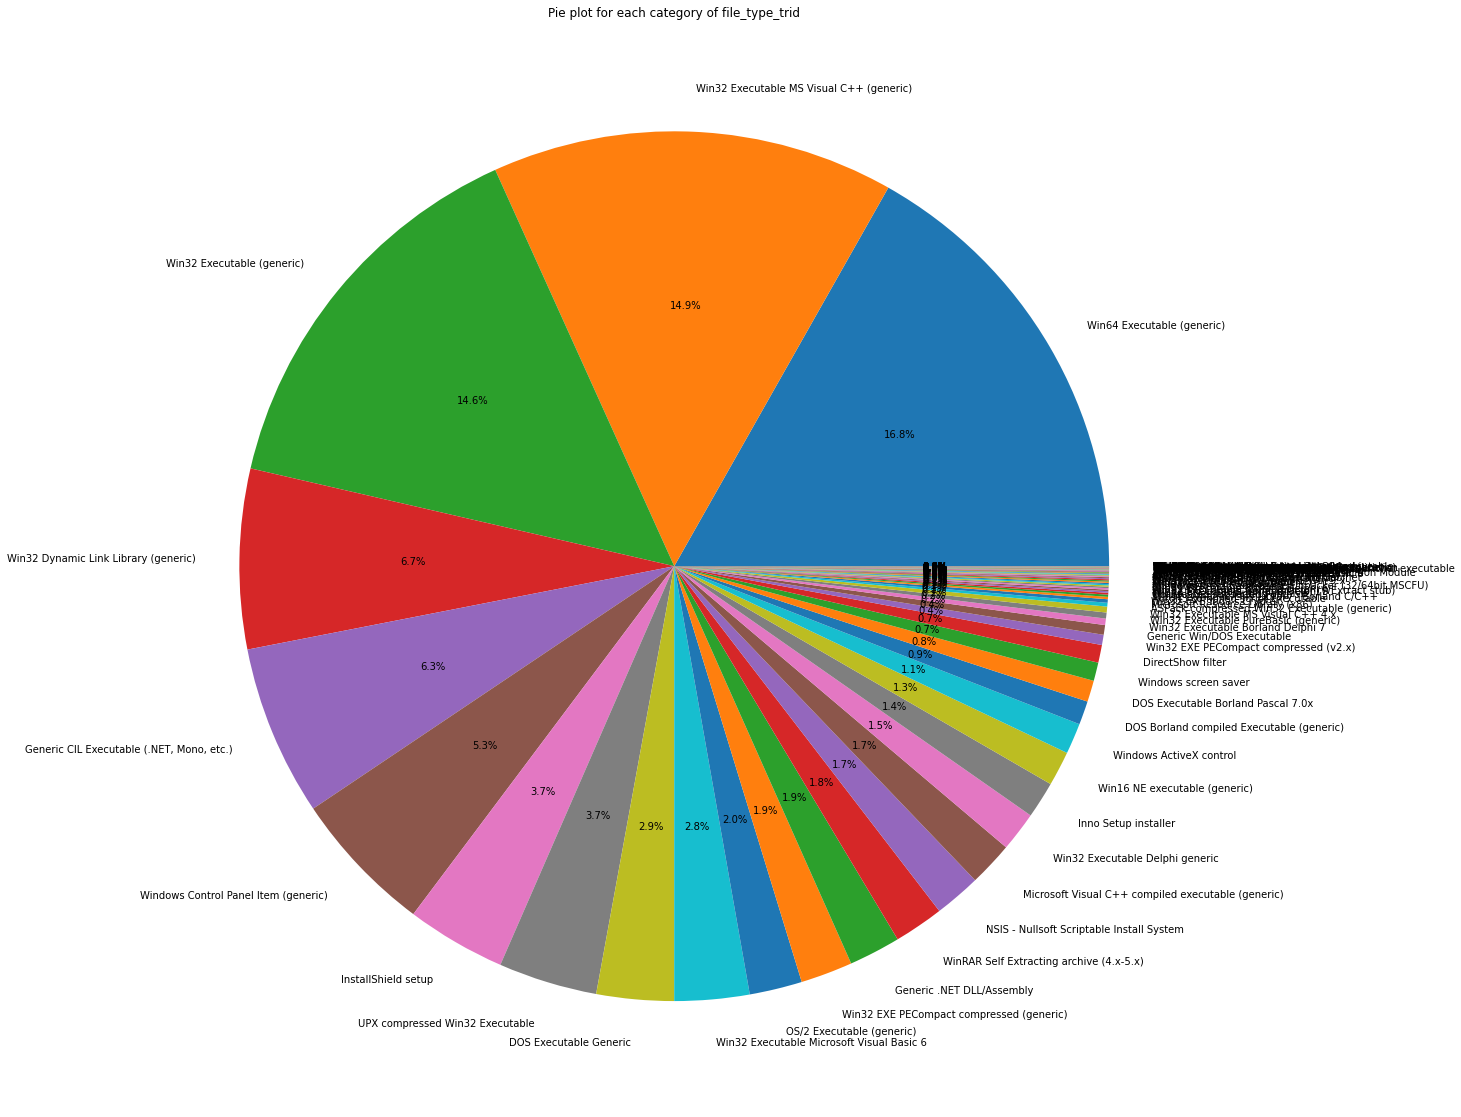

In [28]:
def plot_categotical_col(df):
      
    plt.rcParams['figure.facecolor'] = 'white'
    plt.figure(figsize=(50, 20))
    # pie plot
    df['file_type_trid'].value_counts().plot(kind='pie', label='file_type_trid', autopct='%1.1f%%').set(
        title='Pie plot for each category of file_type_trid')
    plt.ylabel('')  # Remove the y-axis label
    plt.show()
        
plot_categotical_col(train_data)

We observe that the feature 'file_type_trid' contains several categories with a relatively small proportion of the overall data (less than 5%).<br>
When these categories are encoded as dummy variables, they can significantly increase the dimensionality of the model, potentially leading to overfitting.
<br> We will address these issues later.


The "C" feature is anonymous feature. <br>
We want to better understand how this feature helps us, and to see whether the different categories somehow affect the labels.

<Figure size 720x432 with 0 Axes>

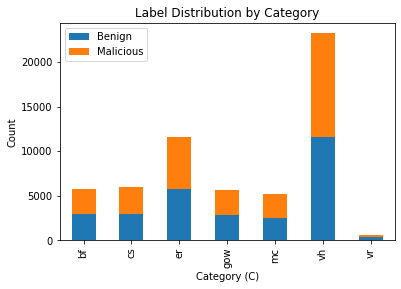

In [29]:
# Group the data by the "C" feature and calculate the count of labels for each category
category_counts = train_with_labels.groupby(['C', 'label']).size().unstack()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', stacked=True)
plt.title('Label Distribution by Category')
plt.xlabel('Category (C)')
plt.ylabel('Count')
plt.legend(['Benign', 'Malicious'])
plt.show()

<b>We can see that there is no big difference between the malicious and benign files in each category of "C" feature. <br>
Also, we can notice that "vh" category has many more lines than the other categories. </b> <br><br>


Now, lets do this on the boolean features:<br>
#### <u>Boolean Features:</u>

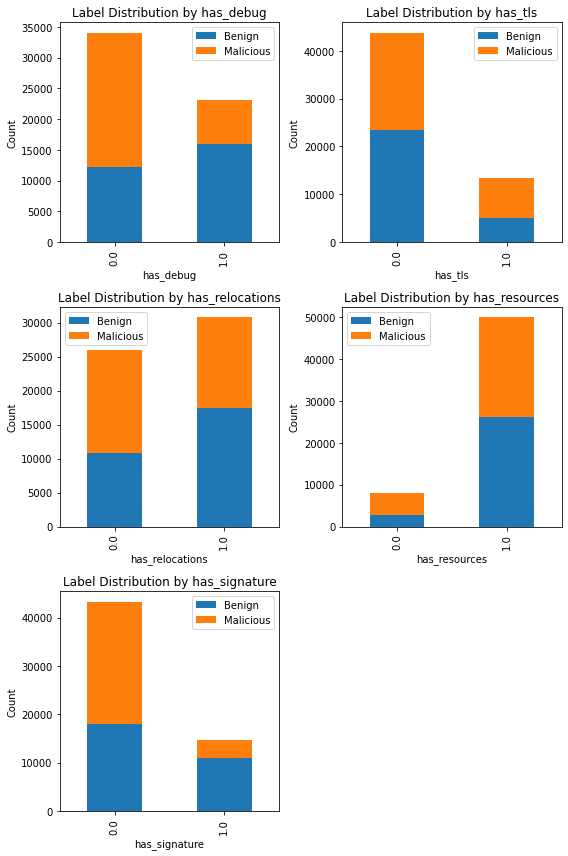

In [30]:
# List of boolean features
boolean_features = ['has_debug', 'has_tls', 'has_relocations', 'has_resources', 'has_signature']

# Calculate the number of rows and columns for the subplots
num_features = len(boolean_features)
num_rows = (num_features + 1) // 2
num_cols = min(2, num_features)

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4*num_rows))

# Flatten the axes if necessary
if num_features > 1:
    axes = axes.flatten()

# Iterate over each boolean feature
for i, feature in enumerate(boolean_features):
    # Group the data by the boolean feature and label, and calculate the count
    category_counts = train_with_labels.groupby([feature, 'label']).size().unstack()

    # Plot the results in the corresponding subplot
    ax = axes[i]
    ax.set_title(f'Label Distribution by {feature}')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Count')
    category_counts.plot(kind='bar', stacked=True, ax=ax)
    ax.legend(['Benign', 'Malicious'])

# Hide empty subplots
for j in range(num_features, num_rows*num_cols):
    axes[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Several things can be learned from all these outputs: <br>
<b>Category Imbalance:</b> By observing the height of the bars for each category, we can identify whether there is an imbalance in the dataset.<br>
If certain categories have significantly more instances than others, it could affect the performance of machine learning models trained on this data.<br>
In the feature "has_resources" the value 1 exists much more than the value 0.<br>
In the feature "has_signature" the value 0 exists much more than the value 1. <br>
In the feature "has_tls" the value 0 exists much more than the value 1.

<b>Label Distribution:</b> The plot also depicts the distribution of labels (benign and malicious) within each category.<br>
The stacked bars allow us to compare the proportion of benign and malicious instances for each category. <br>
<b>When the values in fields "has_debug" and "has_signature" are TRUE(1), there is a high chance that the file is benign.
It can be concluded from this that when the file has been debugged, or when there is a signature in the file, there are high chances that the file is benign.</b>
<br><br>


A few more observations:

Based on a little research we made, there are several characteristics that can potentially characterize a malicious file:<br>
- <u>Size</u> - malicious files may have unusually large or small sizes compared to benign files.<br>
- <u>Imports & Exports</u> - malicious files may have a high number of imported or exported functions, indicating potential malicious activities.<br>
- <u>Symbols</u> - malicious files may have a higher number of symbols. <br><br>
Let's check this:

Mean file size for malicious files: 1294838.7653333333
Mean file size for benign files: 1707199.5182333332


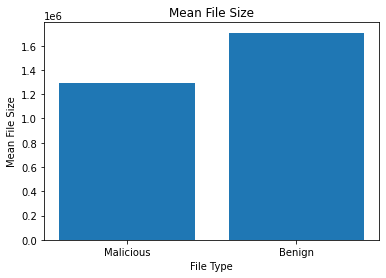

Mean number of imports for malicious files: 99.60106093579978
Mean number of imports for benign files: 112.91713166741759


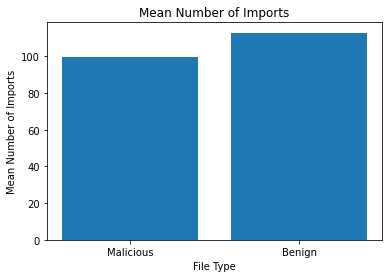

Mean number of exports for malicious files: 8.476797210300429
Mean number of exports for benign files: 54.51386960082612


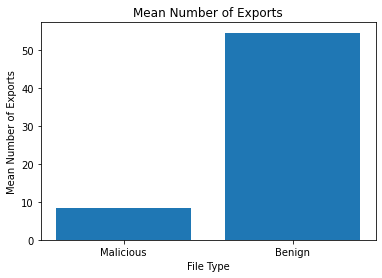

Mean number of symbols for malicious files: 6.256824687565454
Mean number of symbols for benign files: 74.0266569098892


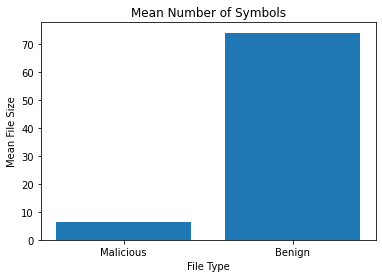

In [31]:
# Calculate the mean values for each feature
mean_size_malicious = train_with_labels.loc[train_with_labels['label'] == 1, 'size'].mean()
mean_size_benign = train_with_labels.loc[train_with_labels['label'] == 0, 'size'].mean()

mean_imports_malicious = train_with_labels.loc[train_with_labels['label'] == 1, 'imports'].mean()
mean_imports_benign = train_with_labels.loc[train_with_labels['label'] == 0, 'imports'].mean()

mean_exports_malicious = train_with_labels.loc[train_with_labels['label'] == 1, 'exports'].mean()
mean_exports_benign = train_with_labels.loc[train_with_labels['label'] == 0, 'exports'].mean()

mean_symbols_malicious = train_with_labels.loc[train_with_labels['label'] == 1, 'symbols'].mean()
mean_symbols_benign = train_with_labels.loc[train_with_labels['label'] == 0, 'symbols'].mean()


print("Mean file size for malicious files:", mean_size_malicious)
print("Mean file size for benign files:", mean_size_benign)

# Create a bar plot for the size feature
plt.bar(['Malicious', 'Benign'], [mean_size_malicious, mean_size_benign])
plt.title('Mean File Size')
plt.xlabel('File Type')
plt.ylabel('Mean File Size')
plt.show()

print("Mean number of imports for malicious files:", mean_imports_malicious)
print("Mean number of imports for benign files:", mean_imports_benign)
# Create a bar plot for the imports feature
plt.bar(['Malicious', 'Benign'], [mean_imports_malicious, mean_imports_benign])
plt.title('Mean Number of Imports')
plt.xlabel('File Type')
plt.ylabel('Mean Number of Imports')
plt.show()

print("Mean number of exports for malicious files:", mean_exports_malicious)
print("Mean number of exports for benign files:", mean_exports_benign)

# Create a bar plot for the exports feature
plt.bar(['Malicious', 'Benign'], [mean_exports_malicious, mean_exports_benign])
plt.title('Mean Number of Exports')
plt.xlabel('File Type')
plt.ylabel('Mean Number of Exports')
plt.show()

print("Mean number of symbols for malicious files:", mean_symbols_malicious)
print("Mean number of symbols for benign files:", mean_symbols_benign)

# Create a bar plot for the size feature
plt.bar(['Malicious', 'Benign'], [mean_symbols_malicious, mean_symbols_benign])
plt.title('Mean Number of Symbols')
plt.xlabel('File Type')
plt.ylabel('Mean File Size')
plt.show()

The results we got on the file size and the imports number of imported functions for malicious and benign files are not particularly significant.<br>

On the other hand, we see that in contrast to our thinking, the average number of exports is relativly high in benign files than in the malicious files. 
The same can be said about the occurance of symbols in files - the average number of symbols is relativly high in benign files as well!

<b>This is a very interesting conclusion that can help us a lot in classifying malicious files.</b><br>

Later, we will create a new feature to be the a proportion between imports and (exports+imports) which may help us identify malicious files.


### Visualizations of Outliers:

In order to maybe identify potential outliers lets visualize, as a start, the boxplots of each non-categorial feature:

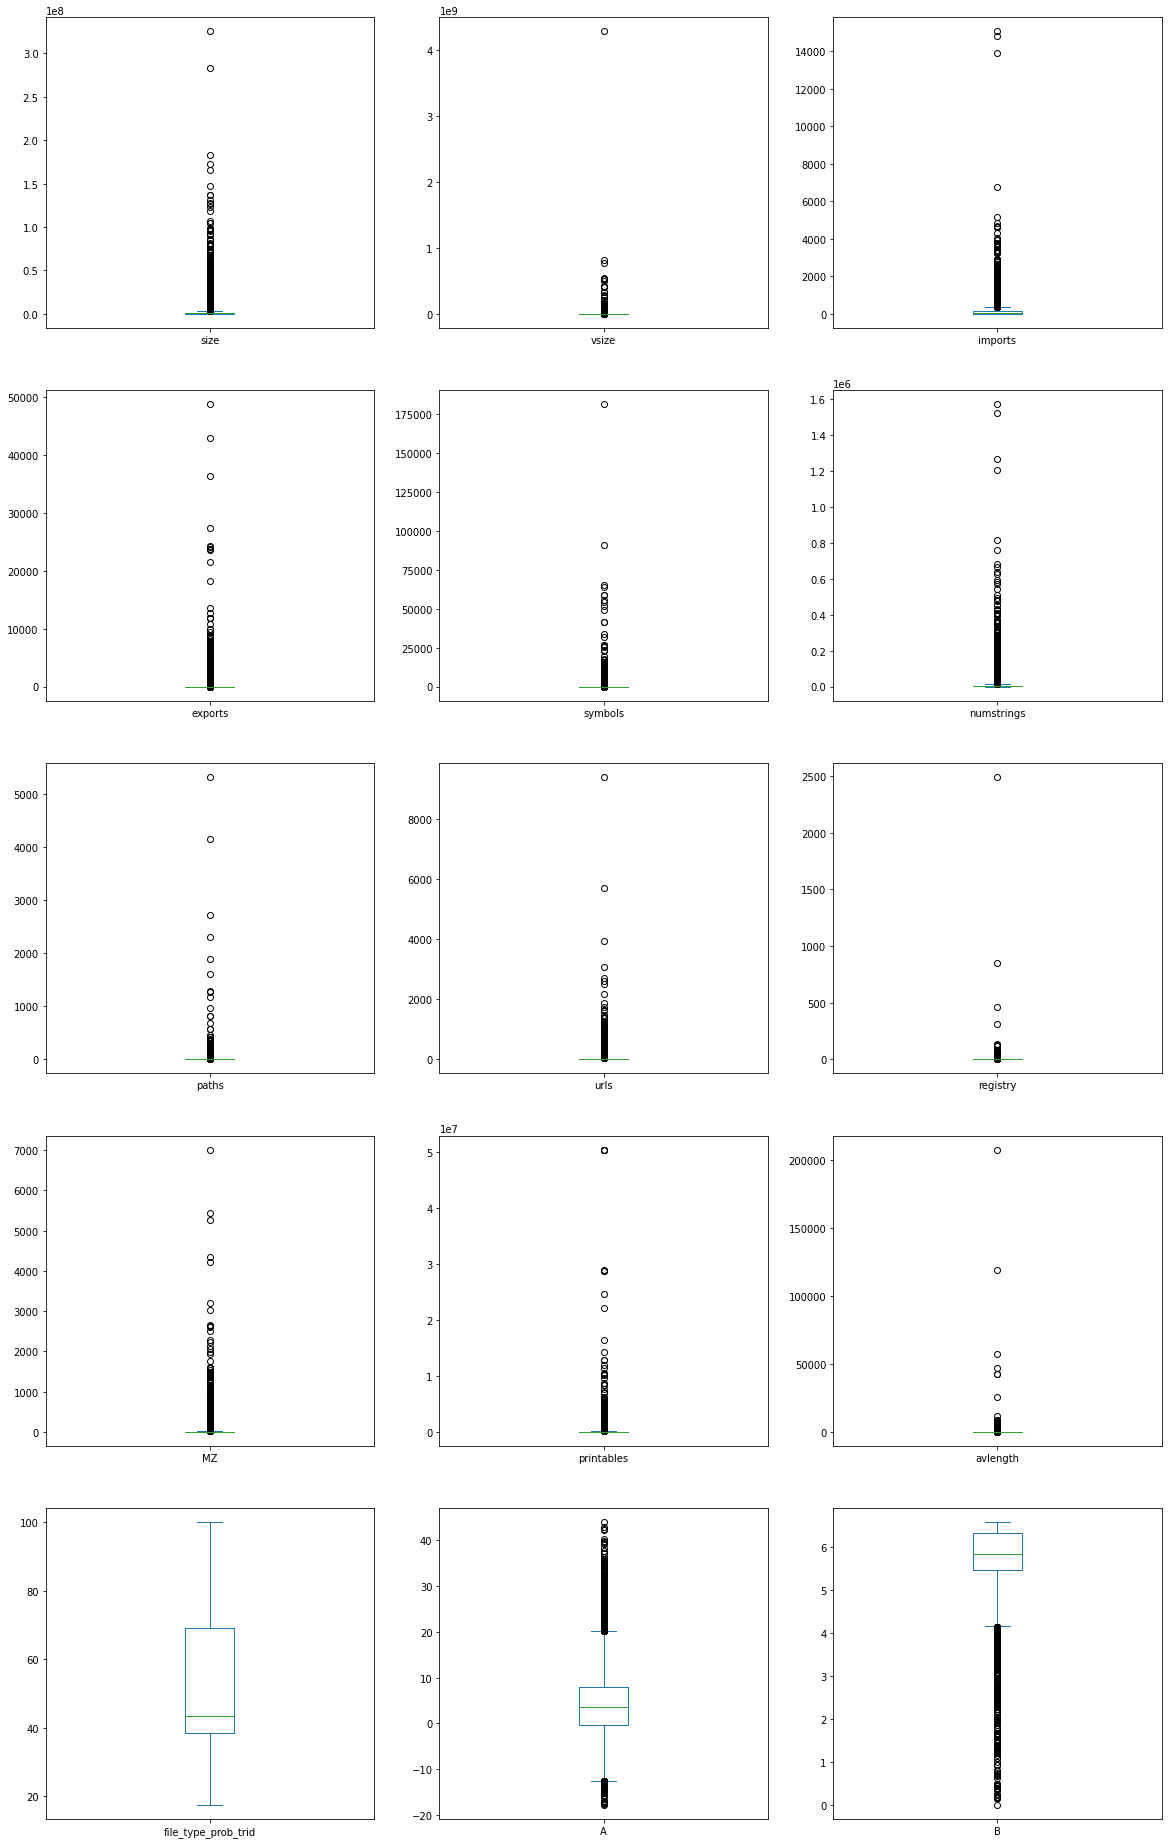

In [32]:
train_data.plot(kind="box",subplots=True,layout=(6,3),figsize=(20,40));

As we can see most of the non-categorial features have indeed outliers. Also, as observed before, feature 'A' is distributed normally and is can be concluded here too.

But before getting to final conclusions, lets see the log-boxplots of these features:

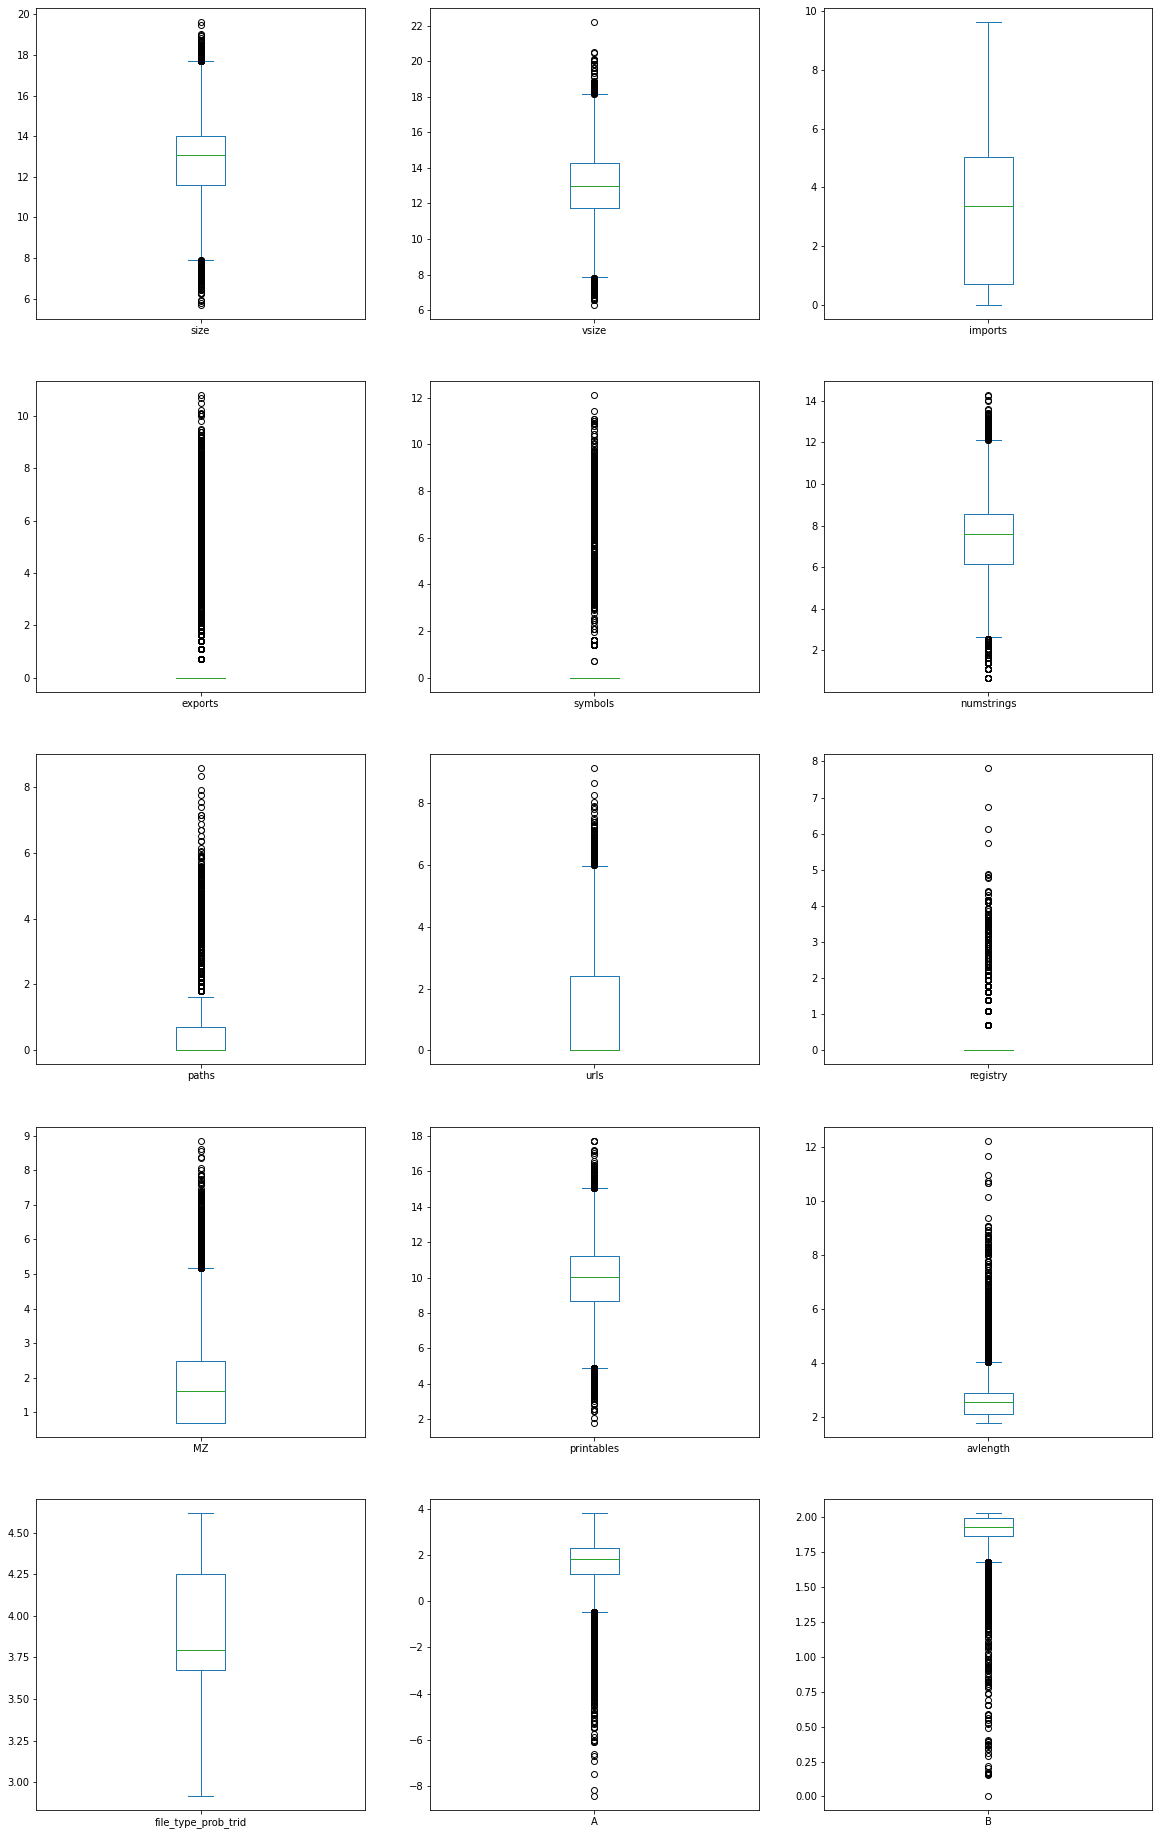

In [33]:
# Identify float-type features
float_features = train_data.select_dtypes(include=[np.float64, np.float32])

# Apply logarithmic transformation to float features
log_train_data = float_features.apply(np.log1p)

# Combine the transformed features with non-float features
transformed_train_data = train_data.copy()
transformed_train_data[float_features.columns] = log_train_data

# Plot the boxplots with logarithmic values
transformed_train_data.plot(kind="box", subplots=True, layout=(6, 3), figsize=(20, 40))
plt.show()

Looking at the boxplots now, we can see that also features 'size', 'vsize', 'numstrings' and 'printables' are normally distributed. <br>

Final check for normality just to be sure:

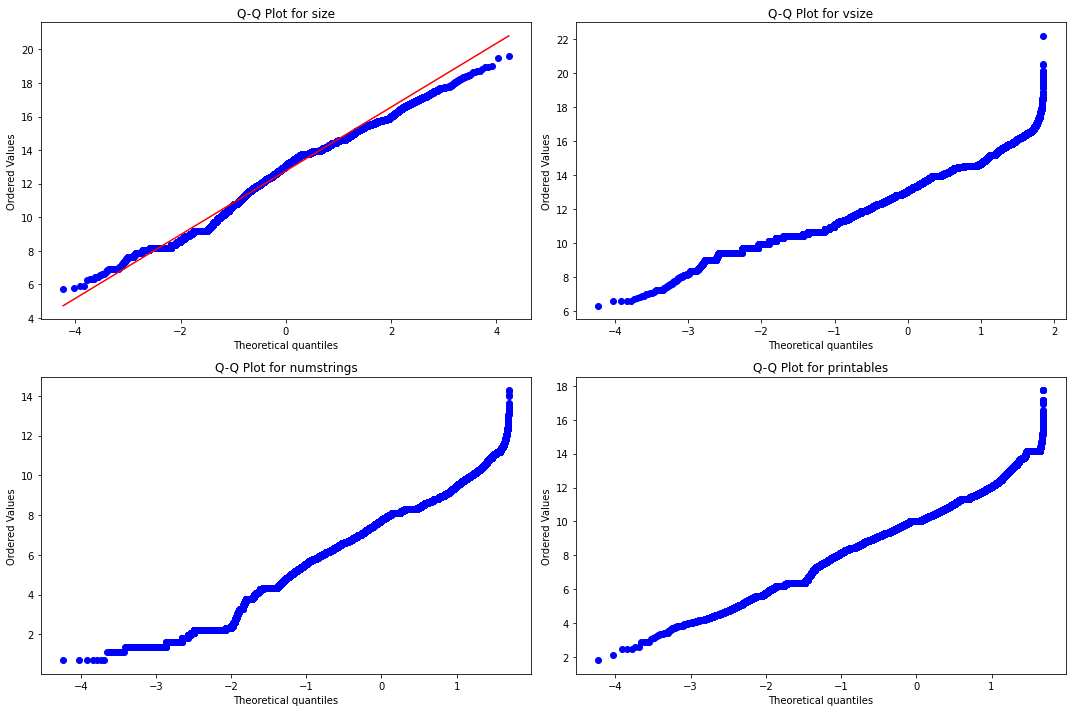

In [34]:

# Determine the number of rows and columns for the grid
num_rows = 2  # Number of rows in the grid
num_cols = 2  # Number of columns in the grid

log_train_data = log_train_data[['size', 'vsize', 'numstrings', 'printables']]

# log_train_data1 = train_data[['size', 'vsize', 'numstrings', 'printables']]

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each column in log_train_data
for i, column in enumerate(log_train_data.columns):
    # Create Q-Q plot
    stats.probplot(log_train_data[column], dist="norm", plot=axes[i])

    # Set plot title
    axes[i].set_title(f"Q-Q Plot for {column}")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Additionally to VIF method, we are using here a new tool that was not learnt in class - the QQ-Plot.

A QQ plot compares the observed data to a theoretical distribution. It helps to determine if the data follows the expected distribution or deviates from it.<br>
This tool provides us more information about the normallity of the features and strengthens our thinking.

After using Q-Q Plot we conclude that the features 'log-size', 'log-vsize', 'log-numstrings', 'log-printables' and 'A' are normally distributed.<br>
Hence, we will apply log manipulation on features 'size', 'vsize', 'numstrings' and 'printables' to reduce the outliers and IQR method afterwards if some outliers were left.

Creating functions to visualize outliers in several ways:

In [35]:
def identify_bounds(df, feature, lower_percentile = 0.25, upper_percentile = 0.75, threshold=1.5):
    # Calculate the specified percentiles
    p1 = df[feature].quantile(lower_percentile)
    p2 = df[feature].quantile(upper_percentile)
    spread = p2 - p1

    # Define the upper and lower bounds
    lower_bound = p1 - threshold * spread
    upper_bound = p2 + threshold * spread

    # print(f"For {feature} the threshold given {threshold}, Lower Bound: '{lower_bound}', Upper Bound: '{upper_bound}'.")
    return lower_bound, upper_bound

In [36]:
def visualize_outliers_histogram(df, feature, ax, lower_bound, upper_bound):
    # Plot histogram of the feature
    ax.hist(df[feature], bins=20)
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    
    # Mark the outliers on the plot
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    ax.scatter(outliers[feature], np.zeros_like(outliers[feature]), color='red', marker='x', label='Outliers')
    
    ax.legend()

def visualize_outliers_scatter(df, feature, ax, lower_bound, upper_bound):
    # Identify the outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    # Visualize the outliers
    ax.scatter(df.index, df[feature], color='blue', label='Data')
    ax.scatter(outliers.index, outliers[feature], color='red', label='Outliers')
    ax.set_xlabel('Index')
    ax.set_ylabel(feature)
    ax.set_title(f'Outliers in {feature}')
    ax.legend()

def visualize_outliers_boxplot(df, feature, ax, lower_bound, upper_bound):
    # Create a boxplot of the feature
    sns.boxplot(data=df, y=feature, ax=ax, width=0.5)
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Values')
    ax.set_title(f'Boxplot of {feature}')


def plot_grid_outliers(df, features, plotting_funcs):
    num_cols = len(features)
    num_funcs = len(plotting_funcs)
    rows = num_cols
    cols = num_funcs
    
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 5 * rows))
    
    axes = axes.reshape(-1)  # Reshape axes to a 1D array
    
    for i, feature in enumerate(features):
        lower_bound, upper_bound = identify_bounds(df, feature)
        
        for j, plot_func in enumerate(plotting_funcs):

            ax = axes[i * num_funcs + j]  # Get the correct axis
            plot_func(df, feature, ax, lower_bound, upper_bound)
    
    fig.suptitle('Outlier view for the Normally Distributed Features\n\n', fontsize=16, wrap=True)
    # plt.figtext(0.5, 0.95, 'Outlier view for the Normally Distributed Features', ha='center', fontsize=16)
    plt.subplots_adjust(top=0.9)  # Adjust the top spacing
    plt.tight_layout()
    plt.show()
    

In [37]:
def plot_normal_dist_outliers(IQR_data):

    IQR_features = ['size', 'vsize', 'numstrings', 'printables', 'A']
    plotting_funcs = [visualize_outliers_histogram, visualize_outliers_scatter, visualize_outliers_boxplot]
    plot_grid_outliers(IQR_data, IQR_features, plotting_funcs)

In each row we plot one of the normally distributed features and mark the outliers

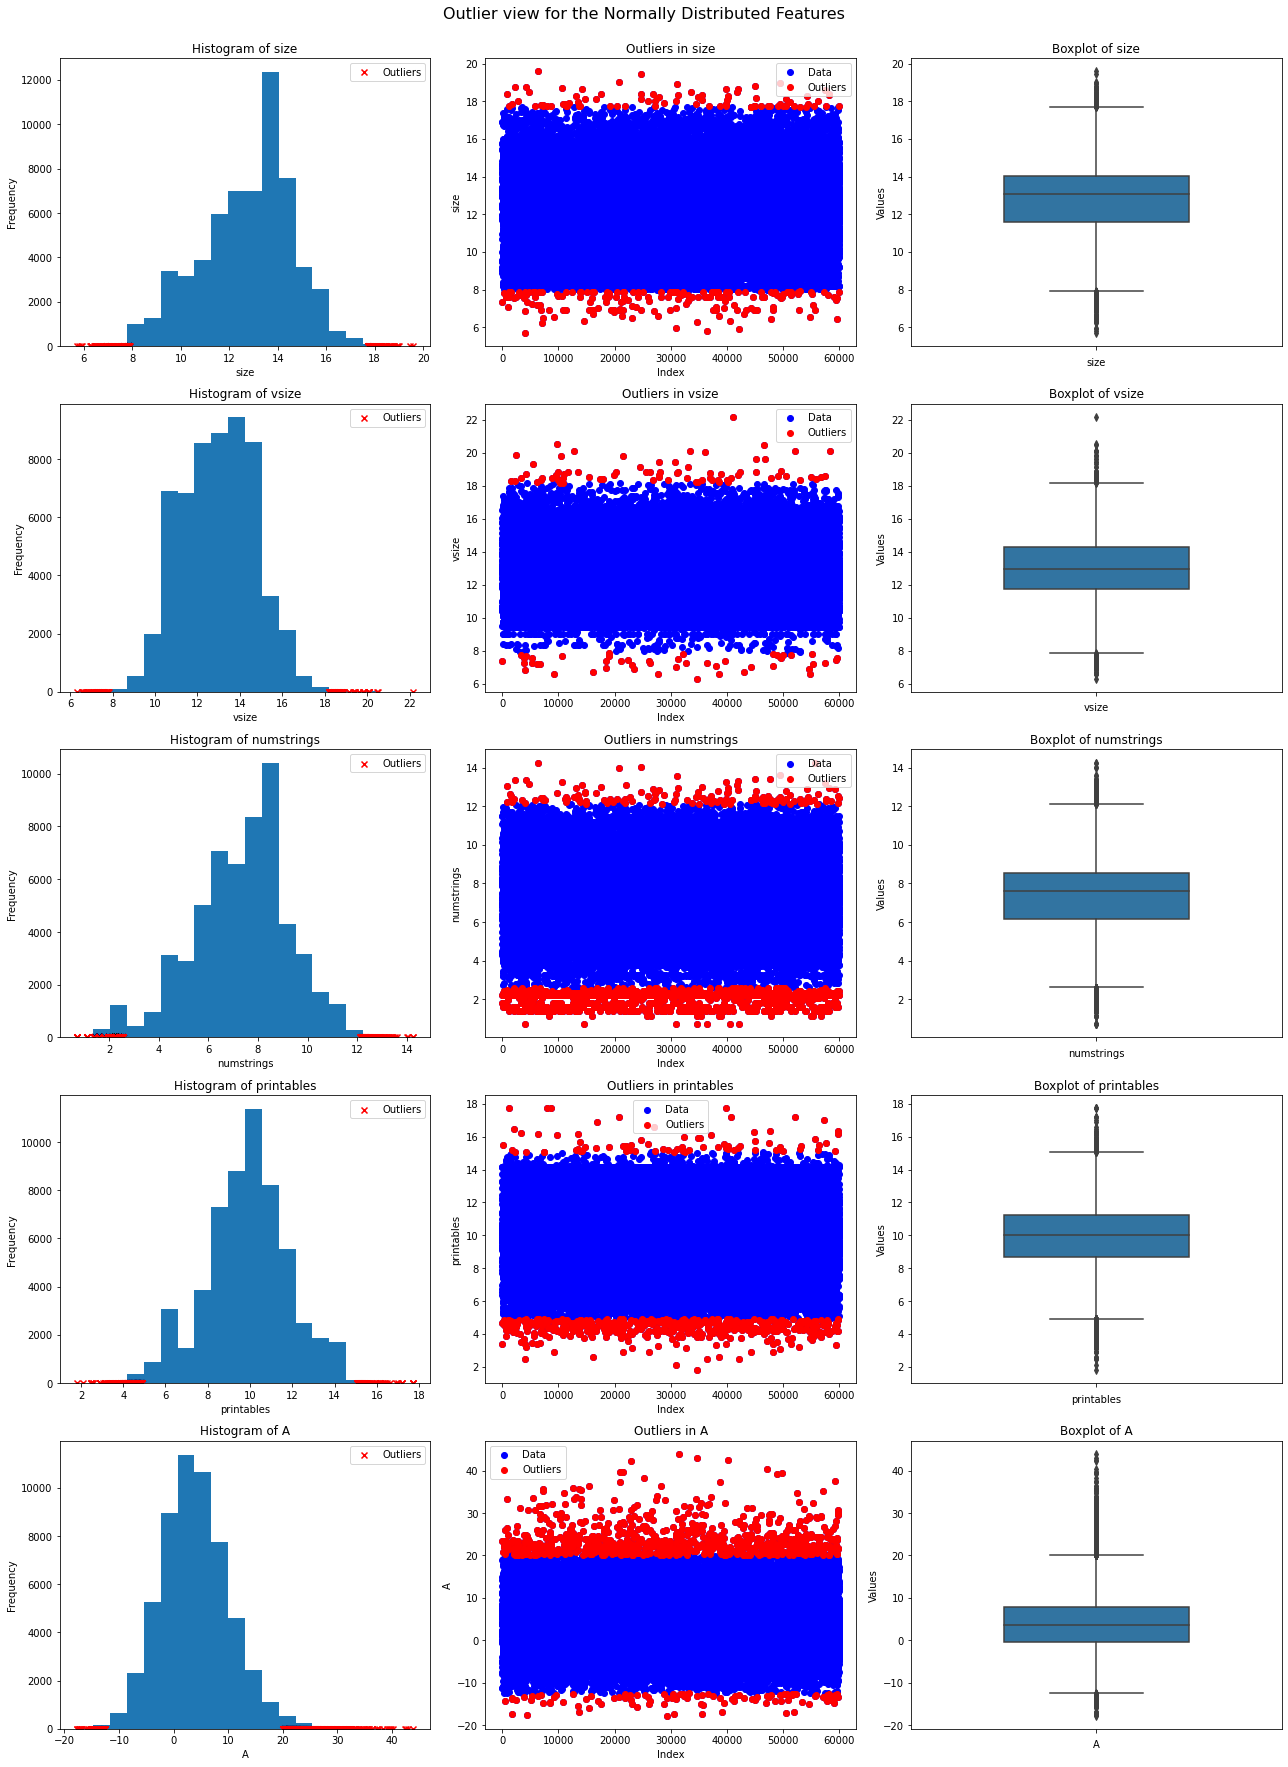

In [38]:
IQR_train_data = pd.concat([log_train_data, train_data['A']], axis=1)
plot_normal_dist_outliers(IQR_train_data)

In the preprocessing section we will handle these as decided.

Not forgetting about the other non-normally distributed, we will handle their outliers using Isolation Forest algorithm in the preprocessing section as well.

## Part 2 - Preprocessing 

Loading and creating the needed data for this section:

From this part we split out dataset to train and validation (test_data) and preprocess accordingly.

In [39]:
full_data_copy = full_data.copy()

labels = full_data_copy['label']
data = full_data_copy.drop('label', axis=1)

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state = 41, shuffle = True)

train_data_ppc = train_data.copy()
train_lables_ppc = train_labels.copy()

test_data_ppc = test_data.copy()
test_labels_ppc = test_labels.copy()

### Handling Missing Values

At first, let's see how many missing values are at each feature:

In [40]:
missing_values = train_data.isnull().sum()
print(missing_values)

sha256                    0
size                      0
vsize                  1551
imports                1381
exports                1658
has_debug              2346
has_relocations        2634
has_resources          1565
has_signature          1567
has_tls                2338
symbols                2091
numstrings             2202
paths                  2906
urls                   1876
registry               2019
MZ                     2446
printables             2214
avlength               2170
file_type_trid            0
file_type_prob_trid       0
A                      3004
B                      3004
C                      1648
dtype: int64


Notice 'size' already has no missing values. We will mention this detail again below.

To handle missing data, we will use the following approaches:

- <u>Median Imputation:</u> Replace missing values with the median value of the respective column. Median imputation is useful when the data is skewed or contains outliers, as it is less sensitive to extreme values. 

- <u>Mode Imputation:</u> Replace missing values with the mode (most frequent value) of the respective column. Mode imputation is suitable for categorical features where missing values can be replaced with the most common category. 

- <u>Correlation Between Features:</u> By leveraging the correlations between features, we can estimate and fill in missing values based on the values of correlated features in the same row. 

<b>First Approach: Using correlation </b><br>
Following the conclusions we drew from looking at the correlation between the features, including the correlation matrix, we saw that there are 3 highly correlated features: 'size', 'numstrings' and 'MZ'.

In a case where one of these feature cells is empty in one of the rows, we will use the values found in the correlated features in that row and fill in the missing value by multiplying the corresponding correlation value.<br>

For example: 
The correlation index using the corr matrix between 'size' and 'numstrings' is 0.9 and 'numstrings''s cell is null.<br>
the null 'numstrings''s cell = 0.9 * 'size' value at the same line.<br>
Here is how we do it:

In [41]:
def fill_corr_missing_values(data, corr_matrix):
    
    # Iterate over the columns with missing values
    for column in data.columns[data.isnull().any()]:
        if column == 'size':
            correlated_features = [('numstrings', corr_matrix.loc['size', 'numstrings']),
                                   ('MZ', corr_matrix.loc['size', 'MZ'])]
        elif column == 'numstrings':
            correlated_features = [('size', corr_matrix.loc['size', 'numstrings']),
                                   ('MZ', corr_matrix.loc['numstrings', 'MZ'])]
        elif column == 'MZ':
            correlated_features = [('size', corr_matrix.loc['size', 'MZ']),
                                   ('numstrings', corr_matrix.loc['numstrings', 'MZ'])]
        else:
            correlated_features = []

        if correlated_features:
            # Iterate over the rows with null values in the current column
            for index, row in data[data[column].isnull()].iterrows():
                for feature, correlation_value in correlated_features:
                    if not pd.isnull(row[feature]):
                        expected_value = correlation_value * row[feature]
                        data.loc[index, column] = expected_value
                        break

    return data

def handle_corr_missing_values(train_data, test_data):
    # Calculate correlation matrix
    corr_matrix = train_data[['size', 'numstrings', 'MZ']].corr()
    train_data = fill_corr_missing_values(train_data, corr_matrix)
    test_data = fill_corr_missing_values(test_data, corr_matrix)

    return train_data, test_data

In [42]:
train_data, test_data = handle_corr_missing_values(train_data, test_data)

Let's see what has changed.<br><br>

<u>Number of missing cells in each feature column:</u>

In [43]:
missing_values = train_data.isnull().sum()
print(missing_values)

sha256                    0
size                      0
vsize                  1551
imports                1381
exports                1658
has_debug              2346
has_relocations        2634
has_resources          1565
has_signature          1567
has_tls                2338
symbols                2091
numstrings                0
paths                  2906
urls                   1876
registry               2019
MZ                        0
printables             2214
avlength               2170
file_type_trid            0
file_type_prob_trid       0
A                      3004
B                      3004
C                      1648
dtype: int64


As seen before, 'size' already had no missing values.
And now 'MZ' and 'numstrings' features also have no missing values, which means that all the three features have no missing values at the same row.

Nevertheless, we will still deal with it in the second approach below.

<b>Second approach: Median and Mode reputation.</b><br>
To handle the rest of the features we will deal in the following way:
- Numerical features - fill using median.
- Boolean and Categorial features - fill  using majority calculation.

In [44]:
def calc_median_value(df, numeric_features):
    medians = {}
    for column in numeric_features:
        median_value = df[column].median()
        medians[column] = median_value
    return medians

def calc_majority(df, features):
    majority_values = {}
    for feature in features:
        mode_value = df[feature].value_counts().idxmax()
        majority_values[feature] = mode_value
    return majority_values


def fill_rest_missing_values(data, columns_to_impute, medians, majority_values):

    for column in columns_to_impute:
        if data[column].dtype == 'object':  # Categorical column
            data[column].fillna(majority_values[column], inplace=True)
        elif data[column].dtype in ['float64', 'int64']:  # Float64 and Int64 column
            data[column].fillna(medians[column], inplace=True)

    return data

def handle_rest_missing_values(train_data, test_data):
    numeric_features = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    category_features = train_data.select_dtypes(include=['object']).columns.tolist()

    medians = calc_median_value(train_data, numeric_features)
    majority_values = calc_majority(train_data, category_features)

    # columns_to_impute = ['size', 'vsize', 'imports', 'exports', 'has_debug', 'has_tls', 'has_resources', 'has_relocations', 'has_signature', 'symbols', 'numstrings', 'avlength', 'printables', 'paths', 'urls', 'registry', 'MZ', 'file_type_trid', 'file_type_prob_trid', 'A', 'B', 'C']
    columns_to_impute_train = train_data.columns
    columns_to_impute_test = test_data.columns
    train_data = fill_rest_missing_values(train_data, columns_to_impute_train, medians, majority_values)
    test_data = fill_rest_missing_values(test_data, columns_to_impute_test, medians, majority_values)

    return train_data, test_data

Let's look at the median values before changing:

In [45]:
train_data.median()

size                   490321.000000
vsize                  430080.000000
imports                    28.000000
exports                     0.000000
has_debug                   0.000000
has_relocations             1.000000
has_resources               1.000000
has_signature               0.000000
has_tls                     0.000000
symbols                     0.000000
numstrings               2332.000000
paths                       0.000000
urls                        0.000000
registry                    0.000000
MZ                          4.000000
printables              22870.500000
avlength                   11.997463
file_type_prob_trid        43.300000
A                           3.628090
B                           5.860208
dtype: float64

In [46]:
train_data, test_data = handle_rest_missing_values(train_data, test_data)

Let's see what has changed:

In [47]:
train_data.median()

size                   490321.000000
vsize                  430080.000000
imports                    28.000000
exports                     0.000000
has_debug                   0.000000
has_relocations             1.000000
has_resources               1.000000
has_signature               0.000000
has_tls                     0.000000
symbols                     0.000000
numstrings               2332.000000
paths                       0.000000
urls                        0.000000
registry                    0.000000
MZ                          4.000000
printables              22870.500000
avlength                   11.997463
file_type_prob_trid        43.300000
A                           3.628090
B                           5.860208
dtype: float64

We can see that the median did not change as expected!

Last check to see that all the missing values were filled:

In [48]:
missing_values = train_data.isnull().sum()
print(missing_values)

sha256                 0
size                   0
vsize                  0
imports                0
exports                0
has_debug              0
has_relocations        0
has_resources          0
has_signature          0
has_tls                0
symbols                0
numstrings             0
paths                  0
urls                   0
registry               0
MZ                     0
printables             0
avlength               0
file_type_trid         0
file_type_prob_trid    0
A                      0
B                      0
C                      0
dtype: int64


Great! There are no more missing values in the dataset.

As we can see, we figured a way to deal with all missing values.

Finally, we will build the final function to run both of the approaches in the preprocess:

In [49]:
def handle_missing_values(train_data, test_data):
    train_data, test_data = handle_corr_missing_values(train_data, test_data)
    train_data, test_data = handle_rest_missing_values(train_data, test_data)
    return train_data, test_data

#### Adding New Feature


<b>We thought of creating a new feature using Proportion.</b><br>
<b>The new feature calculates the proportion of imported functions (imports) to the total number of functions (imports + exports).</b> <br>
By considering the proportion of imported functions in relation to the total number of functions, we are specifically looking at the functional behavior of the files. This is important because the behavior and functionality of a file can provide valuable insights in distinguishing between malicious and benign files. <br>
Moreover, by calculating the proportion of imported functions, we are capturing the extent to which a file relies on external functionality. 
<br><b>Based on all the above and what we understood before when explored the data, the new proportion feature can help in identifying files that heavily depend on external functions, which could be indicative of malicious behavior.<b>

In [50]:
def adding_new_feature(data):
    # Calculate the total number of functions (imports + exports)
    total_functions = data['imports'] + data['exports']

    # Calculate the proportion of imported functions, handling the case when total_functions is zero
    proportion_imports = data['imports'] / np.where(total_functions == 0, 1, total_functions)

    # Create a new column for the proportion of imported functions
    data['proportion_imports'] = proportion_imports

    return data

In [51]:
train_data = adding_new_feature(train_data)
test_data = adding_new_feature(test_data)

Let's see that the feature was added and calculated correctly:

In [52]:
train_data.head()

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C,proportion_imports
44550,300c18fd9254bedd239ba61a3919c02932d3877bf874ea...,792776,786432.0,183.0,3.0,1.0,1.0,1.0,1.0,1.0,...,0.0,6.0,48301.0,16.484983,Win64 Executable (generic),72.3,4.096169,5.928450,cs,0.983871
58,017e5c90f2bdf262d14500a7f9501c1999f81adc8693f5...,25296,32768.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,2.0,7873.0,26.156146,Win32 Dynamic Link Library (generic),38.4,-5.326607,5.255140,vh,1.000000
14191,8a1355d1f00dc6a020e57bad5e15d78b6fd4f892607b2f...,485376,507904.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,4.0,34496.0,11.919834,"Generic CIL Executable (.NET, Mono, etc.)",72.5,6.731641,5.374366,mc,1.000000
19414,e3421c88d355a4372911b217684a5eb4be28e43d4eede3...,4379648,10735616.0,11.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,57.0,140118.0,5.855328,UPX compressed Win32 Executable,63.4,4.656299,6.541647,cs,1.000000
32209,46d3335fdd87b899753342db14461b89c295f10253f58a...,4149248,10223616.0,11.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,55.0,127475.0,5.871718,UPX compressed Win32 Executable,39.0,3.628090,6.538908,er,1.000000


In [53]:
test_data.head()

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C,proportion_imports
41457,858ddb55d10a323483b8f131b26b6fe953a4b587275beb...,524288,1048576.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,375613.183505,22870.5,5.978873,Win32 Executable (generic),35.7,1.495803,4.945899,er,0.0
39842,3acf7ffeef7375250a2cdb018e9555e406d3cf3338bfcb...,5120,430080.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,678.0,11.997463,Win64 Executable (generic),28.0,3.182780,5.896053,vh,1.0
22976,f94aefc1abcdd00fcd0c5ec10cf8bee0f1ff47ab0a96fd...,36520,49152.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.000000,7067.0,16.628235,Win64 Executable (generic),38.0,8.403226,5.713575,gow,1.0
15832,fb191905daadcc43d3cda0f9d4135b722e0b0b5524e6b0...,3079168,3096576.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,25.000000,280616.0,16.108840,"Generic CIL Executable (.NET, Mono, etc.)",55.0,-0.715610,5.879106,bf,1.0
50273,c16e063685ac4bc7a7c7f8e3674e660c9199e213dfe534...,524684,614400.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.000000,21017.0,11.167375,InstallShield setup,36.1,5.745043,5.782430,cs,1.0


Great! we can move to handle categorial features.

### Handling Categorial Features

To handle categorial features we decided to apply One-Hot Encoding techninque for several reasons:<br>

- <u>Numerical Representation:</u> using this method we can remove textual features and allow ML algorithms access all the information provided in these features.

- <u>Preserving Distinctness:</u> it preserves the distinctness of each category and prevents the algorithm from assuming any ordinal relationship between categories.

- <u>Avoiding Bias:</u> it avoids introducing bias by assigning arbitrary numerical values to categories. Each category is represented by its own binary feature, ensuring equal importance and avoiding misleading interpretations based on numerical values.


Before applying One-Hot Encoding, we will look at the feature types:

In [54]:
# Set display options to print all columns and rows without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(train_data.dtypes)

sha256                  object
size                     int64
vsize                  float64
imports                float64
exports                float64
has_debug              float64
has_relocations        float64
has_resources          float64
has_signature          float64
has_tls                float64
symbols                float64
numstrings             float64
paths                  float64
urls                   float64
registry               float64
MZ                     float64
printables             float64
avlength               float64
file_type_trid          object
file_type_prob_trid    float64
A                      float64
B                      float64
C                       object
proportion_imports     float64
dtype: object


Let's see which categories 'file_type_trid' has:

In [55]:
categories = train_data['file_type_trid'].value_counts()
print(f"Categories in column 'file_type_trid':")
display(categories)

Categories in column 'file_type_trid':


Win64 Executable (generic)                                   8028
Win32 Executable MS Visual C++ (generic)                     7182
Win32 Executable (generic)                                   7062
Win32 Dynamic Link Library (generic)                         3213
Generic CIL Executable (.NET, Mono, etc.)                    3007
Windows Control Panel Item (generic)                         2550
InstallShield setup                                          1790
UPX compressed Win32 Executable                              1750
Win32 Executable Microsoft Visual Basic 6                    1358
DOS Executable Generic                                       1352
OS/2 Executable (generic)                                     944
Win32 EXE PECompact compressed (generic)                      925
Generic .NET DLL/Assembly                                     908
WinRAR Self Extracting archive (4.x-5.x)                      895
NSIS - Nullsoft Scriptable Install System                     818
Microsoft 

There are a lot of different categories.<br>
To better analyze the data, we decided that all the categories in 'file_type_trid' feature that are in less than 1 percent of the files will be classified as "other" category.

In [56]:
def reducing_category_types(data):
    threshold = 0.01  # Set the threshold to 1% of the observations

    # Calculate the value counts of each category
    category_counts = data['file_type_trid'].value_counts(normalize=True)

    # Identify the categories that appear in less than the threshold
    categories_to_change = category_counts[category_counts < threshold].index.tolist()

    # Replace the categories with 'other'
    data.loc[data['file_type_trid'].isin(categories_to_change), 'file_type_trid'] = 'other'

    # Get the remaining categories in the data
    remaining_categories = data['file_type_trid'].unique().tolist()

    return data, remaining_categories


Applying the 'file_type_trid' feature in the test data to has the same categories:

In [57]:
def apply_remaining_categories_for_test(data, remaining_categories):
    
    # Replace categories not in remaining_categories with 'other'
    data.loc[~data['file_type_trid'].isin(remaining_categories), 'file_type_trid'] = 'other'

    return data

In [58]:
train_data, remaining_categories = reducing_category_types(train_data)

Checking that there are still no null values in data:

In [59]:
train_data.isna().sum()

sha256                 0
size                   0
vsize                  0
imports                0
exports                0
has_debug              0
has_relocations        0
has_resources          0
has_signature          0
has_tls                0
symbols                0
numstrings             0
paths                  0
urls                   0
registry               0
MZ                     0
printables             0
avlength               0
file_type_trid         0
file_type_prob_trid    0
A                      0
B                      0
C                      0
proportion_imports     0
dtype: int64

Now we can move on to applying One-Hot Encoding on features 'file_type_trid' and 'C':

In [60]:
def categorical_variables_spread(data):

    categorical_columns = ['file_type_trid', 'C']

    # Create an instance of OneHotEncoder
    encoder = OneHotEncoder(sparse=False)

    # Fit and transform the selected columns
    encoded_columns = encoder.fit_transform(data[categorical_columns])

    # Create custom feature names for the encoded columns
    feature_names = []
    for i, column in enumerate(categorical_columns):
        for feature in encoder.categories_[i]:
            feature_names.append(f'{column}_{feature}')

    # Create a DataFrame with the encoded columns and custom feature names
    encoded_data = pd.DataFrame(encoded_columns, columns=feature_names)
    # print(encoded_data.shape)

    data_reset = data.reset_index(drop=True)
    encoded_data_reset = encoded_data.reset_index(drop=True)

    # Concatenate the encoded columns with the original DataFrame
    data_encoded = pd.concat([data_reset, encoded_data_reset], axis=1)

    data = data_encoded

    data.drop(columns=categorical_columns, inplace=True)

    return data

In [61]:
def print_file_type_category_occurences(data, categories):

    categories = train_data['file_type_trid'].value_counts()
    other_count = categories.pop('other')
    categories['other'] = other_count

    print("Categories in column 'file_type_trid' for train:")
    for category, count in categories.items():
        if category == 'other':
            print(f"\033[1m{category}: {count}\033[0m")
        else:
            print(f"{category}: {count}")

In [62]:
print_file_type_category_occurences(test_data, remaining_categories)

Categories in column 'file_type_trid' for train:
Win64 Executable (generic): 8028
Win32 Executable MS Visual C++ (generic): 7182
Win32 Executable (generic): 7062
Win32 Dynamic Link Library (generic): 3213
Generic CIL Executable (.NET, Mono, etc.): 3007
Windows Control Panel Item (generic): 2550
InstallShield setup: 1790
UPX compressed Win32 Executable: 1750
Win32 Executable Microsoft Visual Basic 6: 1358
DOS Executable Generic: 1352
OS/2 Executable (generic): 944
Win32 EXE PECompact compressed (generic): 925
Generic .NET DLL/Assembly: 908
WinRAR Self Extracting archive (4.x-5.x): 895
NSIS - Nullsoft Scriptable Install System: 818
Microsoft Visual C++ compiled executable (generic): 798
Win32 Executable Delphi generic: 710
Inno Setup installer: 649
Win16 NE executable (generic): 630
Windows ActiveX control: 548
other: 2883


Applying both of the decisions together in one function:

In [63]:
def handle_categorial_features(train_data, test_data):
    
    train_data, remaining_categories = reducing_category_types(train_data)
    test_data = apply_remaining_categories_for_test(test_data, remaining_categories)
    
    train_data = categorical_variables_spread(train_data)
    test_data = categorical_variables_spread(test_data)
    
    return train_data, test_data

In [64]:
train_data, test_data = handle_categorial_features(train_data, test_data)

Visual checks to see that everything is as we wanted:

In [65]:
print(train_data.shape)

(48000, 50)


In [66]:
print(test_data.shape)

(12000, 50)


In [67]:
train_data.head()

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,paths,urls,registry,MZ,printables,avlength,file_type_prob_trid,A,B,proportion_imports,file_type_trid_DOS Executable Generic,file_type_trid_Generic .NET DLL/Assembly,"file_type_trid_Generic CIL Executable (.NET, Mono, etc.)",file_type_trid_Inno Setup installer,file_type_trid_InstallShield setup,file_type_trid_Microsoft Visual C++ compiled executable (generic),file_type_trid_NSIS - Nullsoft Scriptable Install System,file_type_trid_OS/2 Executable (generic),file_type_trid_UPX compressed Win32 Executable,file_type_trid_Win16 NE executable (generic),file_type_trid_Win32 Dynamic Link Library (generic),file_type_trid_Win32 EXE PECompact compressed (generic),file_type_trid_Win32 Executable (generic),file_type_trid_Win32 Executable Delphi generic,file_type_trid_Win32 Executable MS Visual C++ (generic),file_type_trid_Win32 Executable Microsoft Visual Basic 6,file_type_trid_Win64 Executable (generic),file_type_trid_WinRAR Self Extracting archive (4.x-5.x),file_type_trid_Windows ActiveX control,file_type_trid_Windows Control Panel Item (generic),file_type_trid_other,C_bf,C_cs,C_er,C_gow,C_mc,C_vh,C_vr
0,300c18fd9254bedd239ba61a3919c02932d3877bf874ea...,792776,786432.0,183.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,2930.0,3.0,35.0,0.0,6.0,48301.0,16.484983,72.3,4.096169,5.928450,0.983871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,017e5c90f2bdf262d14500a7f9501c1999f81adc8693f5...,25296,32768.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,301.0,3.0,20.0,0.0,2.0,7873.0,26.156146,38.4,-5.326607,5.255140,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8a1355d1f00dc6a020e57bad5e15d78b6fd4f892607b2f...,485376,507904.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2894.0,1.0,2.0,0.0,4.0,34496.0,11.919834,72.5,6.731641,5.374366,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,e3421c88d355a4372911b217684a5eb4be28e43d4eede3...,4379648,10735616.0,11.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,23930.0,2.0,0.0,0.0,57.0,140118.0,5.855328,63.4,4.656299,6.541647,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46d3335fdd87b899753342db14461b89c295f10253f58a...,4149248,10223616.0,11.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,21710.0,1.0,0.0,0.0,55.0,127475.0,5.871718,39.0,3.628090,6.538908,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [68]:
test_data.head()

,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,paths,urls,registry,MZ,printables,avlength,file_type_prob_trid,A,B,proportion_imports,file_type_trid_DOS Executable Generic,file_type_trid_Generic .NET DLL/Assembly,"file_type_trid_Generic CIL Executable (.NET, Mono, etc.)",file_type_trid_Inno Setup installer,file_type_trid_InstallShield setup,file_type_trid_Microsoft Visual C++ compiled executable (generic),file_type_trid_NSIS - Nullsoft Scriptable Install System,file_type_trid_OS/2 Executable (generic),file_type_trid_UPX compressed Win32 Executable,file_type_trid_Win16 NE executable (generic),file_type_trid_Win32 Dynamic Link Library (generic),file_type_trid_Win32 EXE PECompact compressed (generic),file_type_trid_Win32 Executable (generic),file_type_trid_Win32 Executable Delphi generic,file_type_trid_Win32 Executable MS Visual C++ (generic),file_type_trid_Win32 Executable Microsoft Visual Basic 6,file_type_trid_Win64 Executable (generic),file_type_trid_WinRAR Self Extracting archive (4.x-5.x),file_type_trid_Windows ActiveX control,file_type_trid_Windows Control Panel Item (generic),file_type_trid_other,C_bf,C_cs,C_er,C_gow,C_mc,C_vh,C_vr
0,858ddb55d10a323483b8f131b26b6fe953a4b587275beb...,524288,1048576.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,0.0,0.0,0.0,375613.183505,22870.5,5.978873,35.7,1.495803,4.945899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3acf7ffeef7375250a2cdb018e9555e406d3cf3338bfcb...,5120,430080.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,1.000000,678.0,11.997463,28.0,3.182780,5.896053,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,f94aefc1abcdd00fcd0c5ec10cf8bee0f1ff47ab0a96fd...,36520,49152.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,425.0,2.0,20.0,0.0,1.000000,7067.0,16.628235,38.0,8.403226,5.713575,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,fb191905daadcc43d3cda0f9d4135b722e0b0b5524e6b0...,3079168,3096576.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,17420.0,0.0,25.0,0.0,25.000000,280616.0,16.108840,55.0,-0.715610,5.879106,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,c16e063685ac4bc7a7c7f8e3674e660c9199e213dfe534...,524684,614400.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1882.0,0.0,0.0,0.0,3.000000,21017.0,11.167375,36.1,5.745043,5.782430,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [69]:
null_df = calculate_null_percentage(train_data)
null_df

,Feature,Null%
0,sha256,0.0
1,size,0.0
2,vsize,0.0
3,imports,0.0
4,exports,0.0
5,has_debug,0.0
6,has_relocations,0.0
7,has_resources,0.0
8,has_signature,0.0
9,has_tls,0.0


### Handling Outliers

##### `Are there outliers?`
As discussed above, we saw that there are several features that are normally distributed and some that do not.
Therfore, we will handle these as follows:

- On the <u>Normally distributed</u> we will apply LOG function, hence, we are lowering the outlier effect. <br>
After that, in case there are some outliers left, we will use the IQR method to indentify them and replace them with the bound they are close to (Upper of Lower).

- On the <u>Non-normally distributed features</u> we will apply an Isolation Forest algorithm by learning on all these features and creating a decision whether a file is labeled as outlier or not. If it does, we will remove it.


<u>Normally Distributed Features:</u>

Firstly, lets apply log function on the normally distributed features as decided - 'size', 'vsize', 'numstrings' and 'printables':

In [70]:
def apply_log(data, log_features):
    data[log_features] = np.log(data[log_features])
    return data

Create the function that will handle the Normally Distributed features:

In [71]:
def handle_ND_outliers_train(data):
    log_features = ['size', 'vsize', 'numstrings', 'printables']
    data = apply_log(data, log_features)

    normal_features = ['size', 'vsize', 'numstrings', 'printables', 'A'] 
    bounds = {}
    
    for feature in normal_features:
        lower_bound, upper_bound = identify_bounds(data, feature)
        
        data[feature] = np.where(data[feature] < lower_bound, lower_bound, data[feature])
        data[feature] = np.where(data[feature] > upper_bound, upper_bound, data[feature])
        
        bounds[feature] = (lower_bound, upper_bound)

    return data, bounds

Based on the bounds we learned in the training data, change the outliers to be the bounds:

In [72]:
def handle_ND_outliers_test(data, feature_bounds):

    log_features = ['size', 'vsize', 'numstrings', 'printables']
    data = apply_log(data, log_features)

    for feature, (lower_bound, upper_bound) in feature_bounds.items():
        data[feature] = np.where(data[feature] < lower_bound, lower_bound, data[feature])
        data[feature] = np.where(data[feature] > upper_bound, upper_bound, data[feature])

    return data

<u>Non-Normally Distributed Features:</u><br>
After looking at the histograms we saw that from the non-normally distributed features, 'B' and 'file_type_prob_trid' already look like they dont have much outliers.<br>
Hence we will remove the outliers only from:<br>
['imports', 'exports', 'symbols', 'paths', 'urls', 'registry', 'MZ', 'avlength', 'proportion_imports']

For this task, we decided to use Isolation Forest algorithm. <br>
This algorithm trains and learns the bounds of each feature and then can be applied on every chosen dataset. 
Since we want the train data to have the same charactaristics as the test model, we preffered to classify small amount of data as outliers.
Also, by doing so, we reduce the chances to overfitting, because the model trains on data that is pretty simillar to the tested one.
Therefore we chose the threshold and contamination hyperparameter to be both 0.01.

Create the function to handle the non-normally distributed features in the training data:

In [73]:
def handle_NND_outliers_train(data, labels, threshold, contamination):
    
    # Initialize the Isolation Forest model
    model = IsolationForest(contamination=contamination) 

    non_norm_dist_features = ['imports', 'exports', 'symbols', 'paths', 'urls', 'registry', 'MZ', 'avlength', 'proportion_imports']
    data_selected = data[non_norm_dist_features].copy()

    model.fit(data_selected)

    outlier_scores = model.decision_function(data_selected)
    outlier_indices = np.where(outlier_scores < threshold)[0]

    data.reset_index(drop=True, inplace=True)
    labels.reset_index(drop=True, inplace=True)
    
    # Remove the outlier indices from the data
    data = data.drop(outlier_indices)
    labels = labels.drop(outlier_indices)

    return data, labels

Binding both of the decisions together:

In [74]:
def handle_outliers(train_data, train_labels, test_data):

    train_data, bounds = handle_ND_outliers_train(train_data)
    test_data = handle_ND_outliers_test(test_data, bounds)

    contamination = 0.001
    threshold = 0.001
    train_data, train_labels = handle_NND_outliers_train(train_data, train_labels, threshold, contamination)

    return train_data, train_labels, test_data

Before applying the changes, let's see the inital state:

In [75]:
train_data.describe()

,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,paths,urls,registry,MZ,printables,avlength,file_type_prob_trid,A,B,proportion_imports,file_type_trid_DOS Executable Generic,file_type_trid_Generic .NET DLL/Assembly,"file_type_trid_Generic CIL Executable (.NET, Mono, etc.)",file_type_trid_Inno Setup installer,file_type_trid_InstallShield setup,file_type_trid_Microsoft Visual C++ compiled executable (generic),file_type_trid_NSIS - Nullsoft Scriptable Install System,file_type_trid_OS/2 Executable (generic),file_type_trid_UPX compressed Win32 Executable,file_type_trid_Win16 NE executable (generic),file_type_trid_Win32 Dynamic Link Library (generic),file_type_trid_Win32 EXE PECompact compressed (generic),file_type_trid_Win32 Executable (generic),file_type_trid_Win32 Executable Delphi generic,file_type_trid_Win32 Executable MS Visual C++ (generic),file_type_trid_Win32 Executable Microsoft Visual Basic 6,file_type_trid_Win64 Executable (generic),file_type_trid_WinRAR Self Extracting archive (4.x-5.x),file_type_trid_Windows ActiveX control,file_type_trid_Windows Control Panel Item (generic),file_type_trid_other,C_bf,C_cs,C_er,C_gow,C_mc,C_vh,C_vr
count,4.800000e+04,4.800000e+04,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,4.800000e+04,48000.000000,48000.000000,48000.000000,4.800000e+04,4.800000e+04,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000
mean,1.507466e+06,1.947217e+06,103.548604,29.585854,0.382812,0.567333,0.865333,0.244562,0.222521,41.366458,6.475223e+04,1.525937,12.022417,0.437292,5.192150e+04,1.170257e+05,31.685680,53.606810,3.966154,5.814347,0.869071,0.028167,0.018917,0.062646,0.013521,0.037292,0.016625,0.017042,0.019667,0.036458,0.013125,0.066937,0.019271,0.147125,0.014792,0.149625,0.028292,0.167250,0.018646,0.011417,0.053125,0.060062,0.095937,0.100354,0.191271,0.094812,0.086396,0.421187,0.010042
std,4.768730e+06,2.177434e+07,207.248695,505.146781,0.486078,0.495451,0.341371,0.429832,0.415943,1308.142552,7.568915e+05,30.457441,68.355619,12.528962,6.900522e+05,5.997290e+05,1061.364719,20.600659,6.156003,0.623071,0.320925,0.165451,0.136232,0.242327,0.115492,0.189478,0.127863,0.129428,0.138853,0.187430,0.113811,0.249916,0.137477,0.354234,0.120719,0.356707,0.165807,0.373203,0.135272,0.106238,0.224285,0.237605,0.294509,0.300475,0.393306,0.292959,0.280951,0.493755,0.099705
min,2.980000e+02,5.440000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,5.000000e+00,5.000000,17.500000,-17.783199,0.004929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.094120e+05,1.310720e+05,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.010000e+02,0.000000,0.000000,0.000000,2.000000e+00,6.668750e+03,7.447368,38.400000,-0.014098,5.508307,0.998656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.903210e+05,4.300800e+05,28.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.332000e+03,0.000000,0.000000,0.000000,4.000000e+00,2.287050e+04,11.997463,43.300000,3.628090,5.860208,1.000000,0.000000,0.000000,0.000000,0.000000,0.

In [76]:
test_data.describe()

,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,paths,urls,registry,MZ,printables,avlength,file_type_prob_trid,A,B,proportion_imports,file_type_trid_DOS Executable Generic,file_type_trid_Generic .NET DLL/Assembly,"file_type_trid_Generic CIL Executable (.NET, Mono, etc.)",file_type_trid_Inno Setup installer,file_type_trid_InstallShield setup,file_type_trid_Microsoft Visual C++ compiled executable (generic),file_type_trid_NSIS - Nullsoft Scriptable Install System,file_type_trid_OS/2 Executable (generic),file_type_trid_UPX compressed Win32 Executable,file_type_trid_Win16 NE executable (generic),file_type_trid_Win32 Dynamic Link Library (generic),file_type_trid_Win32 EXE PECompact compressed (generic),file_type_trid_Win32 Executable (generic),file_type_trid_Win32 Executable Delphi generic,file_type_trid_Win32 Executable MS Visual C++ (generic),file_type_trid_Win32 Executable Microsoft Visual Basic 6,file_type_trid_Win64 Executable (generic),file_type_trid_WinRAR Self Extracting archive (4.x-5.x),file_type_trid_Windows ActiveX control,file_type_trid_Windows Control Panel Item (generic),file_type_trid_other,C_bf,C_cs,C_er,C_gow,C_mc,C_vh,C_vr
count,1.200000e+04,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000,1.200000e+04,1.200000e+04,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,1.475231e+06,1.792033e+06,105.452083,30.300333,0.389083,0.572583,0.863750,0.251667,0.224333,26.505000,7.216480e+04,1.618583,11.969667,0.306917,6.182124e+04,1.134066e+05,31.802958,53.96650,4.092851,5.809996,0.871399,0.031000,0.02025,0.066417,0.014000,0.035583,0.016167,0.01825,0.019083,0.037750,0.01200,0.066417,0.019583,0.143250,0.014500,0.148750,0.025917,0.171417,0.017667,0.011583,0.054833,0.055583,0.098583,0.094250,0.199500,0.091917,0.084083,0.421667,0.010000
std,4.558386e+06,8.610310e+06,224.187828,474.535614,0.487563,0.494724,0.343068,0.433989,0.417160,706.693534,1.217335e+06,52.144930,77.401497,2.281078,7.431399e+05,5.579026e+05,1100.379858,20.75764,6.222111,0.612448,0.319160,0.173325,0.14086,0.249019,0.117495,0.185257,0.126121,0.13386,0.136824,0.190599,0.10889,0.249019,0.138569,0.350342,0.119545,0.355857,0.158893,0.376888,0.131742,0.107005,0.227664,0.229125,0.298114,0.292188,0.399641,0.288920,0.277524,0.493846,0.099503
min,3.240000e+02,1.404000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,7.000000e+00,5.232975,18.10000,-16.859977,0.225373,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.024000e+05,1.228800e+05,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.750000e+02,0.000000,0.000000,0.000000,1.000000e+00,6.170500e+03,7.447368,38.40000,0.045517,5.495074,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.560290e+05,4.300800e+05,28.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.204500e+03,0.000000,0.000000,0.000000,4.000000e+00,2.287050e+04,11.997463,43.30000,3.628090,5.860208,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0

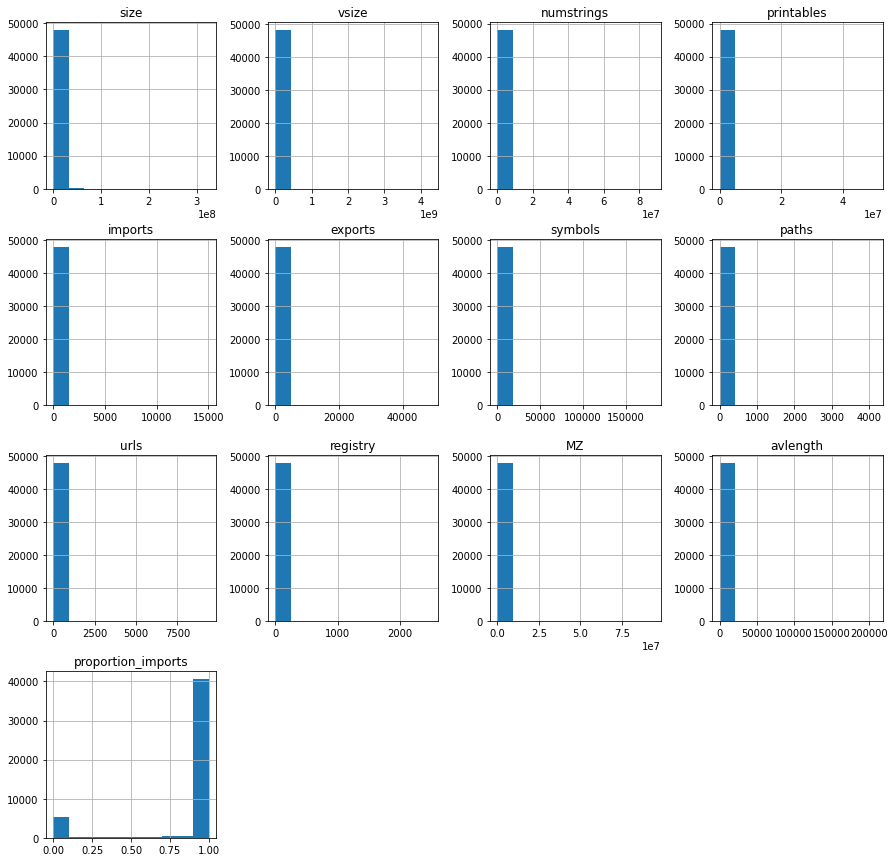

In [77]:
selected_features = ['size', 'vsize', 'numstrings', 'printables', 'imports', 'exports', 'symbols', 'paths', 'urls', 'registry', 'MZ', 'avlength', 'proportion_imports']
df = train_data[selected_features]
df.hist(figsize=(15, 15))
plt.show()

Let's see how what outliers will be removed in the normally distributed features: (using the plotting function we created in the visualizations stage)

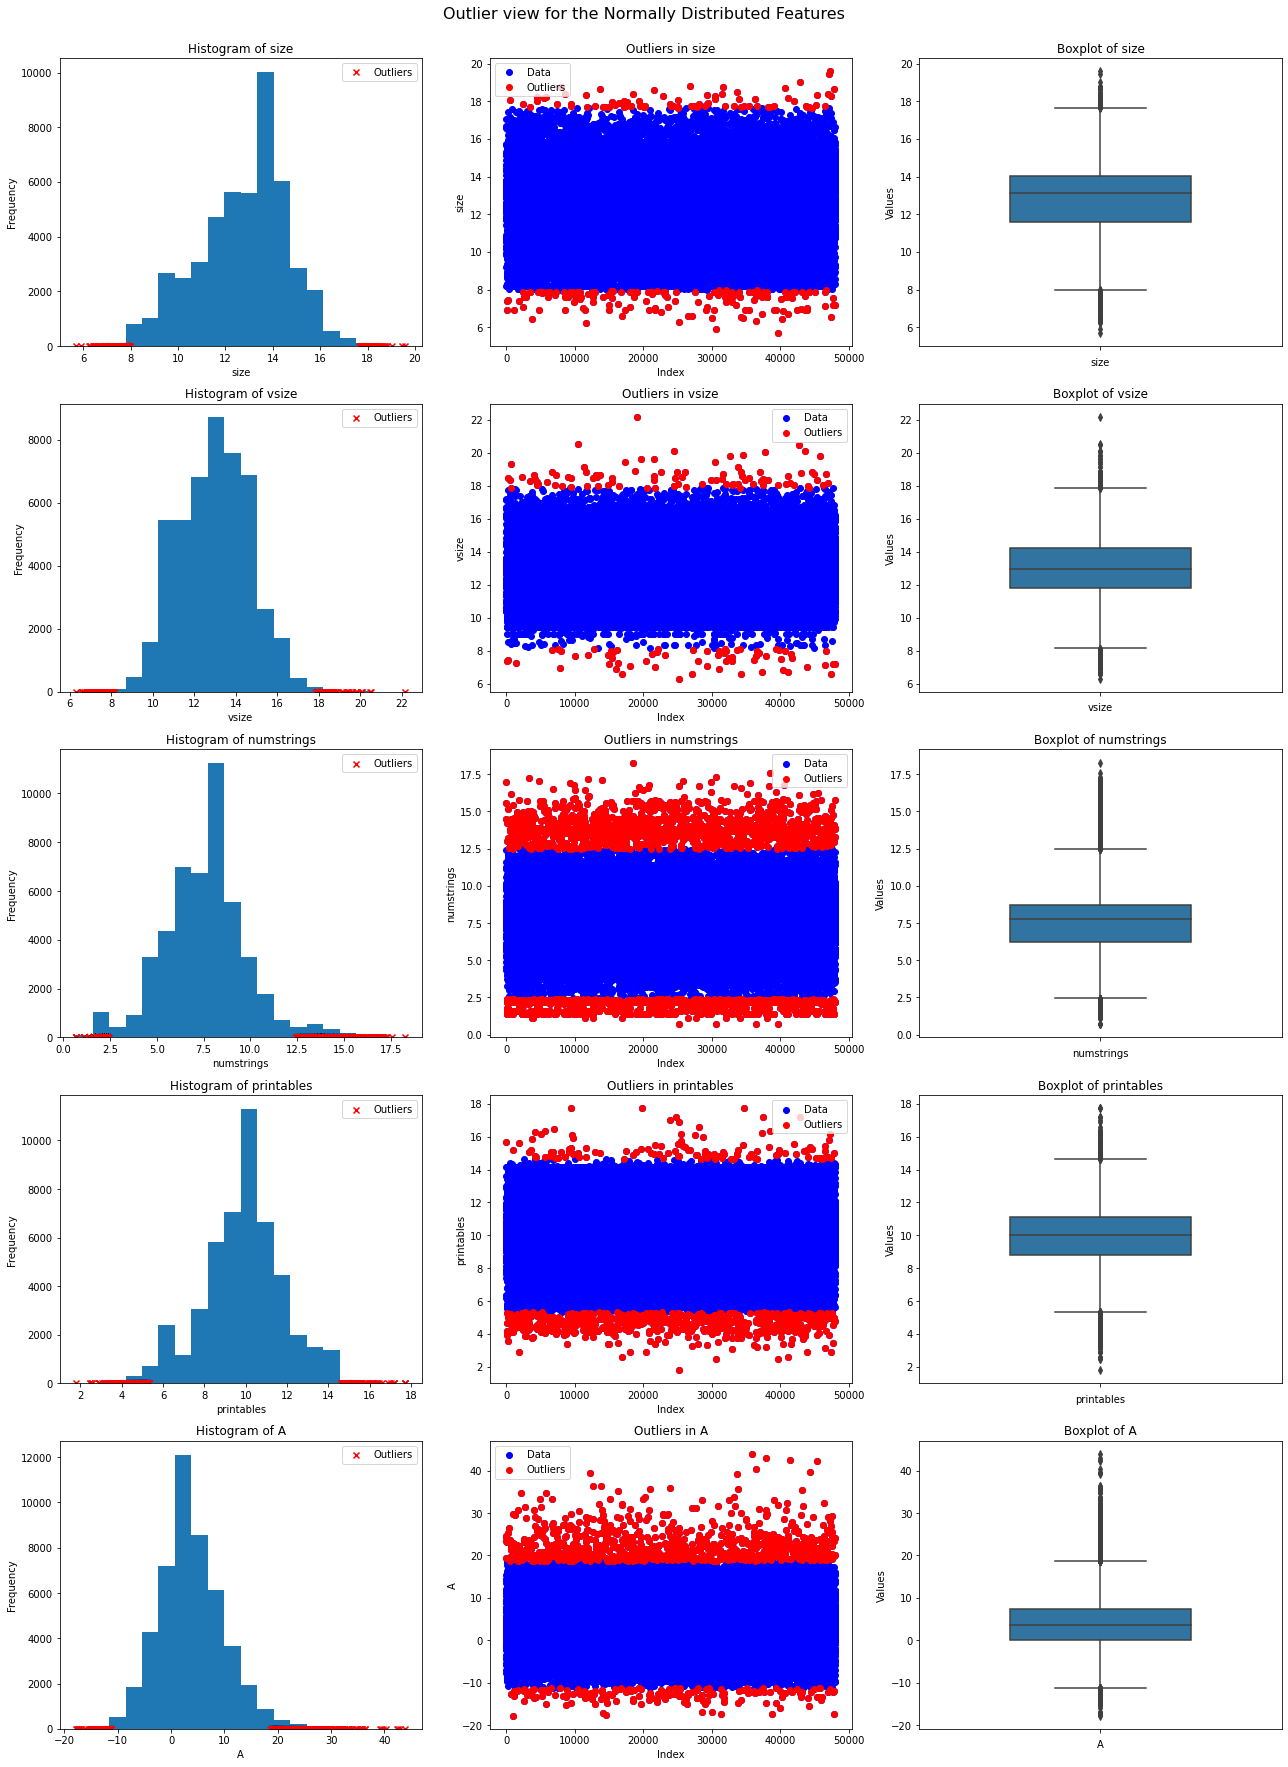

In [78]:
# Applying logarithmic transformation to the desired features
log_train_data = train_data[['size', 'vsize', 'numstrings', 'printables']].apply(np.log1p)
IQR_train_data = pd.concat([log_train_data, train_data['A']], axis=1)
plot_normal_dist_outliers(IQR_train_data)

Implementing the changes:

In [79]:
train_data, train_labels, test_data = handle_outliers(train_data, train_labels, test_data)

Now, we'll assess the impact

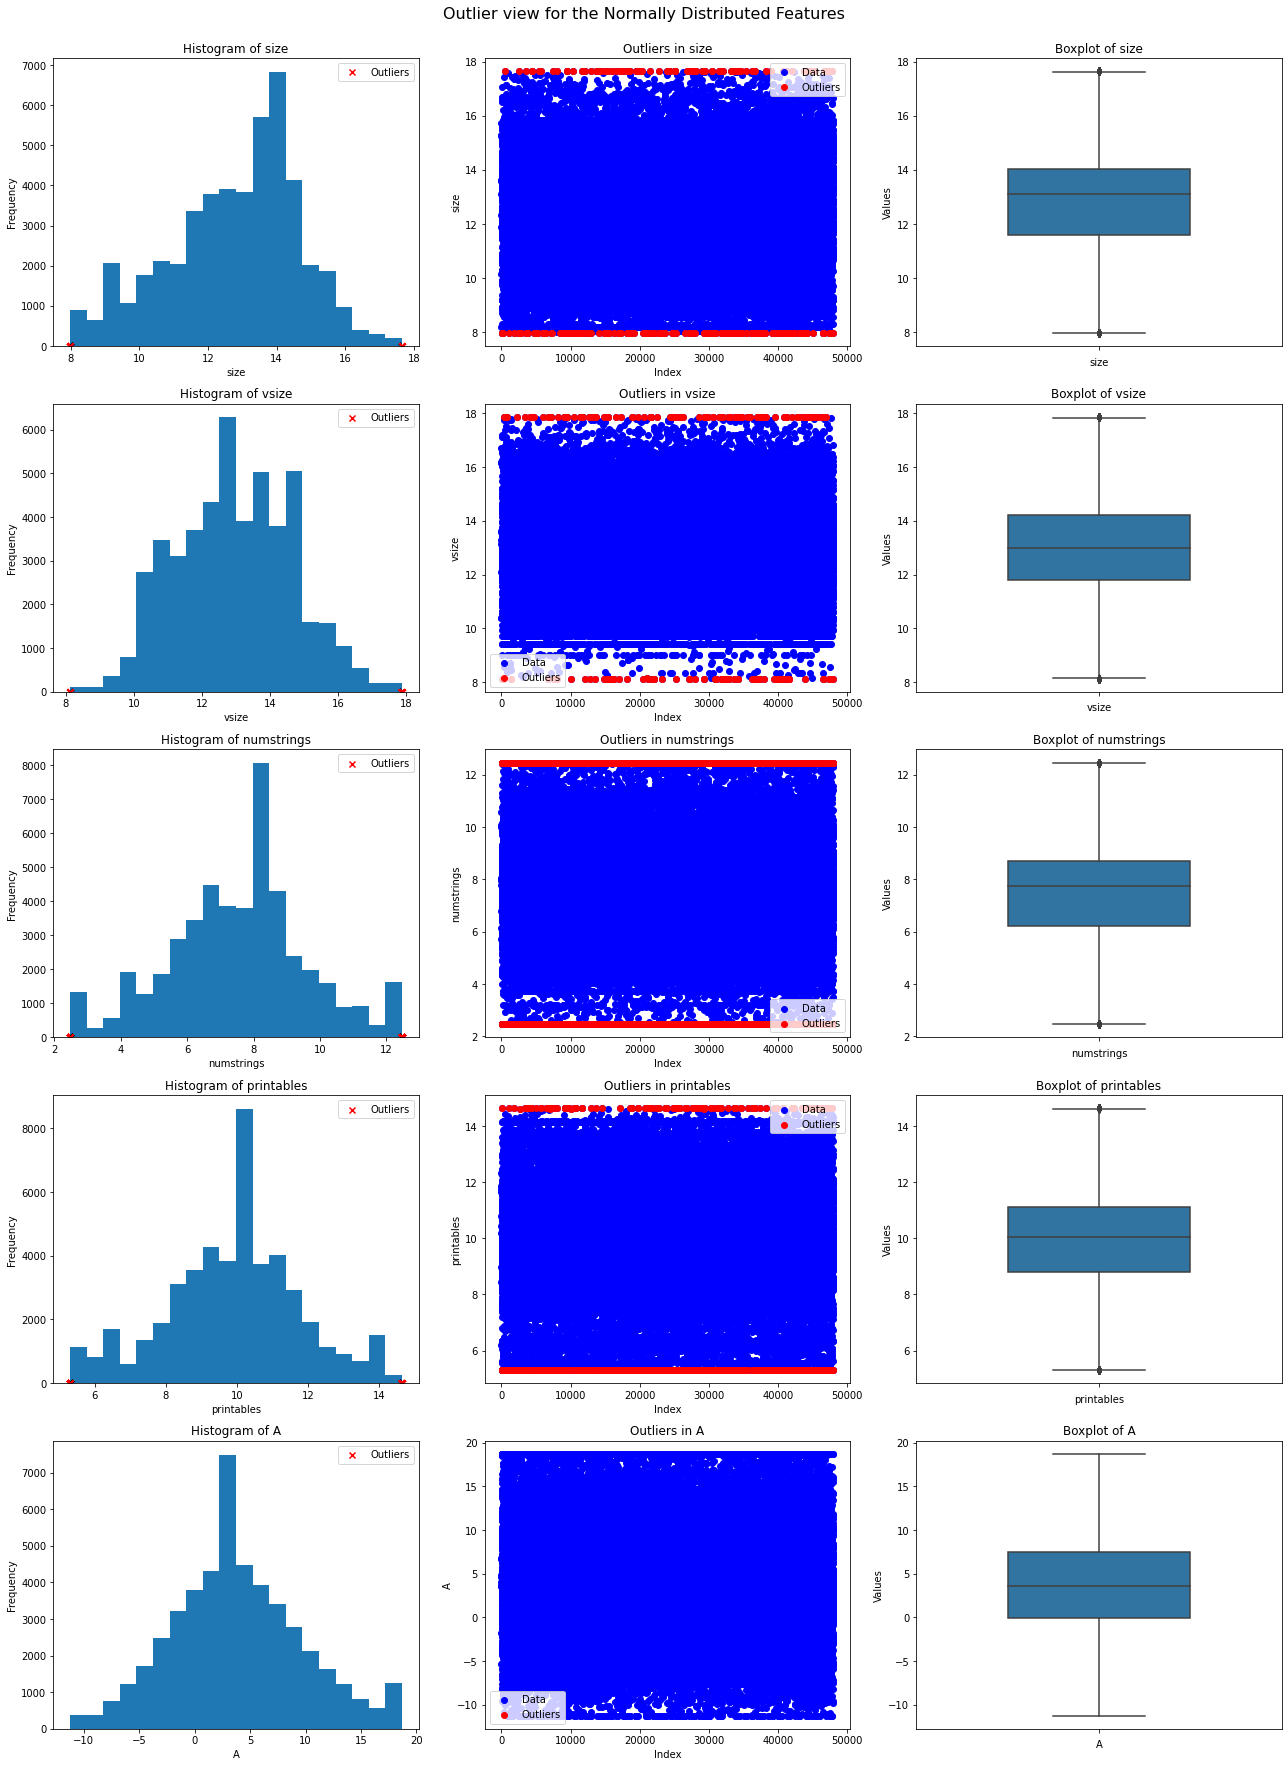

In [80]:
plot_normal_dist_outliers(train_data[['size', 'vsize', 'numstrings', 'printables', 'A']])

We can observe that the outliers in the normally distributed features were reduced drastically!

And the other non-distributed features:

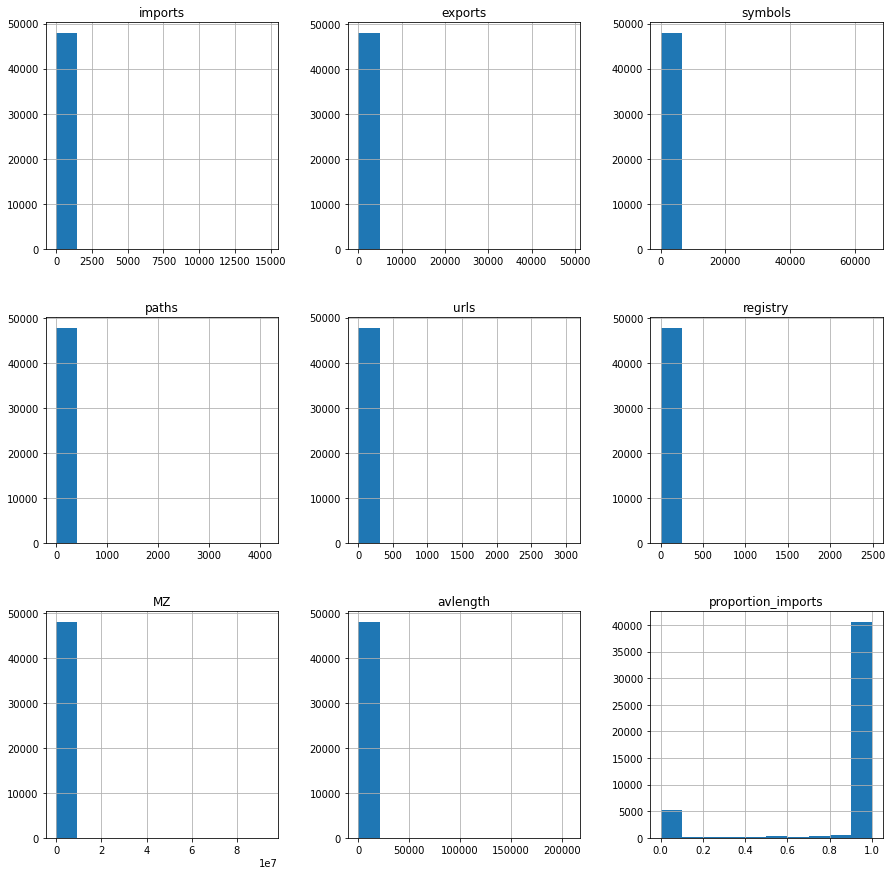

In [81]:
selected_features = ['imports', 'exports', 'symbols', 'paths', 'urls', 'registry', 'MZ', 'avlength', 'proportion_imports']
df = train_data[selected_features]
df.hist(figsize=(15, 15))
plt.show()

In [82]:
train_data.describe()

,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,paths,urls,registry,MZ,printables,avlength,file_type_prob_trid,A,B,proportion_imports,file_type_trid_DOS Executable Generic,file_type_trid_Generic .NET DLL/Assembly,"file_type_trid_Generic CIL Executable (.NET, Mono, etc.)",file_type_trid_Inno Setup installer,file_type_trid_InstallShield setup,file_type_trid_Microsoft Visual C++ compiled executable (generic),file_type_trid_NSIS - Nullsoft Scriptable Install System,file_type_trid_OS/2 Executable (generic),file_type_trid_UPX compressed Win32 Executable,file_type_trid_Win16 NE executable (generic),file_type_trid_Win32 Dynamic Link Library (generic),file_type_trid_Win32 EXE PECompact compressed (generic),file_type_trid_Win32 Executable (generic),file_type_trid_Win32 Executable Delphi generic,file_type_trid_Win32 Executable MS Visual C++ (generic),file_type_trid_Win32 Executable Microsoft Visual Basic 6,file_type_trid_Win64 Executable (generic),file_type_trid_WinRAR Self Extracting archive (4.x-5.x),file_type_trid_Windows ActiveX control,file_type_trid_Windows Control Panel Item (generic),file_type_trid_other,C_bf,C_cs,C_er,C_gow,C_mc,C_vh,C_vr
count,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,4.794900e+04,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000,47949.000000
mean,12.772294,12.969318,102.513212,25.789756,0.382823,0.566957,0.865294,0.244239,0.222132,33.122005,7.551424,1.379841,11.666354,0.427141,5.099048e+04,9.895423,31.697335,53.608861,3.900763,5.814376,0.869572,0.028197,0.018937,0.062712,0.013535,0.037290,0.016601,0.017060,0.019562,0.036497,0.013139,0.067009,0.019208,0.147261,0.014807,0.149742,0.028322,0.167261,0.018666,0.011366,0.052994,0.059834,0.095914,0.100336,0.191307,0.094809,0.086404,0.421177,0.010052
std,1.908429,1.691459,193.330228,456.196852,0.486081,0.495502,0.341412,0.429639,0.415684,875.049569,2.101823,27.059942,52.108121,12.525768,6.834757e+05,1.898223,1061.928897,20.604136,5.916342,0.623313,0.320555,0.165536,0.136303,0.242448,0.115552,0.189473,0.127772,0.129496,0.138492,0.187525,0.113871,0.250040,0.137257,0.354369,0.120783,0.356822,0.165892,0.373213,0.135343,0.106006,0.224023,0.237182,0.294477,0.300450,0.393335,0.292954,0.280963,0.493753,0.099757
min,7.973305,8.128156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.466159,0.000000,0.000000,0.000000,1.000000e+00,5.309286,5.000000,17.500000,-11.240194,0.004929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.599617,11.783502,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.214608,0.000000,0.000000,0.000000,2.000000e+00,8.802823,7.447368,38.400000,-0.014273,5.508142,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.097940,12.971727,28.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.751475,0.000000,0.000000,0.000000,4.000000e+00,10.037603,11.997463,43.300000,3.628090,5.860208,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [83]:
test_data.describe()

,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,paths,urls,registry,MZ,printables,avlength,file_type_prob_trid,A,B,proportion_imports,file_type_trid_DOS Executable Generic,file_type_trid_Generic .NET DLL/Assembly,"file_type_trid_Generic CIL Executable (.NET, Mono, etc.)",file_type_trid_Inno Setup installer,file_type_trid_InstallShield setup,file_type_trid_Microsoft Visual C++ compiled executable (generic),file_type_trid_NSIS - Nullsoft Scriptable Install System,file_type_trid_OS/2 Executable (generic),file_type_trid_UPX compressed Win32 Executable,file_type_trid_Win16 NE executable (generic),file_type_trid_Win32 Dynamic Link Library (generic),file_type_trid_Win32 EXE PECompact compressed (generic),file_type_trid_Win32 Executable (generic),file_type_trid_Win32 Executable Delphi generic,file_type_trid_Win32 Executable MS Visual C++ (generic),file_type_trid_Win32 Executable Microsoft Visual Basic 6,file_type_trid_Win64 Executable (generic),file_type_trid_WinRAR Self Extracting archive (4.x-5.x),file_type_trid_Windows ActiveX control,file_type_trid_Windows Control Panel Item (generic),file_type_trid_other,C_bf,C_cs,C_er,C_gow,C_mc,C_vh,C_vr
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,12.740387,12.947294,105.452083,30.300333,0.389083,0.572583,0.863750,0.251667,0.224333,26.505000,7.518348,1.618583,11.969667,0.306917,6.182124e+04,9.872646,31.802958,53.96650,4.018458,5.809996,0.871399,0.031000,0.02025,0.066417,0.014000,0.035583,0.016167,0.01825,0.019083,0.037750,0.01200,0.066417,0.019583,0.143250,0.014500,0.148750,0.025917,0.171417,0.017667,0.011583,0.054833,0.055583,0.098583,0.094250,0.199500,0.091917,0.084083,0.421667,0.010000
std,1.923787,1.694531,224.187828,474.535614,0.487563,0.494724,0.343068,0.433989,0.417160,706.693534,2.100091,52.144930,77.401497,2.281078,7.431399e+05,1.915424,1100.379858,20.75764,5.966218,0.612448,0.319160,0.173325,0.14086,0.249019,0.117495,0.185257,0.126121,0.13386,0.136824,0.190599,0.10889,0.249019,0.138569,0.350342,0.119545,0.355857,0.158893,0.376888,0.131742,0.107005,0.227664,0.229125,0.298114,0.292188,0.399641,0.288920,0.277524,0.493846,0.099503
min,7.973305,8.128156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.466159,0.000000,0.000000,0.000000,1.000000e+00,5.309286,5.232975,18.10000,-11.240194,0.225373,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.536642,11.718964,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.163315,0.000000,0.000000,0.000000,1.000000e+00,8.727535,7.447368,38.40000,0.045517,5.495074,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.030312,12.971727,28.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.698256,0.000000,0.000000,0.000000,4.000000e+00,10.037603,11.997463,43.30000,3.628090,5.860208,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

We can conclude that indeed the outlier number has been dropped and the changes expected were made.

### Large Dimensionality 

##### `How will we recognize that the dimensions of the problem are too large?` 

In order to assess as the dimensionality of the problem to a higher degree we can use the following steps:<br>

- Compute the Feature-to-Sample Ratio: Calculate the ratio of the number of features to the number of samples. If this ratio is significantly large, it might indicate a high-dimensional problem.

- Explore Feature Sparsity: Analyze the sparsity of our features. If a significant number of features have a high percentage of zero or near-zero values, it may indicate a high-dimensional problem.

- Assess Feature Redundancy: Determine the level of redundancy among the features. Redundant features provide similar or redundant information, which can increase dimensionality without adding valuable insights. (correlated features removal)

- Consider Feature Importance: Evaluate the importance or relevance of each feature in relation to the target variable (if available). 

- Assess Computational Complexity: Take into account the computational resources and time required to handle high-dimensional data. Some algorithms may become computationally expensive or impractical to run with a large number of features.

- Evaluate Model Performance: Train and evaluate models using different subsets of features to assess their impact on model performance. If the performance remains consistent despite reducing the number of features, it may indicate high dimensionality. 

#### Feature-to-Sample Ratio

In [84]:
# Get the number of samples and features
num_samples = train_data.shape[0]
num_features = train_data.shape[1]

# Calculate the feature-to-sample ratio
feature_to_sample_ratio = num_features / num_samples

print("Feature-to-Sample Ratio:", feature_to_sample_ratio)

Feature-to-Sample Ratio: 0.0010427746146947799


Meaning the dimentionality is not large.
But let's continue exploring, maybe we'll change our minds...

#### Explore Sparsity

In [85]:
def get_sparsity(data):

    sparsity_results = []
    features_to_check = ['size', 'vsize', 'imports', 'exports', 'symbols', 'numstrings', 'paths', 'urls', 'registry', 'MZ', 'printables', 'avlength', 'proportion_imports', 'file_type_prob_trid', 'A', 'B']
    # Iterate over each column/feature in the dataset
    for feature in features_to_check:
        # Calculate the sparsity for the current feature
        sparsity = data[feature].eq(0).mean()  # Assuming zero values indicate sparsity
        sparsity_results.append((feature, sparsity))

    # Create a DataFrame to store the sparsity results
    sparsity_df = pd.DataFrame(sparsity_results, columns=['Feature', 'Sparsity'])
 
    # Sort the DataFrame by sparsity in descending order
    sparsity_df = sparsity_df.sort_values('Sparsity', ascending=False)

    return sparsity_df

sparsity = get_sparsity(train_data)
sparsity

,Feature,Sparsity
4,symbols,0.990344
8,registry,0.957997
3,exports,0.852739
6,paths,0.739890
7,urls,0.585581
2,imports,0.105946
12,proportion_imports,0.105946
0,size,0.000000
1,vsize,0.000000
5,numstrings,0.000000


We can see that 'symbols' and 'registry' have high sparsity. Meaning that they are unlikely to contribute any meaningful information and can be considered as irrelevant. <br>
Also, these are the only high sparsity features we get, so based on sparsity testing we can conclude that the dimentionality is still not high.

Note that in our exploration we saw that 'symbols' had high mean with the label so maybe removing them isn't wise... <br>
We'll deal with that later.

For the other steps we will perform later PCA and feature importance which will help us conclude if there is large dimentionality.
For now we can conclude that the dimentionality is not high.

##### `Is the dimensionality of the problem too great?`

As a general perception the answer is No, we can see that the number of features is exceptionally low than the number of observations 23:48000 <br>
(Even if we add several new features, still, it won't make a problem - 50:48000).

##### `Why can large dimensionality create a problem? `

There are several reasons why large dimensionality can create a problem:

- <u>Increased computational complexity:</u> Processing and analyzing data with a large number of features can be computationally expensive and time-consuming, making it impractical for certain algorithms.

- <u>Curse of dimensionality:</u> As the number of dimensions increases, the data becomes sparse, making it difficult to find meaningful patterns and increasing the risk of overfitting.

- <u>Storage requirements:</u> Large-dimensional datasets require more storage space and memory.

- <u>Increased risk of overfitting:</u> With a high number of features, there is a higher chance of capturing noise or irrelevant patterns, leading to overfitting and poor generalization to new data.

- <u>Difficulty in visualization:</u> Visualizing data becomes challenging as the number of dimensions grows, making it harder to interpret relationships between variables.





### Data Normalizing

To begin with, normalization is only required to some of the models, and to others they may cause only reduced performance.

 `Is the data normalized?` <br>
As we can see none of the features are normalized.

 `Should it be normalized?` <br>

There are several reasons to normalize the data:
1. <b>Comparability:</b> Normalizing the data ensures that all features are on a similar scale. This allows for a fair comparison between different features and prevents features with larger values from dominating the analysis or model training process.

2. <b>Avoiding Bias:</b> Some algorithms are sensitive to the scale of the input features. If the features have different scales, it can introduce bias and result in inaccurate or skewed results.

3. <b>Interpretability:</b> Normalizing the data can make the model or analysis results more interpretable. When the features are on a standard scale, the coefficients or importance values assigned to each feature become more meaningful and comparable.

4. <b>Outlier Handling:</b> Normalizing the data can help in handling outliers. By scaling the features, outliers will have less impact on the overall distribution and analysis.

`What is the importance of normalizing the data in the problem? `

Based on the reasons stated above and as we've seen before only feature 'A' is normaly distributed, we would prefer to normalize the full data set in order to remove bias and not affect the ML algorithms we will run later.

Eventhough we know that some features are distributed normally and some not, we decided it is best to incorporate the same transformer on all the numerical data.
Thus, we will implement Standard Scaler:

Standart scaler implementation on the train data:

In [86]:
def normalize_data_train(data, selected_features):
    
    # Filter the data to keep only the selected features
    selected_data = data[selected_features]

    # Standardize the selected_data using StandardScaler
    scaler = StandardScaler()
    scaler = scaler.fit(selected_data)
    scaled_data = scaler.transform(selected_data)

    # Create a new DataFrame with the scaled data and original column names
    data[selected_features] = scaled_data
    
    return data, scaler

and now on the test data:

In [87]:
def normalize_data_test(data, scaler, selected_features):
    
    # Filter the data to keep only the selected features
    selected_data = data[selected_features]

    # Standardize the selected_data using the fitted scaler by the train data
    scaled_data = scaler.transform(selected_data)

    # Create a new DataFrame with the scaled data and original column names
    data[selected_features] = scaled_data

    return data

Organizing both of them together:

In [88]:
def normalize_data(train_data, test_data):

    selected_features = ['size', 'vsize', 'numstrings', 'printables', 'A','imports', 'exports', 'symbols', 'paths', 'urls', 'registry', 'MZ', 'avlength', 'proportion_imports', 'file_type_prob_trid', 'B']

    train_data, scaler = normalize_data_train(train_data, selected_features)
    test_data = normalize_data_test(test_data, scaler, selected_features)

    return train_data, test_data

In [89]:
train_data, test_data = normalize_data(train_data, test_data)

print(train_data.shape)

train_data.head()

(47949, 50)


,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,paths,urls,registry,MZ,printables,avlength,file_type_prob_trid,A,B,proportion_imports,file_type_trid_DOS Executable Generic,file_type_trid_Generic .NET DLL/Assembly,"file_type_trid_Generic CIL Executable (.NET, Mono, etc.)",file_type_trid_Inno Setup installer,file_type_trid_InstallShield setup,file_type_trid_Microsoft Visual C++ compiled executable (generic),file_type_trid_NSIS - Nullsoft Scriptable Install System,file_type_trid_OS/2 Executable (generic),file_type_trid_UPX compressed Win32 Executable,file_type_trid_Win16 NE executable (generic),file_type_trid_Win32 Dynamic Link Library (generic),file_type_trid_Win32 EXE PECompact compressed (generic),file_type_trid_Win32 Executable (generic),file_type_trid_Win32 Executable Delphi generic,file_type_trid_Win32 Executable MS Visual C++ (generic),file_type_trid_Win32 Executable Microsoft Visual Basic 6,file_type_trid_Win64 Executable (generic),file_type_trid_WinRAR Self Extracting archive (4.x-5.x),file_type_trid_Windows ActiveX control,file_type_trid_Windows Control Panel Item (generic),file_type_trid_other,C_bf,C_cs,C_er,C_gow,C_mc,C_vh,C_vr
0,300c18fd9254bedd239ba61a3919c02932d3877bf874ea...,0.424962,0.358241,0.416322,-0.049956,1.0,1.0,1.0,1.0,1.0,-0.037852,0.205221,0.059874,0.447798,-0.034101,-0.074597,0.468751,-0.014325,0.907164,0.033029,0.183014,0.356571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,017e5c90f2bdf262d14500a7f9501c1999f81adc8693f5...,-1.380151,-1.520662,-0.525082,-0.056533,0.0,1.0,1.0,1.0,0.0,-0.037852,-0.877492,0.059874,0.159932,-0.034101,-0.074603,-0.486896,-0.005218,-0.738154,-1.559657,-0.897207,0.406887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8a1355d1f00dc6a020e57bad5e15d78b6fd4f892607b2f...,0.167881,0.099755,-0.525082,-0.056533,1.0,1.0,1.0,0.0,0.0,-0.037852,0.199339,-0.014037,-0.185508,-0.034101,-0.074600,0.291421,-0.018624,0.916871,0.478490,-0.705927,0.406887,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,e3421c88d355a4372911b217684a5eb4be28e43d4eede3...,1.320569,1.903559,-0.473357,-0.056533,0.0,0.0,1.0,0.0,1.0,-0.037852,1.204426,0.022918,-0.223890,-0.034101,-0.074522,1.029826,-0.024335,0.475208,0.127705,1.166794,0.406887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46d3335fdd87b899753342db14461b89c295f10253f58a...,1.292251,1.874669,-0.473357,-0.056533,0.0,0.0,1.0,0.0,1.0,-0.037852,1.158104,-0.014037,-0.223890,-0.034101,-0.074525,0.980008,-0.024320,-0.709033,-0.046089,1.162400,0.406887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


We see that the data was normalized as expected.

### Dimensionality Reduction

#### Feature Selection

Looking at the strong conclusions we had during the project about the features:
- The sparsity in 'symbols' and 'registry' is very high.
- The feature 'symbols' is pretty correlated with the label, specifically benign labels.
- There is high correlation between 'size' with 'numstrings' and 'MZ'.

Therfore we will remove the features - 'registry', 'numstrings' and 'MZ':

In [90]:
def remove_features(data):
    features_to_remove = ['registry', 'size', 'MZ']
    data_selected = data.drop(features_to_remove, axis=1)
    return data_selected

In [91]:
train_data = remove_features(train_data)
test_data = remove_features(test_data)

In addition, we will use PCA to reduce the dimentionality even more:

#### PCA

Before performing the PCA let's look at the Cumulativ Explained Variance Ratio plot:

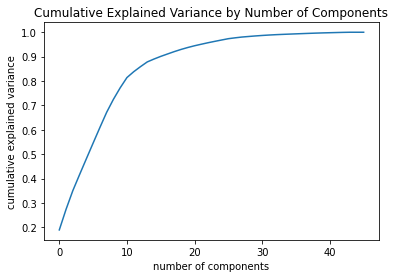

In [92]:
train_data_noid = train_data.loc[:, train_data.columns != 'sha256']
pca = PCA().fit(train_data_noid)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()

We can evaluate that most of the variance is already gained after approximately 15 components.

In [93]:
def perform_pca(train_data, test_data, variance_percentage):

    if 'sha256' in train_data.columns:
        train_data = train_data.loc[:, train_data.columns != 'sha256']

    if 'sha256' in test_data.columns:
        test_data = test_data.loc[:, test_data.columns != 'sha256']

    pca = PCA(variance_percentage, whiten=True)

    new_redueced_X_train = pd.DataFrame(pca.fit_transform(train_data))
    new_redueced_X_test = pd.DataFrame(pca.transform(test_data))

    train_data = new_redueced_X_train
    test_data = new_redueced_X_test

    return train_data, test_data

In [94]:
train_shape = train_data.shape[1]
train_data, test_data = perform_pca(train_data, test_data, 0.99)

In [95]:
print(f'Number of components before PCA: {train_shape}')
print(f'Number of components which preserve at least 99% of the variance: {train_data.shape[1]}')

Number of components before PCA: 47
Number of components which preserve at least 99% of the variance: 33


We can see that PCA got us 33 components for 99% variance. <br>
This step gets us one step closer to determining the question of dimentionality. <br>
Even if the dimentionality was high before, now after running PCA we for sure get a good dimentionality. Moreover, we see that the initial state was not in a high dimentionality either.

Our final step to concluding the dimentionality will be the feature importance testing, but we can already be sure that it is not too high...

<b>Even though we implemented PCA, we <u>won't include</u> it in the final run due to its distinct drawback - the loss of interpretability of the features.</b>

#### Preprocessing

Now, after deciding what manipulations we will do on the train data (Outliers removal, Normalization, Missing values handling, Categorial data handling, Feature selection and Feature manipulation), we will create a generic preprocess function to run it all at once.

In [96]:
def preprocess_data_ALL(train_data, train_labels, test_data):

    if 'sha256' in train_data.columns:
        # Drop 'sha256' column
        train_data = train_data.drop('sha256', axis=1)

    if 'sha256' in test_data.columns:
        # Drop 'sha256' column
        test_data = test_data.drop('sha256', axis=1)

    # Missing Values Handling
    train_data, test_data = handle_missing_values(train_data, test_data)
    
    # Add feature - 'proportion_imports'
    train_data = adding_new_feature(train_data)
    test_data = adding_new_feature(test_data) 

    # Categorical Data Handling
    train_data, test_data = handle_categorial_features(train_data, test_data)
    
    # Outliers Removal
    train_data, train_labels, test_data = handle_outliers(train_data, train_labels, test_data)

    # Normalization
    train_data, test_data = normalize_data(train_data, test_data)

    # Feature Reduction
    train_data = remove_features(train_data)
    test_data = remove_features(test_data)

    # PCA
    # train_data, test_data = perform_pca(train_data, test_data, 0.99) 
    
    return train_data, train_labels, test_data


train_data_ppc1 = train_data_ppc.copy()
train_lables_ppc1 = train_lables_ppc.copy()

test_data_ppc1 = test_data_ppc.copy()
test_labels_ppc1 = test_labels_ppc.copy()

preprocessed_train_data, preprocessed_train_labels, preprocessed_test_data = preprocess_data_ALL(train_data_ppc1, train_lables_ppc1, test_data_ppc1)
preprocessed_test_labels = test_labels_ppc1.copy()

## Part 3 - Running the Models 

After preprocessing all the data, we will perform model training and testing of the 4 chosen models:<br>

<u>Simple Models:</u>
- KNN
- Logistic Regression

<u>Advanced Models:</u>
- Multi-Layer Perceptron (ANN)
- Random Forest

Just before that, we will create a function to plot the ROC curves for each model:

In [97]:
def plot_roc_curve_auc(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)

    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

### <u>Two Simple Models</u>

#### KNN 

KNN is a non-parametric classification algorithm that assigns a class label to a data point based on the majority vote of its k nearest neighbors in the feature space.

<u>Hyperparameters:</u><br>
<b>n_neighbors:</b> The number of neighbors to consider. Default value: 5. <br>
<b>weights:</b> The weight function used in prediction. It can be 'uniform' (all neighbors have equal weight) or 'distance' (closer neighbors have higher weight). Default value: 'uniform'. <br>
<b>p (Power parameter):</b> The power parameter for the Minkowski distance metric. It is used when weights is set to 'distance'. Default value: 2 (Euclidean distance).

In terms of bias and variance:<br>
<u>Bias:</u> KNN tends to have low bias because it can capture both local and global patterns in the data, making it flexible enough to learn complex relationships.<br>
<u>Variance:</u> KNN typically has high variance, as its predictions heavily depend on the choice of k and the distribution of data points within each neighborhood. Using a larger k can help reduce variance, but it may lead to an increase in bias.

The hyper parameters we choose to run are:
- <u>n_neighbors</u> - <span style="color:lightblue;">15</span> - We set the number of neighbors to 15 in order to create a robust model that can capture both local and global patterns in the data. A higher number of neighbors considers more data points in the decision-making process, reducing the impact of noise or outliers on the predictions. This choice aims to balance between overfitting (low bias) with too few neighbors and increased computational complexity (high bias) with too many neighbors.
- <u>weights</u> - <span style="color:lightblue;">'distance'</span> - Since the data has been normalized and no outliers remain, the 'distance' weight function is suitable. It gives more weight to closer neighbors, meaning that nearer data points have a stronger influence on predictions than distant ones. This approach can lead to better performance when the data is well-scaled and the distance between neighbors is meaningful.
- <u>p (power parameter)</u> - We leave the choice of the power parameter to grid search. In KNN, the Minkowski distance metric is used, and the power parameter determines whether the Euclidean distance (p=2) or Manhattan distance (p=1) is employed. Grid search will explore various values to determine the optimal power parameter that best suits the characteristics of the data.

Best Parameters: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Train AUC Score: 1.0
Test AUC Score: 0.9552333327564663


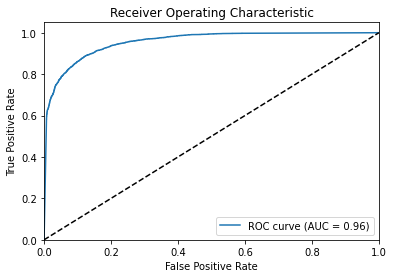

In [98]:
# Create the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [15],  # Number of neighbors
    'weights': ['distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for Minkowski metric
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')

# Perform grid search on the training data
grid_search.fit(preprocessed_train_data, preprocessed_train_labels)

# Get the best model and its corresponding parameters
knn_best_model = grid_search.best_estimator_
knn_best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", knn_best_params)

# Predict probabilities on the test set using the best model
y_scores_train = knn_best_model.predict_proba(preprocessed_train_data)[:, 1]
y_scores = knn_best_model.predict_proba(preprocessed_test_data)[:, 1]

# Calculate the AUC score
train_auc_score = roc_auc_score(preprocessed_train_labels, y_scores_train)
print("Train AUC Score:", train_auc_score)

test_auc_score = roc_auc_score(preprocessed_test_labels, y_scores)
print("Test AUC Score:", test_auc_score)

# Plot the ROC curve and AUC score
plot_roc_curve_auc(preprocessed_test_labels, y_scores)

#### Logistic Regression

Logistic Regression is a linear classification algorithm that models the probability of the binary outcome using a logistic function. It estimates the coefficients of the linear equation using maximum likelihood estimation.<br>

<u>Hyperparameters:</u><br>
<b>C (Inverse of regularization strength):</b> It controls the amount of regularization applied to prevent overfitting. Smaller values indicate stronger regularization. Default value: 1.0.<br>
<b>penalty:</b> The type of regularization to apply. It can be 'l1' (L1 regularization), 'l2' (L2 regularization), 'elasticnet' (L1 and L2 regularization), or 'none'. Default value: 'l2'.<br>
<b>solver:</b> The algorithm to use for optimization. It can be 'liblinear', 'lbfgs', 'newton-cg', 'sag', or 'saga'. Default value: 'lbfgs' (for binary classification).<br>
<b>max_iter:</b> Determines the maximum number of iterations allowed for the solver to converge and find the optimal solution.

In terms of bias and variance:<br>
<u>Bias:</u> Logistic Regression often has low bias since it is a linear classification algorithm that can model simple relationships effectively.<br>
<u>Variance:</u> Logistic Regression usually has moderate to low variance due to its simplicity and regularization techniques. The regularization parameter "C" (set to 10 in this case) helps control overfitting and reduces variance.

The hyper parameters we choose to run are:
- <u>C</u> - <span style="color:lightblue;">10</span> - since the data is not very complex, weaker regularization is preferred. 10 indicates a balance between bias and variance tradeoff.
- <u>penalty</u> - We decide to let grid search find the best penalty for our specific dataset. 'l1' penalty may induce sparsity by driving some coefficients to zero, while 'l2' penalty encourages small but non-zero coefficients, which can be useful in controlling variance.
- <u>solver</u> - <span style="color:lightblue;">'liblinear'</span> since it is good for moderately sized dataset and binary classification. Choosing an appropriate solver can impact the model's convergence behavior, affecting both bias and variance.
- <u>max_iter</u> - <span style="color:lightblue;">100</span> - since we want to give the model time to converge.

Best Parameters: {'C': 10.0, 'max_iter': 100, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'liblinear'}
Train AUC Score: 0.8650369289667034
Test AUC Score: 0.8746149029144916


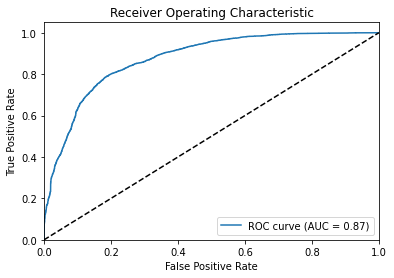

In [99]:
# After searching the best parameters we got:

param_grid = { 
    'C': [10.0], #[0.1, 1.0, 10.0],  # Inverse of regularization strength
    'penalty': ['l2'],  # Regularization penalty (L1 or L2)
    'solver': ['liblinear'],  # Solver algorithm
    'max_iter': [100],  # Maximum number of iterations
    'n_jobs': [-1] 
}

# param_grid = { 
#     'C': [10.0],  # Inverse of regularization strength
#     'penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
#     'solver': ['liblinear', 'lbfgs'],  # Solver algorithm
#     'max_iter': [100],  # Maximum number of iterations
#     'n_jobs': [-1] 
# }

# Create the Logistic Regression classifier
logreg = LogisticRegression(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')

# Perform grid search on the training data
grid_search.fit(preprocessed_train_data, preprocessed_train_labels)

# Get the best model and its corresponding parameters
logreg_best_model = grid_search.best_estimator_
logreg_best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", logreg_best_params)

# Predict probabilities on the test set using the best model
y_scores_train = logreg_best_model.predict_proba(preprocessed_train_data)[:, 1]
y_scores = logreg_best_model.predict_proba(preprocessed_test_data)[:, 1]

# Calculate the AUC score
train_auc_score = roc_auc_score(preprocessed_train_labels, y_scores_train)
print("Train AUC Score:", train_auc_score)

test_auc_score = roc_auc_score(preprocessed_test_labels, y_scores)
print("Test AUC Score:", test_auc_score)

# Plot the ROC curve and AUC score
plot_roc_curve_auc(preprocessed_test_labels, y_scores)

### <u>Two Advanced Models</u>

#### ANN

Multi-Layer Perceptron (MLP) is a type of artificial neural network that consists of multiple layers of interconnected nodes. It is a versatile model capable of learning complex patterns and relationships in the data.

<u>Hyperparameters:</u><br>
<b>hidden_layer_sizes:</b> The number of nodes in each hidden layer. Default value: (100,).<br>
<b>activation:</b> The activation function for the hidden layers. Default value: 'relu'.<br>
<b>solver:</b> The optimizer algorithm. Default value: 'adam'.<br>
<b>alpha:</b> The L2 regularization parameter. Default value: 0.0001.<br>

In terms of bias and variance:<br>
<u>Bias:</u> ANN can have low bias due to its capability to learn complex patterns in the data through multiple hidden layers.<br>
<u>Variance:</u> ANN can have high variance, especially with a large number of hidden layers and neurons, making it prone to overfitting. Careful tuning of hyperparameters and regularization techniques can help mitigate this.

The hyper parameters we choose to run are:
- <u>hidden_layer_sizes</u> - <span style="color:lightblue;">64</span> - in order to increase the capacity for learning complex patterns. This choice may also increase the risk of overfitting due to the model's higher variance, which can be addressed through regularization techniques.
- <u>activation</u> - The choice of activation function can significantly impact the model's ability to learn and generalize. Hence the need for grid search to find the most suitable one that balances bias and variance.
- <u>solver</u> - <span style="color:lightblue;">'adam'</span> - since it's good to moderate-large datasets.It helps the model converge faster, which can be beneficial for moderately sized datasets while keeping the variance under control.
- <u>alpha</u> - <span style="color:lightblue;">0.0001</span> - we stay with the default value since it allows low regularization strengh because we already preprocessed the data well. However, regularization can be beneficial to further prevent overfitting, especially when dealing with high-dimensional datasets, which can help to reduce variance in the model's predictions and increase its generalization capability.

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'solver': 'adam'}
Train AUC Score: 0.9701553749159082
Test AUC Score: 0.9563691964110487


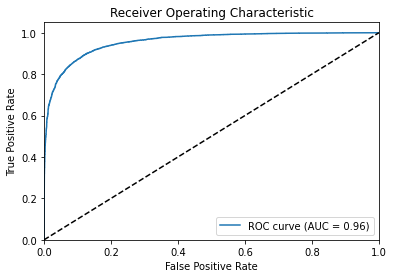

In [100]:
# Define the parameter grid
param_grid = { 
    'hidden_layer_sizes': [(64,)],  # Number of units in the hidden layers
    'activation': ['logistic', 'relu'],  # Activation function
    'solver': ['adam'],  # Solver algorithm
    'alpha': [0.0001 ]
}

# Create the MLP classifier
mlp = MLPClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='roc_auc')

# Perform grid search on the training data
grid_search.fit(preprocessed_train_data, preprocessed_train_labels)

# Get the best model and its corresponding parameters
mlp_best_model = grid_search.best_estimator_
mlp_best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", mlp_best_params)

# Predict probabilities on the test set using the best model
y_scores_train = mlp_best_model.predict_proba(preprocessed_train_data)[:, 1]
y_scores = mlp_best_model.predict_proba(preprocessed_test_data)[:, 1]

# Calculate the AUC score
train_auc_score = roc_auc_score(preprocessed_train_labels, y_scores_train)
print("Train AUC Score:", train_auc_score)

test_auc_score = roc_auc_score(preprocessed_test_labels, y_scores)
print("Test AUC Score:", test_auc_score)

# Plot the ROC curve and AUC score
plot_roc_curve_auc(preprocessed_test_labels, y_scores)

#### Random Forest

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It improves the accuracy and reduces overfitting compared to a single decision tree.

<u>Hyperparameters:</u><br>
<b>n_estimators:</b> The number of decision trees in the random forest. Default value: 100.<br>
<b>min_samples_leaf:</b> The minimum number of samples required to be at a leaf node during tree building Default value: 1.<br>
<b>max_depth:</b> The maximum depth of each decision tree. Default value: None.<br>
<b>min_samples_split:</b> The minimum number of samples required to split an internal node. Default value: 2.<br>

In terms of bias and variance:<br>
<u>Bias:</u> Random Forest generally has low bias due to its ensemble nature and the combination of multiple decision trees.<br>
<u>Variance:</u> Random Forest tends to have low variance because it averages the predictions of multiple trees, which reduces the impact of individual tree's overfitting. Using a large number of estimators (300 in this case) contributes to better generalization and lower variance.

The hyper parameters we choose to run are:
- <u>n_estimators</u> - <span style="color:lightblue;">300</span> - since we want to improve the model performance and introduce more diversity in the ensemble since each tree is trained on different subset. More trees contribute to better generalization and reduce overfitting, thus lowering variance. Each tree is trained on a different subset of the data, which introduces diversity and leads to more robust predictions.
- <u>max_depth</u> - <span style="color:lightblue;">none</span> - We choose not to set a specific value for 'max_depth' (i.e., 'none'), allowing the model to capture complex relationships within the data. With no maximum depth constraint, the trees can grow deeper, exploring intricate patterns, and making the model more flexible. This can reduce bias and improve accuracy on complex datasets.
- <u>min_samples_split</u> - <span style="color:lightblue;">10</span> - By setting 'min_samples_split' to 10, we ensure that a node in a decision tree must contain at least 10 samples before attempting to split further. This constraint helps prevent overfitting by ensuring that a split occurs only when a sufficient number of samples are available to make reliable decisions. Controlling overfitting reduces variance and enhances the model's ability to generalize to unseen data.
- <u>min_samples_leaf</u> - <span style="color:lightblue;">4</span> - Similarly to 'min_samples_split,' we set 'min_samples_leaf' to 4 to avoid overfitting and maintain a balance between bias and variance. This hyperparameter controls the minimum number of samples required to be at a leaf node. A higher value ensures that each leaf contains enough samples, preventing the creation of small, highly specific leaves that may lead to overfitting. By controlling the granularity of the tree structure, we enhance the model's generalization capabilities.

Train AUC Score: 0.9949130765751517
Test AUC Score: 0.9774095914060372


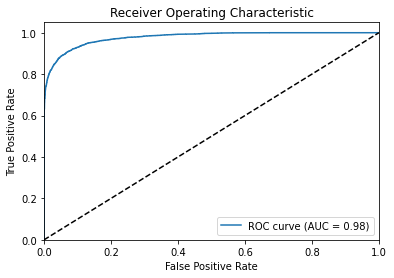

In [101]:
# Create the Random Forest classifier with specified hyperparameters
rf_best_model = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=10, min_samples_leaf=4, n_jobs=-1)
rf_best_model.fit(preprocessed_train_data, preprocessed_train_labels)

# Predict on the test set using the best model
y_scores_train = rf_best_model.predict_proba(preprocessed_train_data)[:, 1]
y_scores = rf_best_model.predict_proba(preprocessed_test_data)[:, 1]

# Calculate the AUC score
train_auc_score = roc_auc_score(preprocessed_train_labels, y_scores_train)
print("Train AUC Score:", train_auc_score)

test_auc_score = roc_auc_score(preprocessed_test_labels, y_scores)
print("Test AUC Score:", test_auc_score)

# Plot the ROC curve and AUC score
plot_roc_curve_auc(preprocessed_test_labels, y_scores)

<br><br><br>Based on the test AUCs of each model we decided to use <u><b>Random Forest</b></u> as our final model!

Let's find out the importance of each feature to the model:

Feature Importances in Random Forest:
avlength: 11.42%
B: 10.79%
imports: 9.83%
urls: 7.47%
file_type_prob_trid: 6.76%
vsize: 6.60%
proportion_imports: 6.24%
printables: 5.75%


numstrings: 5.59%
has_debug: 4.79%
has_signature: 4.27%
paths: 2.90%
has_relocations: 1.72%
file_type_trid_Windows Control Panel Item (generic): 1.42%
A: 1.40%
exports: 1.25%
has_tls: 1.20%
has_resources: 0.97%
file_type_trid_other: 0.94%
file_type_trid_Win32 Executable MS Visual C++ (generic): 0.89%
file_type_trid_WinRAR Self Extracting archive (4.x-5.x): 0.84%
file_type_trid_Win32 Executable (generic): 0.64%
file_type_trid_InstallShield setup: 0.61%
file_type_trid_Win64 Executable (generic): 0.60%
file_type_trid_Generic .NET DLL/Assembly: 0.57%
file_type_trid_Generic CIL Executable (.NET, Mono, etc.): 0.57%
file_type_trid_DOS Executable Generic: 0.48%
file_type_trid_Win32 Executable Microsoft Visual Basic 6: 0.45%
file_type_trid_Win32 Dynamic Link Library (generic): 0.45%
file_type_trid_NSIS - Nullsoft Scriptable Install System: 0.42%
file_type_trid_UPX compressed Win32 Executable: 0.29%
C_vh: 0.24%
symbols: 0.20%
file_type_trid_Win16 NE executable (generic): 0.19%
C_er: 0.18%
file_

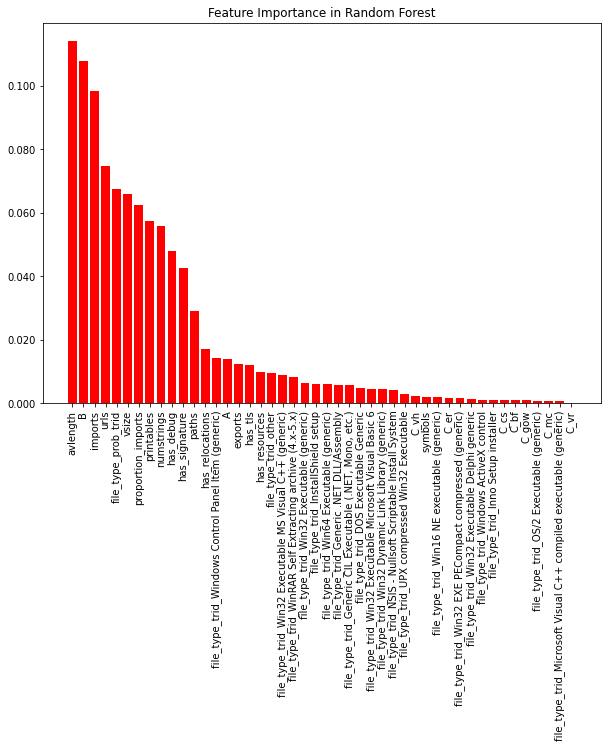

In [102]:
# Get the feature importances
importances = rf_best_model.feature_importances_

# Sort the feature importances in descending order and get the corresponding indices
indices = np.argsort(importances)[::-1]

# Defining the names of the features 
names = preprocessed_train_data.columns

# Calculate the total importance sum
total_importance = np.sum(importances)

# Print the feature importances as percentages
print("Feature Importances in Random Forest:")
for i in indices:
    feature_name = names[i]
    feature_importance = importances[i] / total_importance * 100
    print(f"{feature_name}: {feature_importance:.2f}%")

# Plot the feature importances
plt.figure(figsize=(10,7))
plt.title("Feature Importance in Random Forest")
plt.bar(range(len(names)), importances[indices],
       color="r", align="center")
plt.gca().yaxis.set_major_formatter('{:.3f}'.format)
plt.xticks(range(len(names)), [names[i] for i in indices], rotation=90)
plt.show()

This feature importance graph allows us to draw some good conclusions about our features:

- <u>B:</u> 10.83% importance<br>
Although we couldn't figure out the context of the feature, the decision of not removing it seems to be rewarding.

- <u>avlength:</u>  10.65% importance<br>
The average string length of a file can provide insights into the complexity or structure of the file's content. Malicious files may exhibit distinct patterns or behaviors that are captured by this feature, contributing to its high importance.

- <u>imports:</u>  9.65% importance<br>
The number of imported functions can indicate the dependencies and external resources that a file relies on. Malicious files may exhibit different import patterns compared to benign files, making this feature important for distinguishing between the two.

- <u>urls:</u>  7.53% importance<br>
The presence of URLs in a file can be indicative of network communication or potential malicious activities, such as connecting to command-and-control servers.

- <u>file_type_prob_trid:</u>  6.97% importance<br>
The probability of the predicted file type based on TRID (file identification tool) provides information about the likely nature of the file. Certain file types may be associated with higher probabilities of being malicious, leading to the importance of this feature.

## Part 4 - Evaluation of the Models 

Let's look on the Confusion Matrix of the chosen model - Random Forest:

In [106]:
def confusion_matrix_plot(cm, test_labels, test_prediction):
    
    tn, fp, fn, tp = cm.ravel()
    cm = np.array([[tn, fp], [fn, tp]])
    plt.figure(figsize=(8, 6)) 
    plt.title('Confusion Matrix')
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Actual Benign', 'Actual Malicious'], \
                yticklabels=['Predicted Benign', 'Predicted Malicious'])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

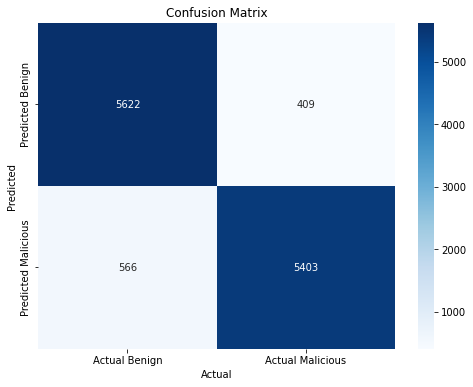

In [107]:
# Predict on the test data
y_pred = rf_best_model.predict(preprocessed_test_data)
cm = confusion_matrix(test_labels, y_pred)

confusion_matrix_plot(cm, preprocessed_test_labels, y_pred)

In our context of the project:
- Malicious is labeled as Positive (1)
- Benign is labeled as Negative (0)

Therefore:

<u>TP (True Positive):</u> This represents the number of correctly predicted instances that belong to the positive class. <br>
In our project, it indicates the correct identification of malicious files.<br>

<u>TN (True Negative):</u> This represents the number of correctly predicted instances that belong to the negative class. <br>
In our project, it indicates the correct identification of benign files.<br>

<u>FP (False Positive):</u> This represents the number of instances that were predicted as positive (malicious) but actually belong to the negative class. <br>
In our project, it represents benign files mistakenly classified as malicious.<br>

<u>FN (False Negative):</u> This represents the number of instances that were predicted as negative (benign) but actually belong to the positive class. <br>
In our project, it indicates malicious files that were missed or not detected.<br>


We can see that the TP (5403) and TN (5632) are relatively high to the FP (399) and FN (566), meaning that the model shows reasonably good performance in classifying malicious and benign files. However, it is still not perfect, and further improvement can be done in the future.

After looking at the basic values of the confusion matrix, let's expand our understating of the model to more advanced metrics:

In [109]:
def confusion_matrix_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    # Print the metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall (Sensitivity): {recall:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"F1 Score: {f1_score:.2f}")

In [111]:
# Calculate the metrics
confusion_matrix_metrics(cm)

Accuracy: 0.92
Precision: 0.93
Recall (Sensitivity): 0.91
Specificity: 0.93
F1 Score: 0.92



<u>Accuracy:</u> Accuracy measures the overall correctness of the model's predictions and is calculated as (TP + TN) / (TP + TN + FP + FN). <br>In our project, an accuracy of 0.92 indicates that the model correctly classified 92% of all samples, both malicious and benign.

<u>Precision:</u> Precision measures the proportion of correctly predicted positive instances among all instances predicted as positive. It is calculated as TP / (TP + FP).<br>In our project, a precision of 0.93 means that 93% of the samples classified as malicious by the model were actually malicious.

<u>Recall (Sensitivity):</u> Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive instances that were correctly predicted as positive. It is calculated as TP / (TP + FN). In our project, a recall of 0.91 indicates that the model identified 91% of the actual malicious files.

<u>Specificity:</u> Specificity measures the proportion of actual negative instances that were correctly predicted as negative. It is calculated as TN / (TN + FP). <br>In our project, a specificity of 0.93 means that the model correctly identified 93% of the actual benign files.

<u>F1 Score:</u> The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both metrics. It is calculated as 2 * (Precision * Recall) / (Precision + Recall). <br>In our project, an F1 score of 0.92 represents a good balance between precision and recall, indicating the model's ability to handle both classes effectively.

`False Positive, Precision and Recall:`<br>
In the context of predicting malicious files <b>False positive</b> calculation is the most important. This represents the number of instances that were predicted as malicious (positive) but are actually benign (negative). In the cybersecurity field, false positives are the more serious errors. This means that the model has mistakenly flagged a benign file as malicious, potentially causing unnecessary concern or disrupting regular operations for legitimate users.

Hence, the metric of utmost importance is typically <b>Precision</b>. A high precision (93%) value indicates that when the model predicts a file as malicious, it is highly likely to be correct.

As for weaknesses in the model, we can look at the <b>Recall (Sensitivity)</b> metric. A recall of 0.91 means that the model identified 91% of the actual malicious files. While this is generally good, it also indicates that around 9% of the malicious files were not detected by the model, leading to false negatives (FN).

To summarize, in the context of predicting malicious files, the model's precision is crucial for reducing false positives and avoiding unnecessary alerts or disruptions. However, it is also essential to pay attention to the recall metric, as detecting as many actual malicious files as possible is equally important for comprehensive cybersecurity protection. The model's weaknesses lie in the number of false negatives, indicating that it may miss a small portion of actual threats, and this area could be improved to enhance overall performance.

### K-FOLD

In order to get a more precise AUC score, we will now use K-FOLD Cross Validation in which we can cancel the maybe biased data that is created by only splitting the data once.

Before the evaluation we've had a train-test split of our dataset and pre processed them both to train each model and predict.
Now, in order to run K-Fold Cross Validation, we would need to re-read the whole dataset - TRAIN.csv and apply K-Fold algorithm on that and then pre process each of the train-validation splits.

Hence, lets create a K-Fold function that gets a model and outputs a ROC-AUC on each fold of the data set:

In [104]:
def train_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_val)[:, 1]
    return y_scores

In [105]:
def plot_roc_curve_multiple_aucs(aucs, model_name):
    k = len(aucs)
    mean_true_positive_rate = np.zeros(100)
    mean_false_positive_rate = np.zeros(100)
    sum_auc = 0.0

    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')

    for auc in aucs:
        y_true, y_scores = auc[0], auc[1]
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        auc_score = roc_auc_score(y_true, y_scores)

        # Plot the individual ROC curves in gray
        plt.plot(fpr, tpr, color='gray', linestyle='--', alpha=0.5)

        mean_true_positive_rate += np.interp(np.linspace(0, 1, 100), fpr, tpr)
        mean_false_positive_rate += np.linspace(0, 1, 100)

        sum_auc += auc_score

    mean_true_positive_rate /= k
    mean_false_positive_rate /= k
    mean_true_positive_rate[-1] = 1.0
    mean_auc = sum_auc / k

    # Plot the mean ROC curve in red
    plt.plot(mean_false_positive_rate, mean_true_positive_rate, color='red', linestyle='-',
             label=f'Mean ROC - area = {mean_auc:.4f}')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curves for {model_name}')
    plt.legend()
    plt.show()

    return mean_false_positive_rate, mean_true_positive_rate, mean_auc

In [106]:
def kfold_cross_validation(model, data, labels, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    aucs = []
    
    model_name = str(model).split("(")[0]
    print("Model:", model_name)

    for i, (train_index, val_index) in enumerate(kf.split(data)):
        
        # Split data into train and validation sets
        X_train, X_val = data.iloc[train_index], data.iloc[val_index]
        y_train, y_val = labels.iloc[train_index], labels.iloc[val_index]
        
        # Preprocess train and validation data
        X_train, y_train, X_val = preprocess_data_ALL(X_train, y_train, X_val)
        
        # Train the model and calculate AUC score
        y_scores = train_model(model, X_train, y_train, X_val, y_val)

        model.fit(X_train, y_train)
        
        y_scores_train = model.predict_proba(X_train)[:, 1]
        y_scores = model.predict_proba(X_val)[:, 1]

        aucs.append((y_val, y_scores))
        print(f"Split {i+1} - Train AUC score: {roc_auc_score(y_train, y_scores_train):.4f}, Test AUC score: {roc_auc_score(y_val, y_scores):.4f}")
        
    # Plot the ROC curve
    return plot_roc_curve_multiple_aucs(aucs, model_name)

In [107]:
def plot_mean_roc_models(mean_roc_curve_models, model_names):
    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')

    colors = ['red', 'blue', 'green', 'orange', 'purple']  # List of colors for different ROC curves

    for i, roc_curve_model in enumerate(mean_roc_curve_models):
        fpr, tpr, mean_auc = roc_curve_model
        color = colors[i % len(colors)]  # Select a color from the list
        model_name = model_names[i]  # Get the model name

        plt.plot(fpr, tpr, color=color, linestyle='-', label=f'{model_name} Mean ROC - {mean_auc:.4f}')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Mean ROC Curves for Models')
    plt.legend()
    plt.show()

Model: KNeighborsClassifier
Split 1 - Train AUC score: 1.0000, Test AUC score: 0.9515
Split 2 - Train AUC score: 1.0000, Test AUC score: 0.9505
Split 3 - Train AUC score: 1.0000, Test AUC score: 0.9527
Split 4 - Train AUC score: 1.0000, Test AUC score: 0.9495
Split 5 - Train AUC score: 1.0000, Test AUC score: 0.9523


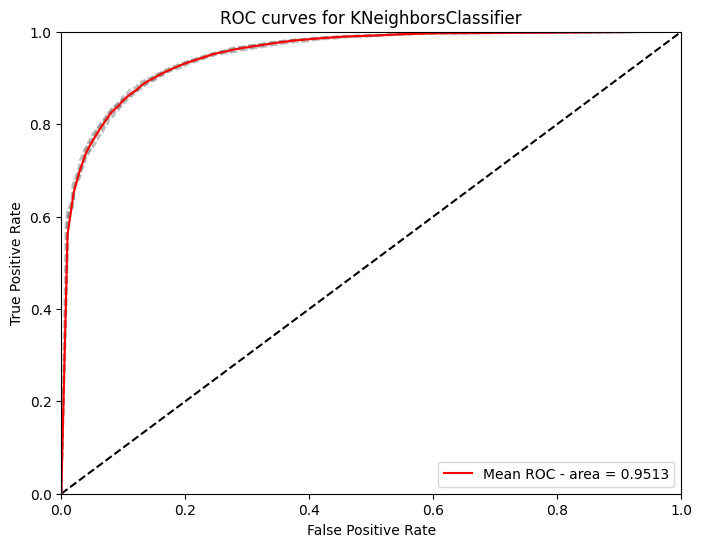

Elapsed time for KNeighborsClassifier(n_neighbors=15, p=1, weights='distance'): 01:58

Model: LogisticRegression
Split 1 - Train AUC score: 0.8672, Test AUC score: 0.8653
Split 2 - Train AUC score: 0.8676, Test AUC score: 0.8645
Split 3 - Train AUC score: 0.8660, Test AUC score: 0.8690
Split 4 - Train AUC score: 0.8674, Test AUC score: 0.8631
Split 5 - Train AUC score: 0.8657, Test AUC score: 0.8696


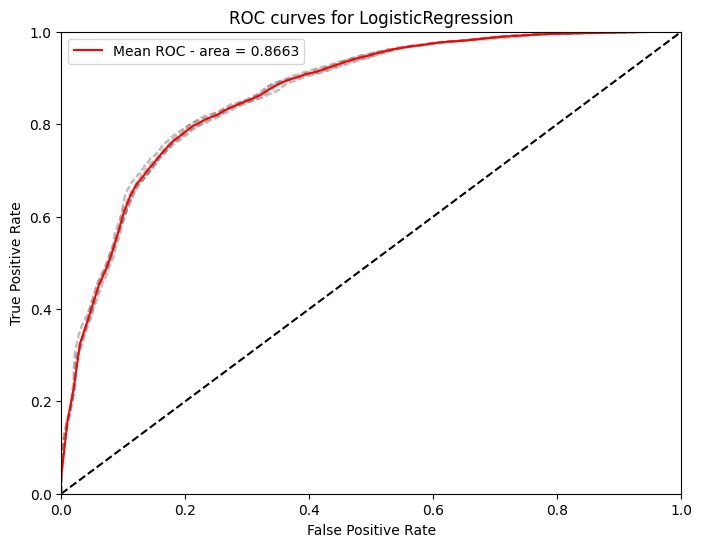

Elapsed time for LogisticRegression(C=10.0, n_jobs=-1, random_state=42, solver='liblinear'): 00:13

Model: MLPClassifier
Split 1 - Train AUC score: 0.9697, Test AUC score: 0.9537
Split 2 - Train AUC score: 0.9698, Test AUC score: 0.9505
Split 3 - Train AUC score: 0.9698, Test AUC score: 0.9553
Split 4 - Train AUC score: 0.9706, Test AUC score: 0.9552
Split 5 - Train AUC score: 0.9697, Test AUC score: 0.9561


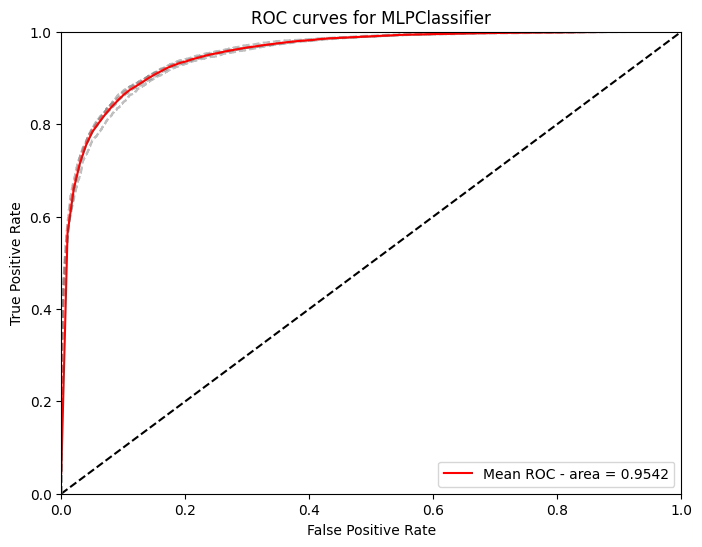

Elapsed time for MLPClassifier(hidden_layer_sizes=(64,), random_state=42): 04:52

Model: RandomForestClassifier
Split 1 - Train AUC score: 0.9949, Test AUC score: 0.9757
Split 2 - Train AUC score: 0.9950, Test AUC score: 0.9745
Split 3 - Train AUC score: 0.9950, Test AUC score: 0.9759
Split 4 - Train AUC score: 0.9950, Test AUC score: 0.9743
Split 5 - Train AUC score: 0.9949, Test AUC score: 0.9764


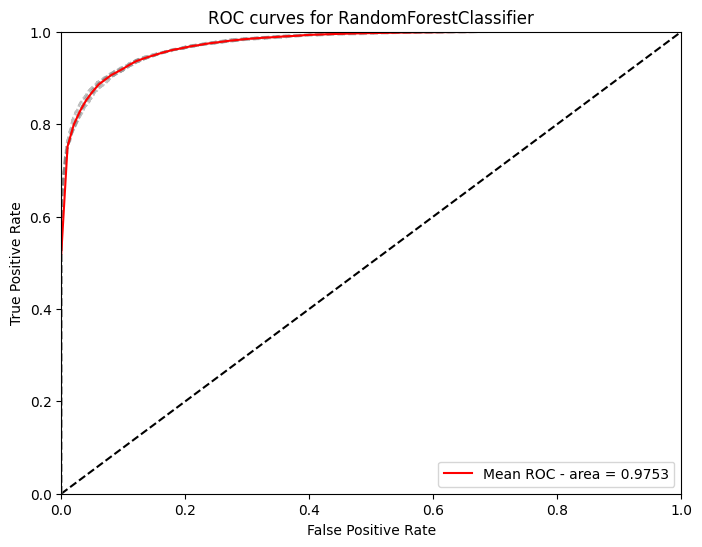

Elapsed time for RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, n_jobs=-1): 00:44



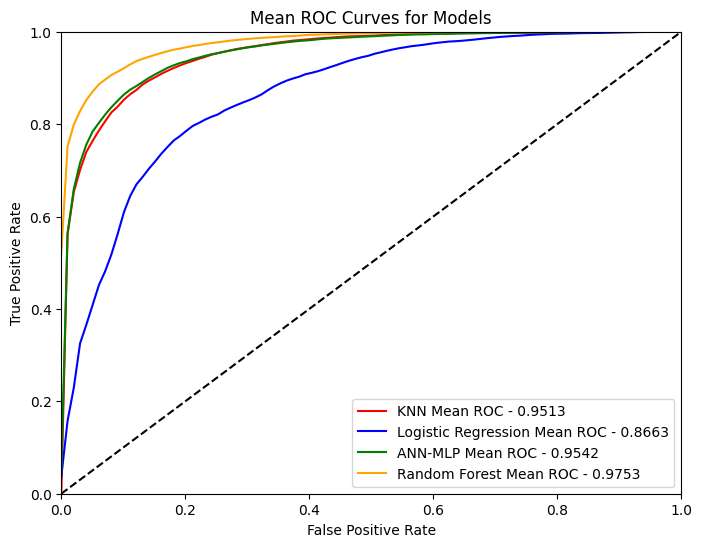

In [108]:
models = [knn_best_model, logreg_best_model, mlp_best_model, rf_best_model]

data = full_data.drop('label', axis=1)
labels = full_data_copy['label']

mean_roc_curve_models = []
mean_scores = []

for model in models:

    start_time = time.time()

    model_roc_curve = kfold_cross_validation(model, data, labels, 5)
    mean_roc_curve_models.append(model_roc_curve)

    # Calculate the elapsed time
    elapsed_time = time.time() - start_time

    # Convert elapsed_time to mm:ss format
    minutes, seconds = divmod(int(elapsed_time), 60)
    elapsed_time_str = f"{minutes:02d}:{seconds:02d}"

    print(f"Elapsed time for {model}: {elapsed_time_str}\n")

model_names = ['KNN', 'Logistic Regression', 'ANN-MLP', 'Random Forest']
plot_mean_roc_models(mean_roc_curve_models, model_names)

`Observing Overfitting`<br>
There are several ways to observe overfitting in the model:
- Compare the AUC score of the validation to its train, if there is a big gap between the scores it might suggest overfitting.
- Looking at the differences of the AUC scores in the K-FOLD splits, if there is a big difference it might suggest overfitting.

As we can see in our outputs:
- The gap between the train AUC to the test AUC are no significant, resulting in a not overfitting model AKA a good generalizing model.
- The differences between the AUC score plotted above are insignificant as well.

Hence, we can conclude that our that our model is not overfitted!

`Increasing Generalization`<br>
To increase the model's ability to generalize, we can consider the following steps:

- Regularization techniques: Apply regularization techniques such as L1 or L2 regularization to the model. 

- Feature engineering and selection: Analyze and transform our features to improve their predictive power. 

- Cross-validation and hyperparameter tuning

- Ensemble methods: Combine multiple models through ensemble methods such as bagging, boosting, or stacking. Ensemble methods leverage the collective knowledge of multiple models to improve generalization by reducing variance and capturing diverse patterns in the data. 

- Early stopping: Monitor the model's performance on a validation set during training and stop training when the performance on the validation set starts to degrade. 

We implemented in our model the following steps:

- We indeed dropped some of the features and combined some to improve the model.

- K-Fold and hyperparameter tuning obviously were done.

## Part 5 - Prediction

### Pipeline

Pipelining all the decisions made in the project and training the chosen model:<br>
(The train data is - TRAIN.csv <br>
The test data is - TEST.csv)

And make predictions on the test data and save it in a csv file (results_51.csv) :

In [109]:
def run_pipeline(train_csv, test_csv, predict_csv):

    train = pd.read_csv(train_csv)
    test_data = pd.read_csv(test_csv)

    train_labels = train['label']
    train_data = train.drop('label', axis=1)

    sha256 = test_data['sha256']

    train_data, train_labels, test_data = preprocess_data_ALL(train_data, train_labels, test_data)

    rf_best_model = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=10, min_samples_leaf=4, n_jobs=-1)
    rf_best_model.fit(train_data, train_labels)

    # Predict on the test set using the best model
    probabilities = rf_best_model.predict_proba(test_data)[:, 1]

    test_data = pd.concat([sha256, test_data], axis=1)

    # Create a DataFrame with the predictions
    results_df = pd.DataFrame({'sha256': test_data['sha256'], 'predict_proba': probabilities})

    # Save the results to a CSV file
    results_df.to_csv(predict_csv, index=False)

In [110]:
run_pipeline('TRAIN.csv', 'TEST.csv', 'results_51.csv')